# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [2]:
import pandas as pd
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt

### Load Data

In [3]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [4]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

WaferName  DieX  DieY  IsGoodDie  IsScratchDie
0    8PFrAN     0    27       True         False
1    8PFrAN     0    28       True         False
2    8PFrAN     0    29       True         False
3    8PFrAN     0    30       True         False
4    8PFrAN     0    31       True         False

In [5]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

WaferName  DieX  DieY  IsGoodDie
0    mZa9ls     0    23       True
1    mZa9ls     0    24       True
2    mZa9ls     0    25       True
3    mZa9ls     0    26       True
4    mZa9ls     0    27       True

You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [6]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

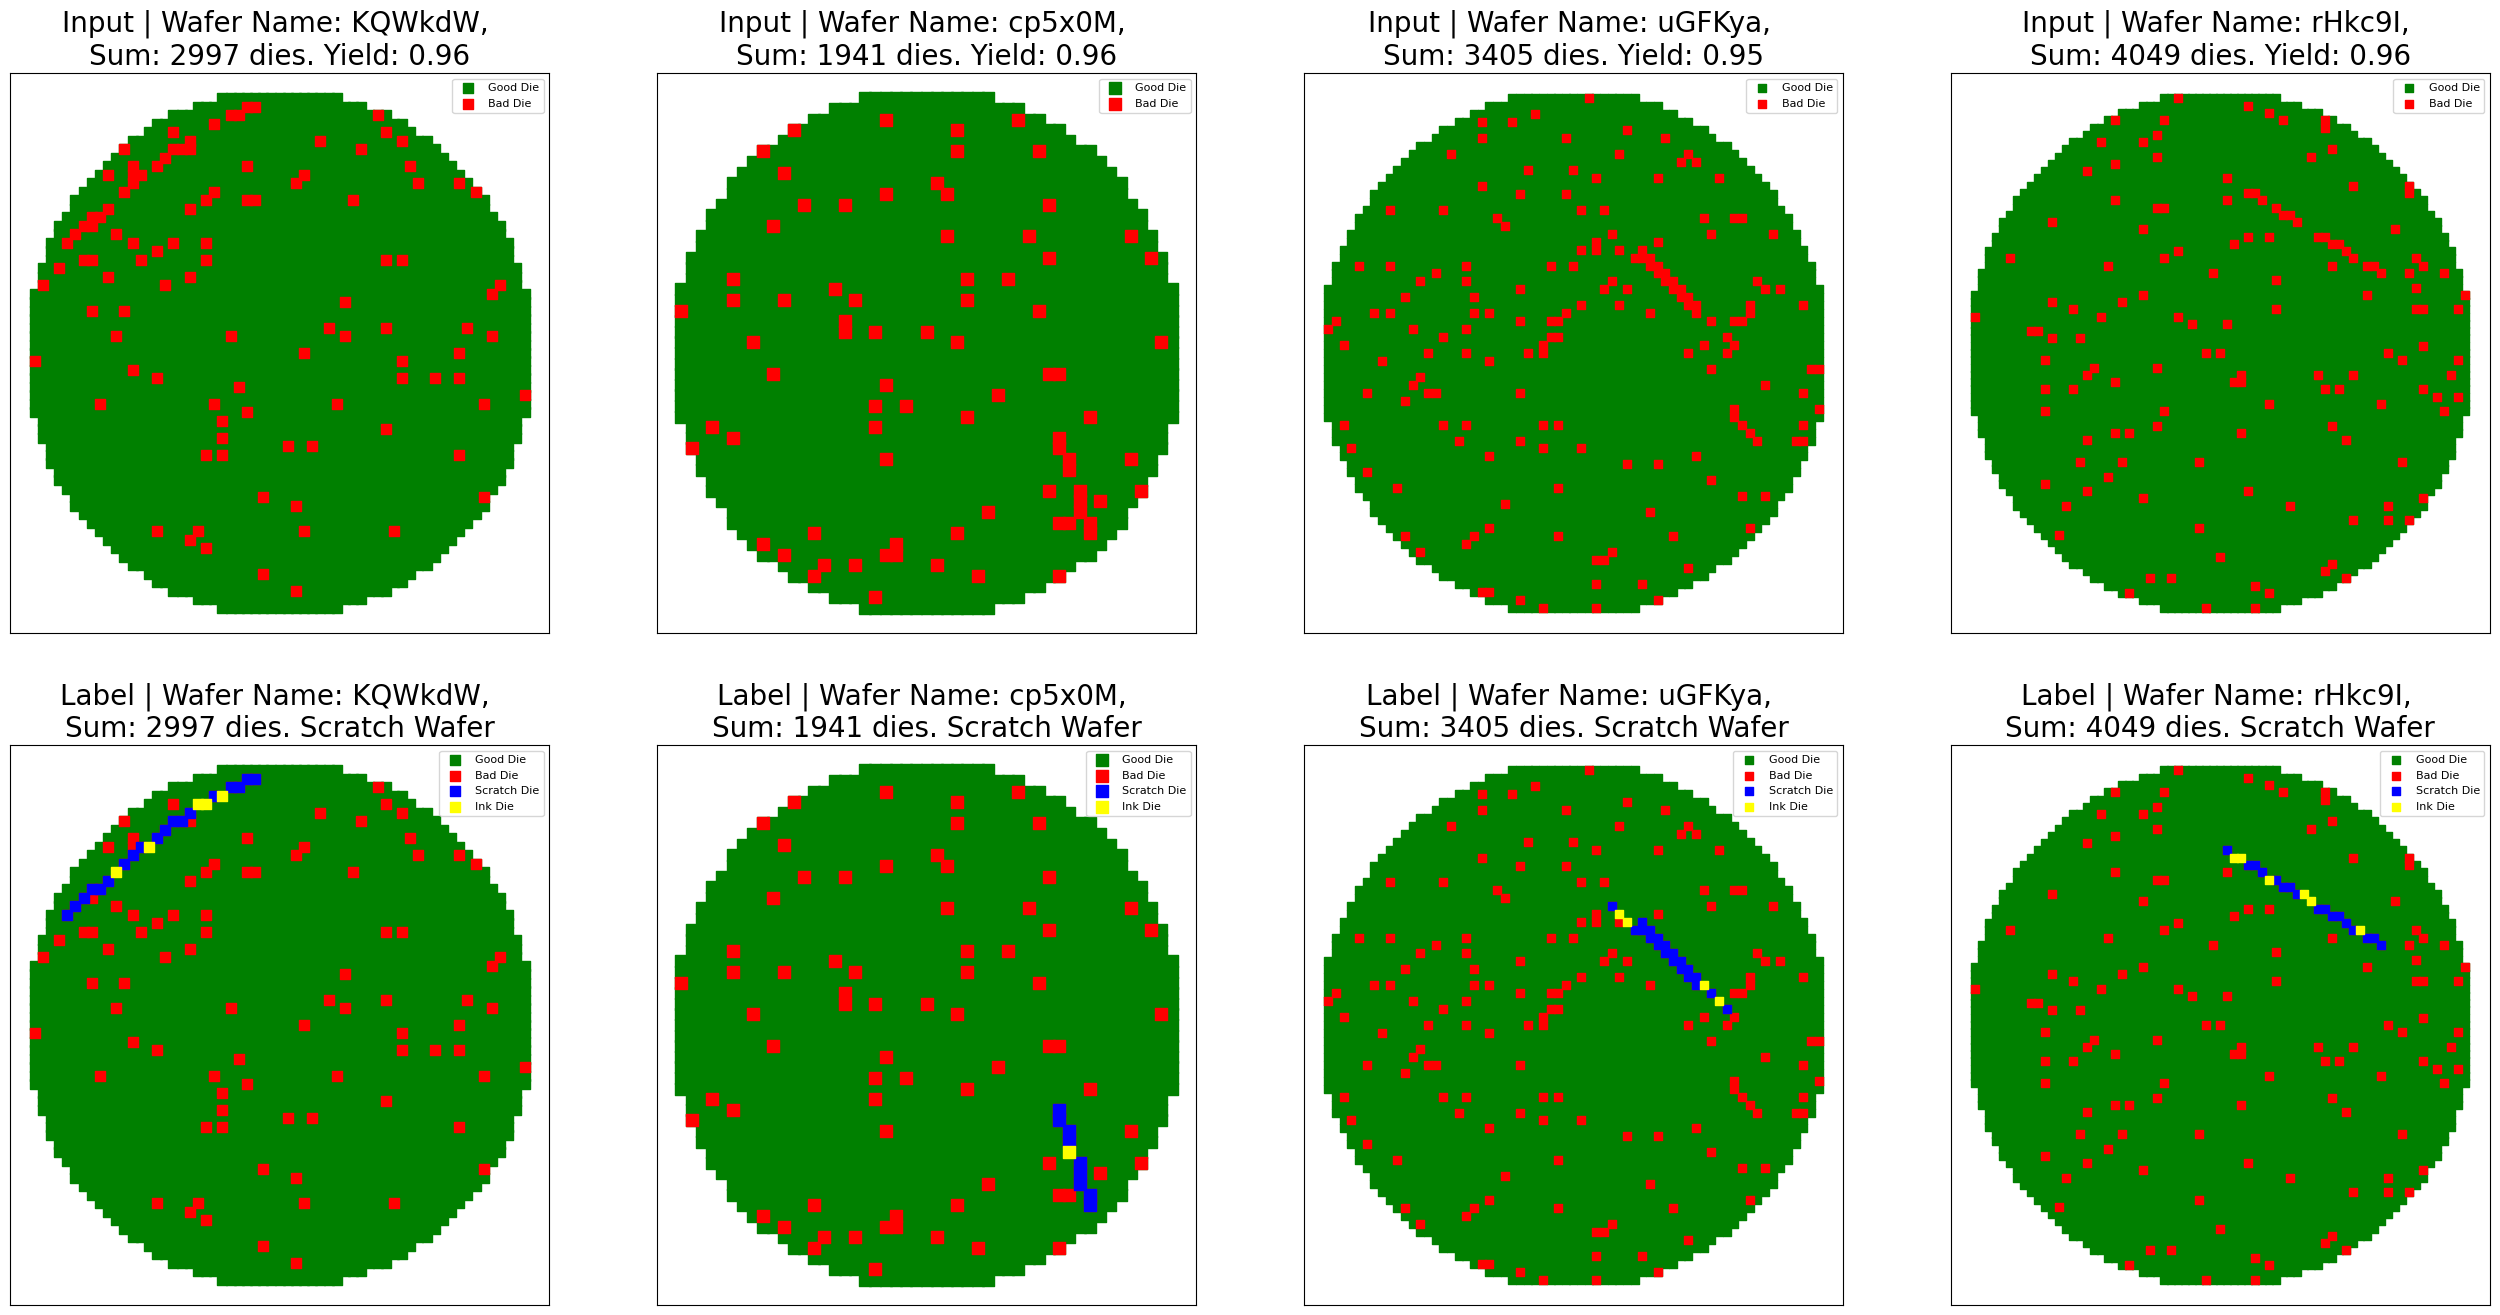

In [7]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

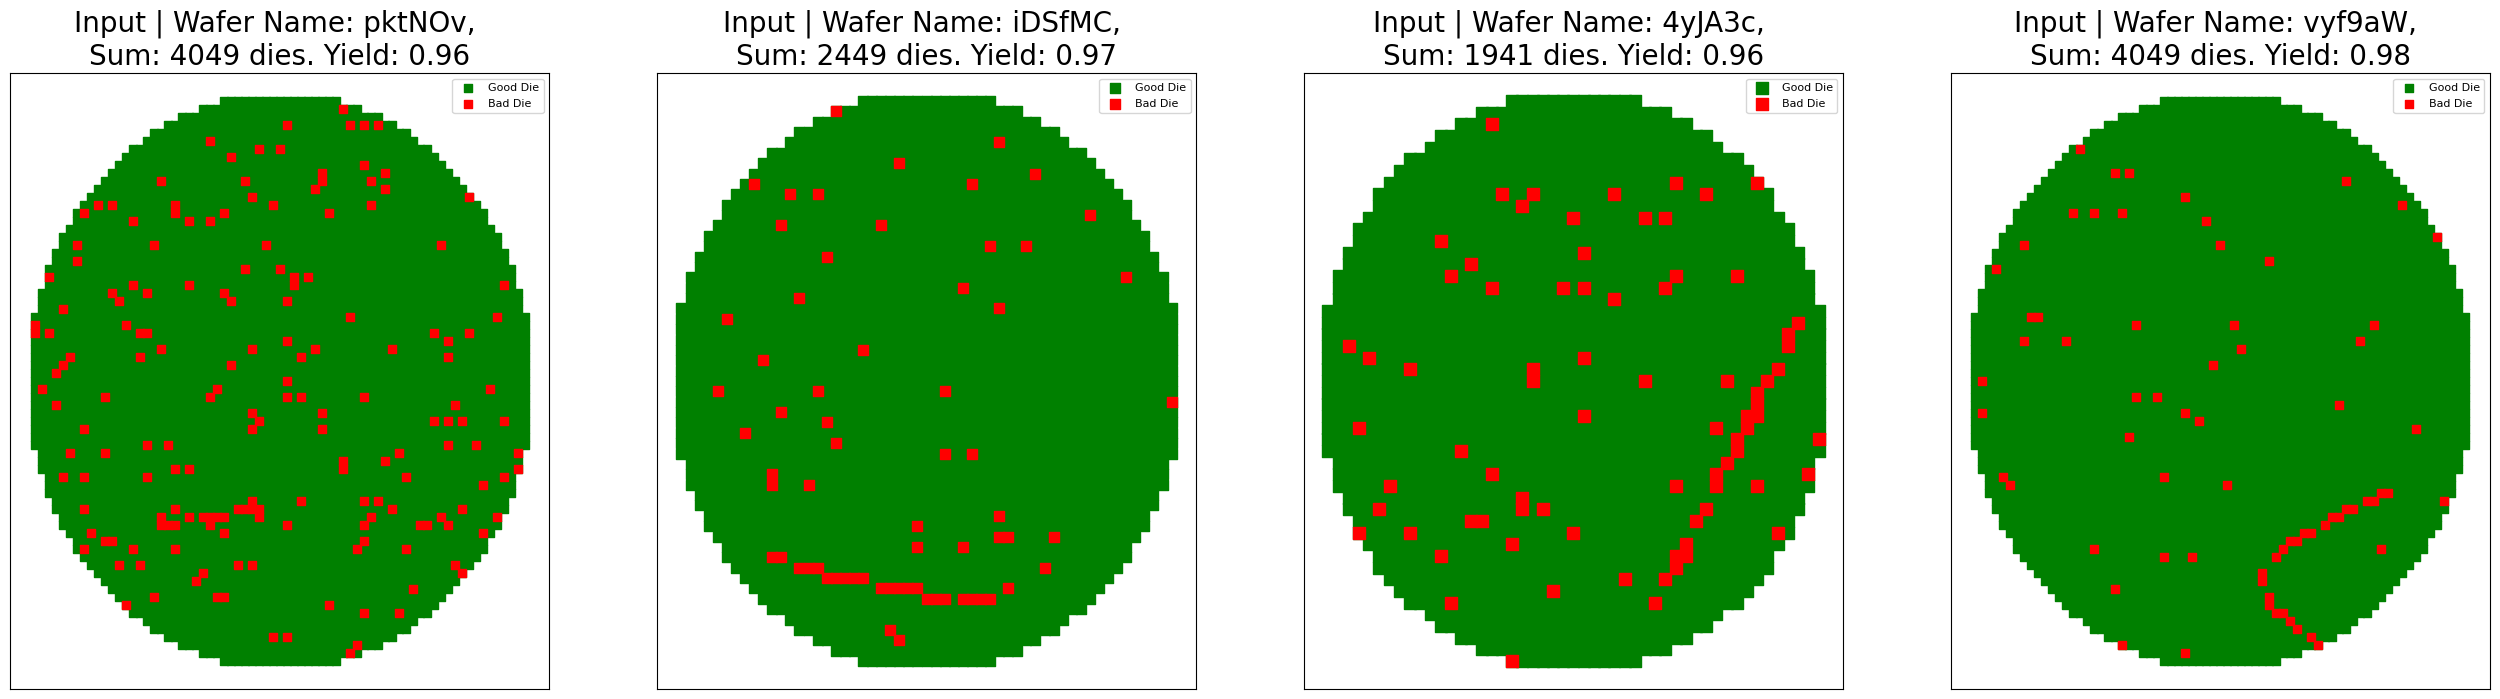

In [8]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

## EDA

The dataset consists of 4,655 wafers in total, with 4,200 wafers in the training set and 455 wafers in the test set.

There are 6 sizes of wafers from the smallest 1005 to the largest 4049, some types of wafer are more prone to scrathes (type A with 0.49% of scrached dies vs type f with 1.14% of scrached dies)

Both sets have no missing values or duplicates. In the training set, there are 10,036,478 good dies (96.28%) and 378,922 bad dies (3.72%), while the test set contains 1,038,877 good dies (92.07%) and 89,458 bad dies (7.93%).

The training set also includes 4,073 wafers with scratch dies, with 80,319 dies (0.77%) classified as scratch dies. 

The yield rate (percentage of good dies) in the training set averages 96.28%, with values ranging from 90.02% to 98.91%. 

The median yield is 96.30%. The test set shows a slightly lower average yield of 91.97%, with a wider range from 28.71% to 99.07%, suggesting more variability in the test set. 

The distribution graphs confirm these observations, showing that in the first dataset, 96.24% are good dies (non-ink), 2.99% are regular bad dies,
0.65% are scratch dies, and 0.12% are ink dies, while the second dataset has 92.07% good dies and 7.93% bad dies.

1229 wafers have less than 3 scratch dies - wich might indicate that there is an error with the lables ot the definition of a scratch.

There is a tendency of scracthed dies to be in a paricular are of the the die - from the heat map, this might be a sign of a machine out of tune. 

# Actions

* Added a WaferType feature to represent the differnt groups.

* Set therhold for low yield at 0.8 ~92.3% of the test wafer is above this critiria, and also from some reading it looks like 80 - 90 is the indusrty standrd - defends on the type of wafer.  (wafer with less then 0.8 yield will be predicted as false by the model, but will be used in the train data)

* Adressing the imblance of the problem - by trying to upsample the minority class. 

* Chousing metrics - from the business goals - we would like to keep a blance between the true positives and false positives recall, percision and f1 will be used, but also we will pay attention to to the disturt in them beacsue of the imbalnced data. 



In [9]:
# How many wafers are there in the train and test set?
print(f'Train set: {len(df_wafers["WaferName"].unique())} wafers')
print(f'Test set: {len(df_wafers_test["WaferName"].unique())} wafers')
# How many dies are there in the train and test set?
print(f'Total: {len(df_wafers["WaferName"].unique()) + len(df_wafers_test["WaferName"].unique())} wafers')

Train set: 4200 wafers
Test set: 455 wafers
Total: 4655 wafers


In [11]:
# Are there any missing values in the train and test set?
print(f'Train set: {df_wafers.isnull().sum().sum()} missing values')   
print(f'Test set: {df_wafers_test.isnull().sum().sum()} missing values')

Train set: 0 missing values
Test set: 0 missing values


In [12]:
# In how many unique wafers are the scratch dies located?
print(f'Train set: {df_wafers[df_wafers["IsScratchDie"] == True]["WaferName"].nunique()} wafers with scratch dies')


Train set: 4073 wafers with scratch dies


In [22]:
# Are there any duplicates in the train and test set?
print(f'Train set: {df_wafers.duplicated().sum()} duplicates')  
print(f'Test set: {df_wafers_test.duplicated().sum()} duplicates')
print("*"*35)
# How many good and bad dies are there in the train and test set?
print(f'Train set: {df_wafers["IsGoodDie"].value_counts()}')
print(f'Test set: {df_wafers_test["IsGoodDie"].value_counts()}')
print("*"*35)
# How many scratch and non-scratch dies are there in the train and test set?
print(f'Train set: {df_wafers["IsScratchDie"].value_counts()}')


Train set: 0 duplicates
Test set: 0 duplicates
***********************************
Train set: IsGoodDie
True     10036478
False      378922
Name: count, dtype: int64
Test set: IsGoodDie
True     1038877
False      89458
Name: count, dtype: int64
***********************************
Train set: IsScratchDie
False    10335081
True        80319
Name: count, dtype: int64


In [13]:
# what is the distribution of the amount of total dies in each wafer 
df_wafers.groupby('WaferName').size().value_counts()


1941    600
1005    600
2449    600
2997    600
4049    600
1513    600
3405    600
Name: count, dtype: int64

In [14]:
df_wafers_test.groupby('WaferName').size().value_counts()

3405    65
2997    65
4049    65
1005    65
2449    65
1513    65
1941    65
Name: count, dtype: int64

In [22]:
# lets create a new column with and give each size of wafer group a label by the amount of dies from a - f - with a bieng the largest wafer
def label_wafer_size(wafer_size):
    """
    Labels wafers based on their size into categories a-f
    a: largest wafers (>4000 dies)
    b: 3000-4000 dies
    c: 2400-3000 dies
    d: 1900-2400 dies
    e: 1500-1900 dies
    f: <1500 dies
    """
    if wafer_size > 4000:
        return 'A'
    elif wafer_size > 3000:
        return 'B'
    elif wafer_size > 2400:
        return 'C'
    elif wafer_size > 1900:
        return 'D'
    elif wafer_size > 1500:
        return 'E'
    else:
        return 'F'


In [103]:
# now we can apply this function to the train and test set
train_sizes = df_wafers.groupby('WaferName').size().apply(label_wafer_size)
test_sizes = df_wafers_test.groupby('WaferName').size().apply(label_wafer_size)\

# and add the labels to the original dataframes
df_wafers['WaferType'] = df_wafers['WaferName'].map(train_sizes)
df_wafers_test['WaferType'] = df_wafers_test['WaferName'].map(test_sizes)

df_wafers
df_wafers_test

WaferName  DieX  DieY  IsGoodDie WaferType
0          mZa9ls     0    23       True         C
1          mZa9ls     0    24       True         C
2          mZa9ls     0    25       True         C
3          mZa9ls     0    26       True         C
4          mZa9ls     0    27       True         C
...           ...   ...   ...        ...       ...
1128330    ghtNu6    42    23       True         E
1128331    ghtNu6    42    24       True         E
1128332    ghtNu6    42    25       True         E
1128333    ghtNu6    42    26       True         E
1128334    ghtNu6    42    27       True         E

[1128335 rows x 5 columns]

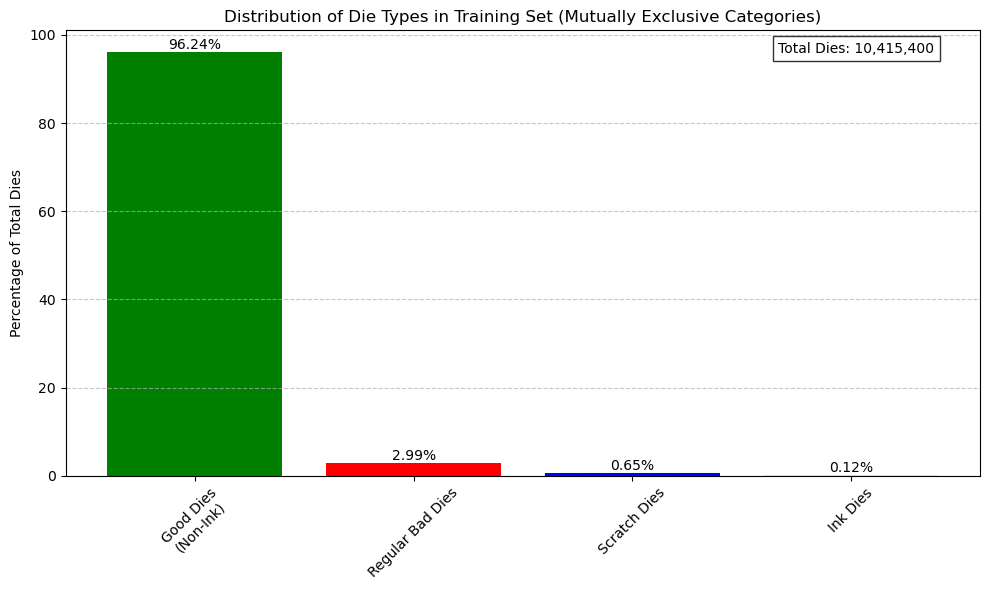

In [23]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers)
good_dies_without_ink = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == False)).sum()
regular_bad_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == False)).sum()
scratch_dies = ((df_wafers['IsGoodDie'] == False) & (df_wafers['IsScratchDie'] == True)).sum()
ink_dies = ((df_wafers['IsGoodDie'] == True) & (df_wafers['IsScratchDie'] == True)).sum()

# Create data for plotting
categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

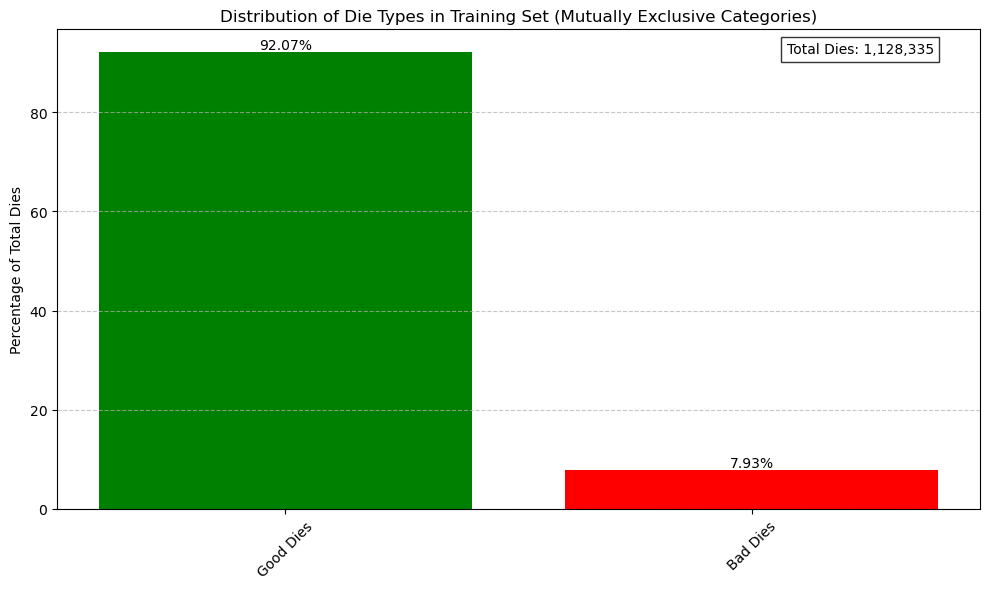

In [32]:
# Calculate all categories with corrected counting
total_dies = len(df_wafers_test)
good_dies_without_ink = ((df_wafers_test['IsGoodDie'] == True)).sum()
regular_bad_dies = ((df_wafers_test['IsGoodDie'] == False)).sum()


# Create data for plotting
categories = ['Good Dies', 'Bad Dies']
values = [good_dies_without_ink, regular_bad_dies]
percentages = [v/total_dies*100 for v in values]
colors = ['green', 'red', 'blue', 'yellow']

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Customize the plot
plt.title('Distribution of Die Types in Training Set (Mutually Exclusive Categories)')
plt.ylabel('Percentage of Total Dies')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total count as text
plt.text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
         transform=plt.gca().transAxes, 
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Training Set Distributions:


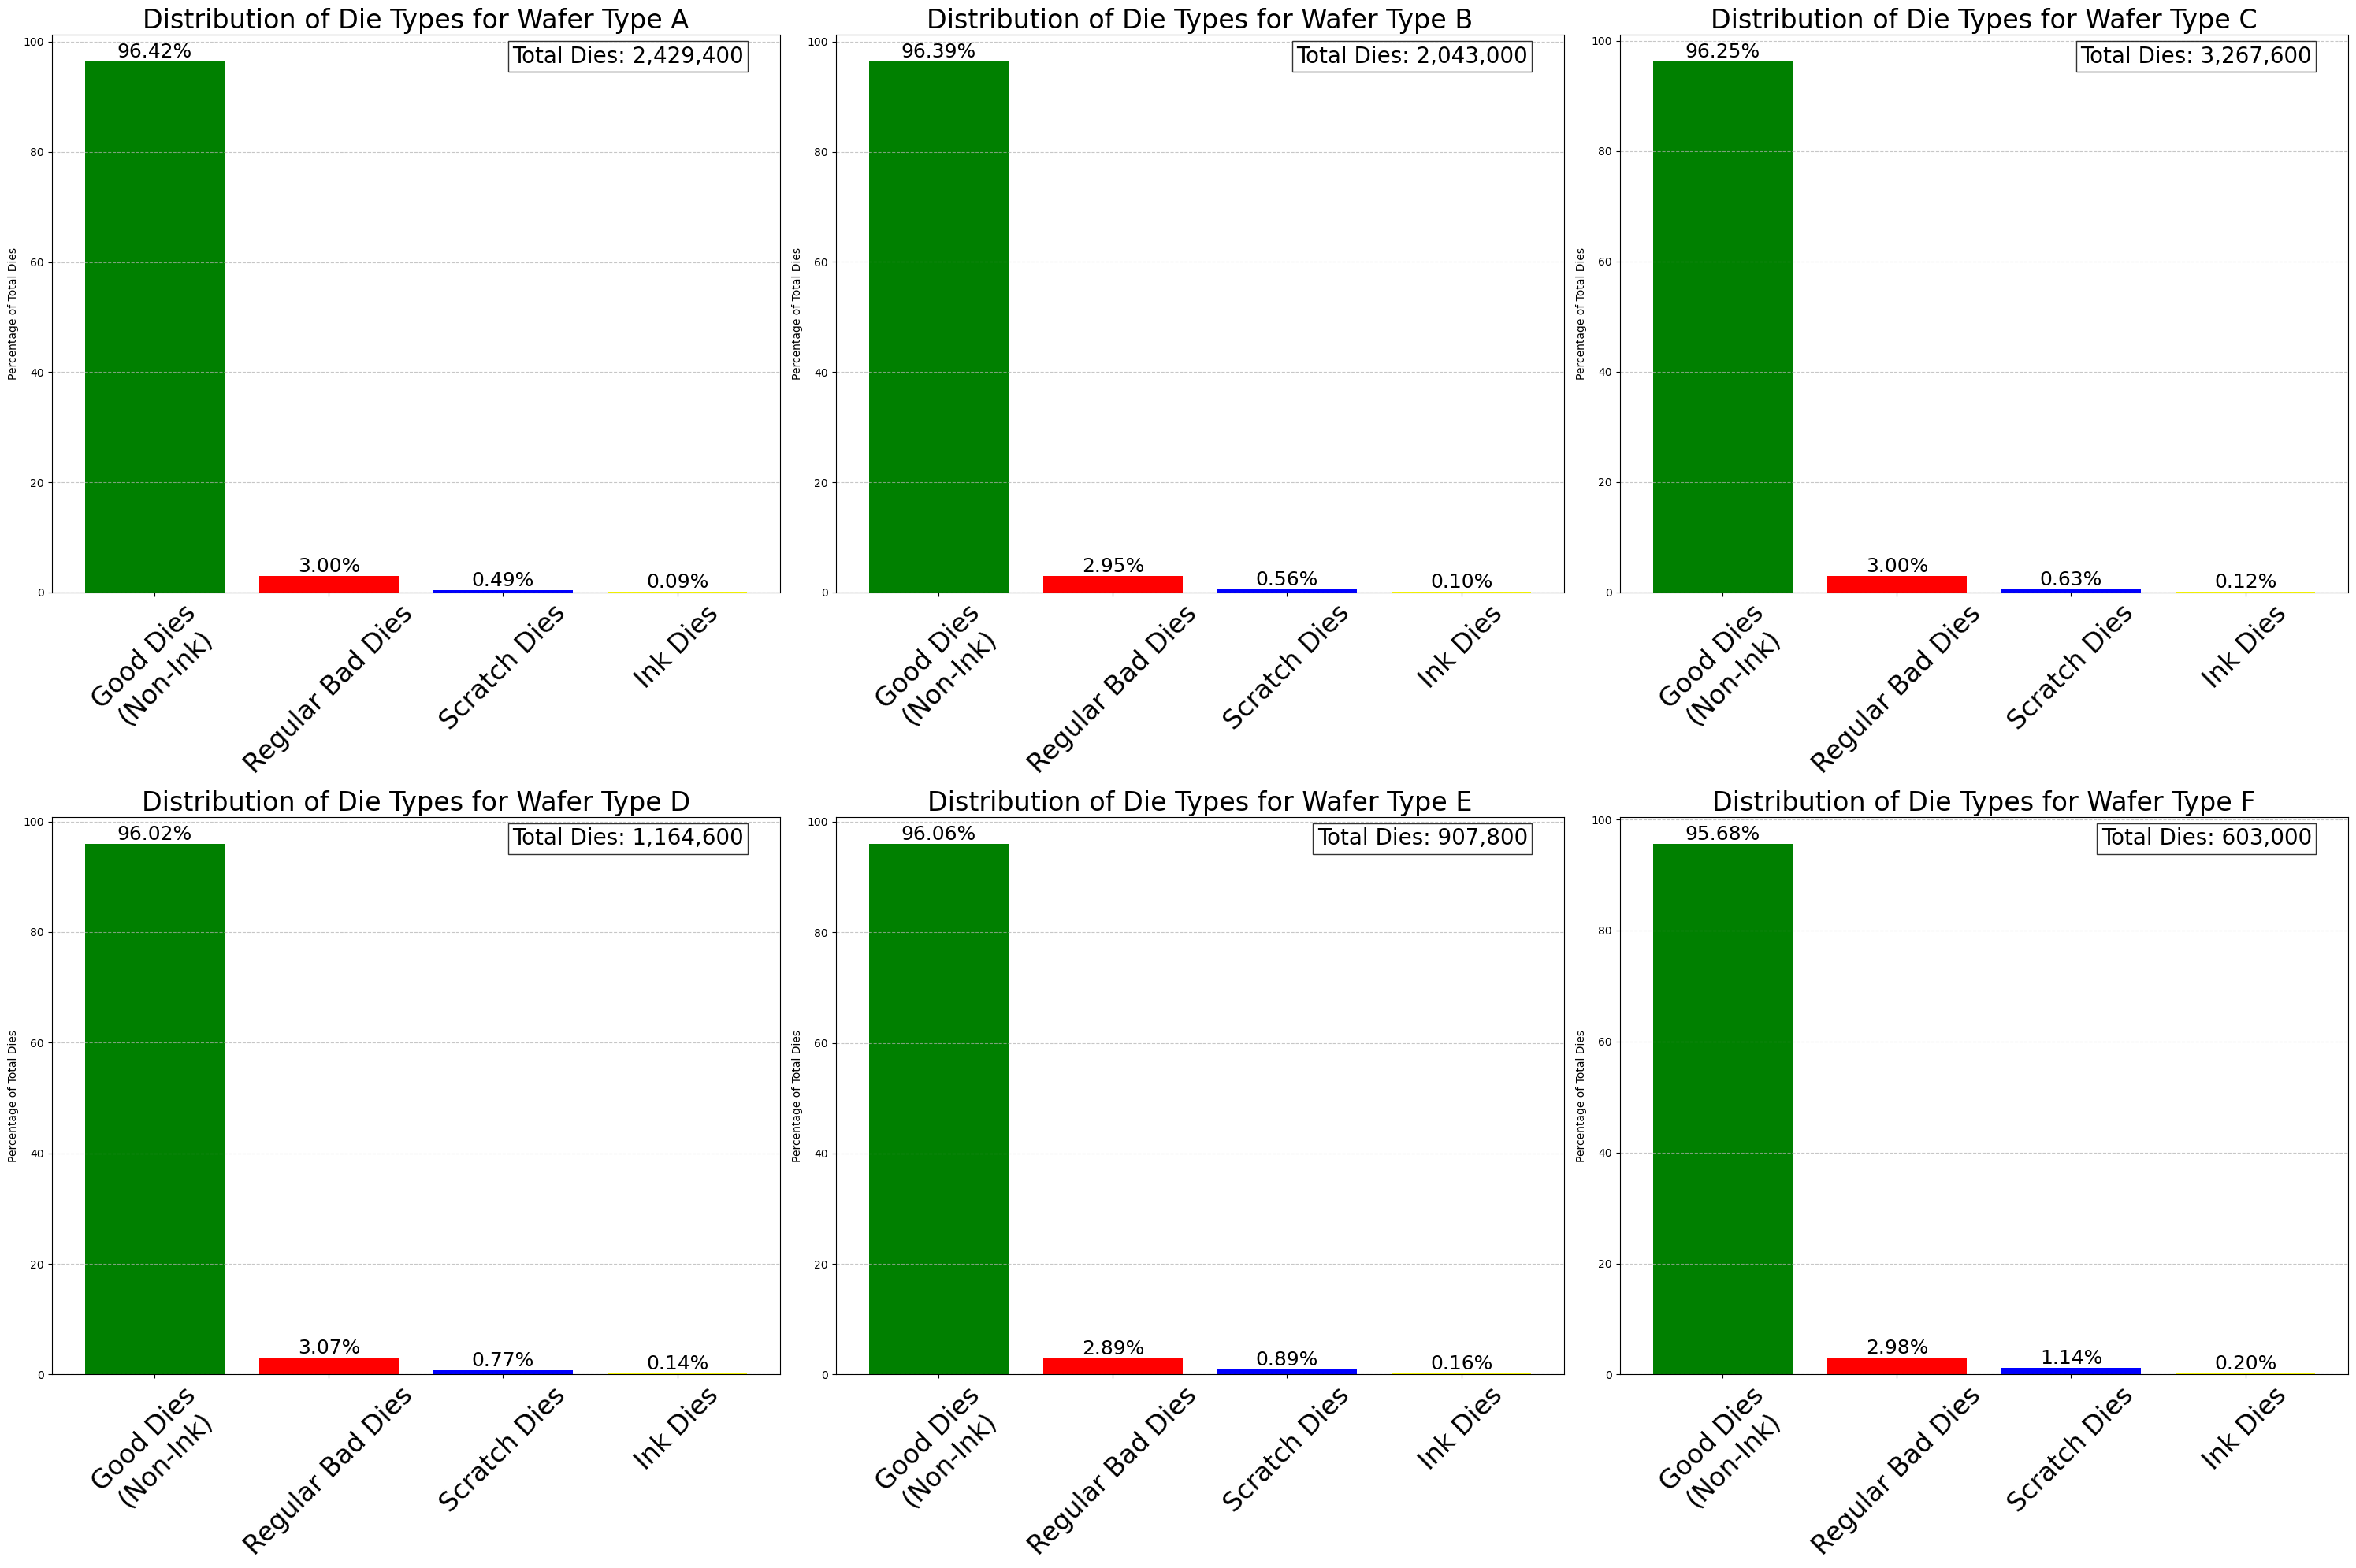

In [49]:
def plot_wafer_type_distributions_grid(df, wafer_types):
    """
    Plot the distribution of good, bad, scratch and ink dies for all wafer types in a 3x2 grid.
    
    :param df: DataFrame, The dataframe containing the wafer data
    :param wafer_types: list, List of wafer types to plot
    """
    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 3, figsize=(30, 20))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    for idx, wafer_type in enumerate(wafer_types):
        # Filter the DataFrame for the specified wafer type
        df_filtered = df[df['WaferType'] == wafer_type]
        
        # Calculate all categories with corrected counting
        total_dies = len(df_filtered)
        good_dies_without_ink = ((df_filtered['IsGoodDie'] == True) & 
                                (df_filtered['IsScratchDie'] == False)).sum()
        regular_bad_dies = ((df_filtered['IsGoodDie'] == False) & 
                           (df_filtered['IsScratchDie'] == False)).sum()
        scratch_dies = ((df_filtered['IsGoodDie'] == False) & 
                       (df_filtered['IsScratchDie'] == True)).sum()
        ink_dies = ((df_filtered['IsGoodDie'] == True) & 
                    (df_filtered['IsScratchDie'] == True)).sum()
        
        # Create data for plotting
        categories = ['Good Dies\n(Non-Ink)', 'Regular Bad Dies', 'Scratch Dies', 'Ink Dies']
        values = [good_dies_without_ink, regular_bad_dies, scratch_dies, ink_dies]
        percentages = [v/total_dies*100 for v in values]
        colors = ['green', 'red', 'blue', 'yellow']
        
        # Create bar plot in the corresponding subplot
        bars = axes[idx].bar(categories, percentages, color=colors)

        # Add percentage labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', ha='center', va='bottom',fontsize=18)
                     
        # Customize the subplot
        axes[idx].set_title(f'Distribution of Die Types for Wafer Type {wafer_type}',fontsize=24)
        axes[idx].set_ylabel('Percentage of Total Dies')
        axes[idx].set_xticks(range(len(categories)))
        axes[idx].set_xticklabels(categories, rotation=45,fontsize=24)
        axes[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Add total count as text
        axes[idx].text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
                 transform=axes[idx].transAxes, 
                 ha='right',
                 bbox=dict(facecolor='white', alpha=0.8),fontsize=20)
    
    # Remove any empty subplots
    for idx in range(len(wafer_types), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Plot distributions for training set
print("Training Set Distributions:")
wafer_types = sorted(df_wafers['WaferType'].unique())  # Sort wafer types alphabetically
plot_wafer_type_distributions_grid(df_wafers, wafer_types)



Test Set Distributions:


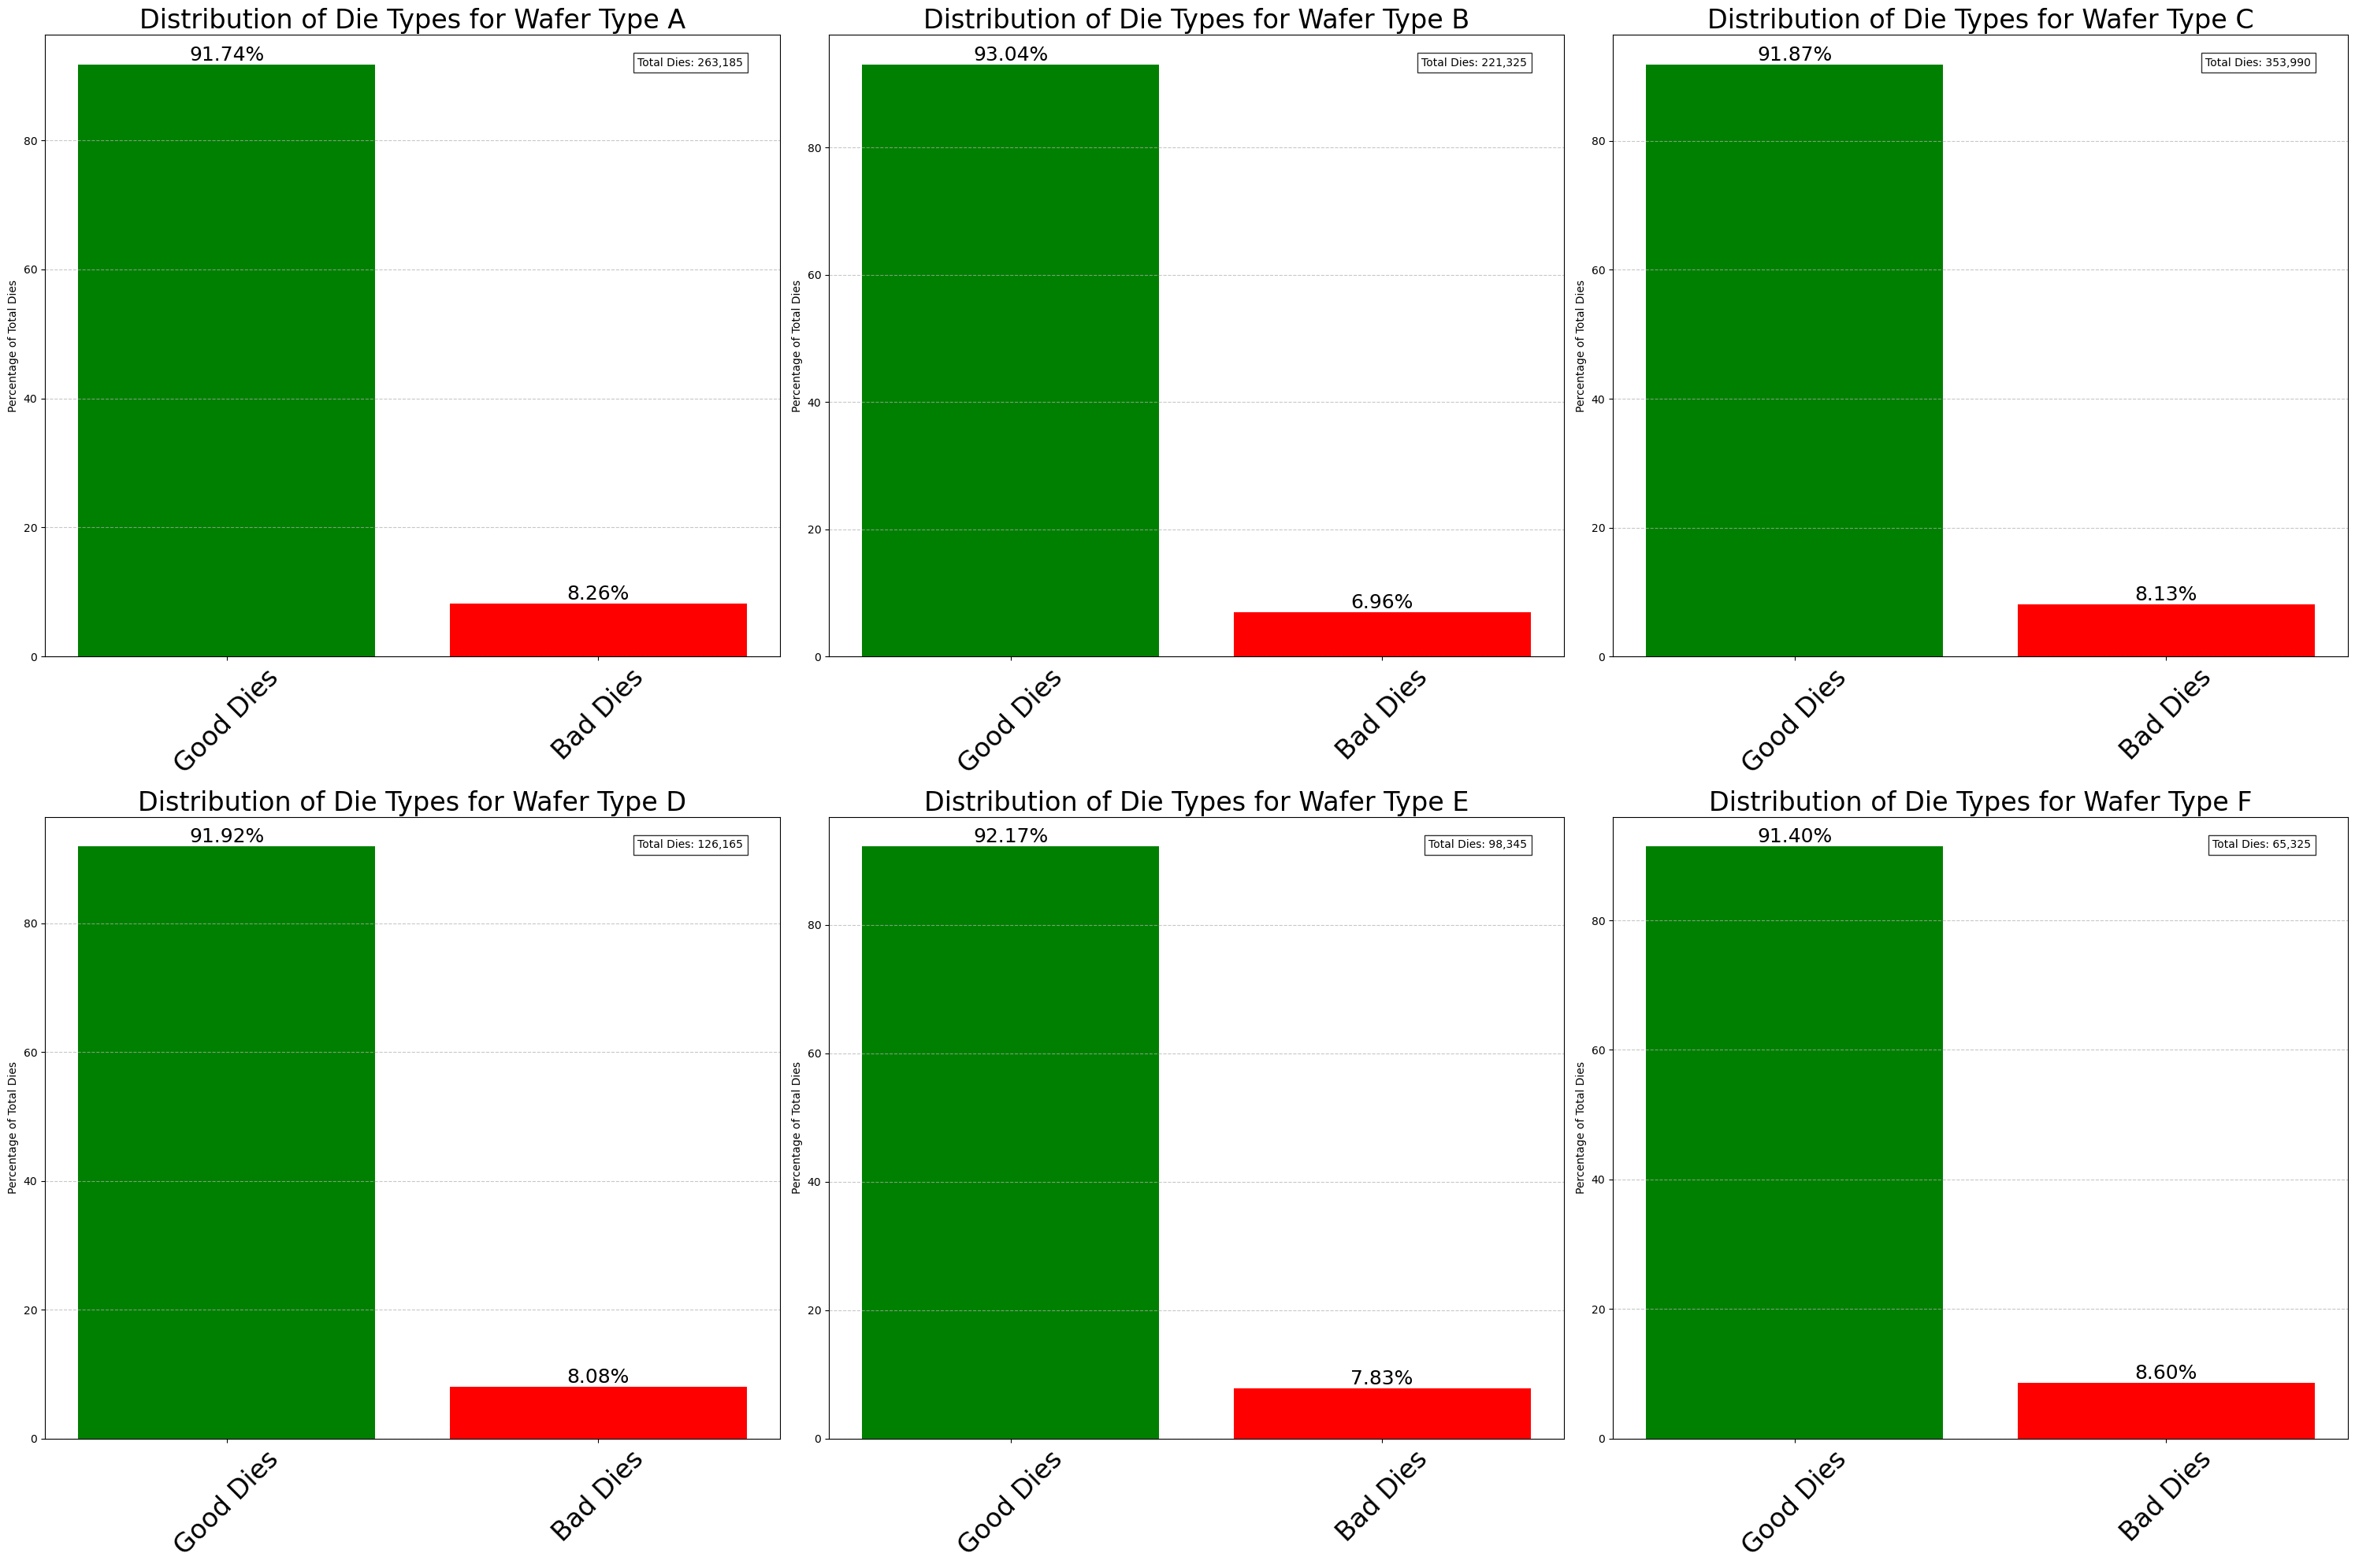

In [47]:
def plot_wafer_type_distributions_grid_test(df, wafer_types):
    """
    Plot the distribution of good and bad dies for all wafer types in a 3x2 grid for test data.
    
    :param df: DataFrame, The dataframe containing the wafer data
    :param wafer_types: list, List of wafer types to plot
    """
    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 3, figsize=(30, 20))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    for idx, wafer_type in enumerate(wafer_types):
        # Filter the DataFrame for the specified wafer type
        df_filtered = df[df['WaferType'] == wafer_type]
        
        # Calculate categories
        total_dies = len(df_filtered)
        good_dies = (df_filtered['IsGoodDie'] == True).sum()
        bad_dies = (df_filtered['IsGoodDie'] == False).sum()
        
        # Create data for plotting
        categories = ['Good Dies', 'Bad Dies']
        values = [good_dies, bad_dies]
        percentages = [v/total_dies*100 for v in values]
        colors = ['green', 'red']
        
        # Create bar plot in the corresponding subplot
        bars = axes[idx].bar(categories, percentages, color=colors)

        # Add percentage labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}%', ha='center', va='bottom', fontsize=18)
                     
        # Customize the subplot
        axes[idx].set_title(f'Distribution of Die Types for Wafer Type {wafer_type}', fontsize=24)
        axes[idx].set_ylabel('Percentage of Total Dies')
        axes[idx].set_xticks(range(len(categories)))
        axes[idx].set_xticklabels(categories, rotation=45, fontsize=24)
        axes[idx].grid(True, axis='y', linestyle='--', alpha=0.7)
        
        # Add total count as text
        axes[idx].text(0.95, 0.95, f'Total Dies: {total_dies:,}', 
                 transform=axes[idx].transAxes, 
                 ha='right',
                 bbox=dict(facecolor='white', alpha=0.8))
    
    # Remove any empty subplots
    for idx in range(len(wafer_types), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Plot distributions for test set
print("Test Set Distributions:")
test_wafer_types = sorted(df_wafers_test['WaferType'].unique())  # Sort wafer types alphabetically
plot_wafer_type_distributions_grid_test(df_wafers_test, test_wafer_types)

In [ ]:
# whats the yield of the wafers in the train set?
df_wafers.groupby('WaferName')['IsGoodDie'].mean().describe()

count    4200.000000
mean        0.962850
std         0.011008
min         0.900198
25%         0.955084
50%         0.962963
75%         0.971166
max         0.989055
Name: IsGoodDie, dtype: float64

In [ ]:
# whats the yield of the wafers in the test set?
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().describe()


count    455.000000
mean       0.919741
std        0.122994
min        0.287056
25%        0.939255
50%        0.959984
75%        0.971664
max        0.990657
Name: IsGoodDie, dtype: float64

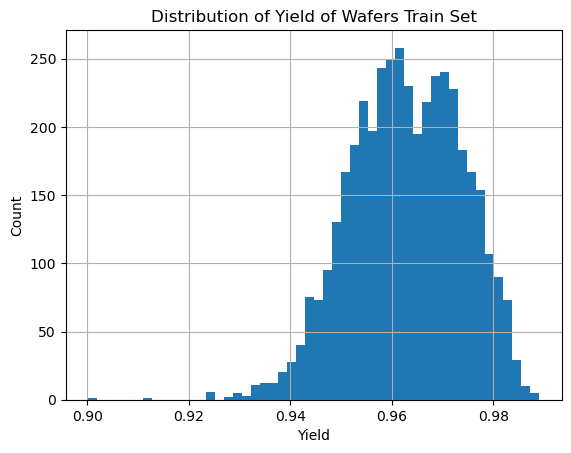

In [54]:
# lets see the distribution of the yield
df_wafers.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers Train Set')
plt.xlabel('Yield')
plt.ylabel('Count')
plt.show()

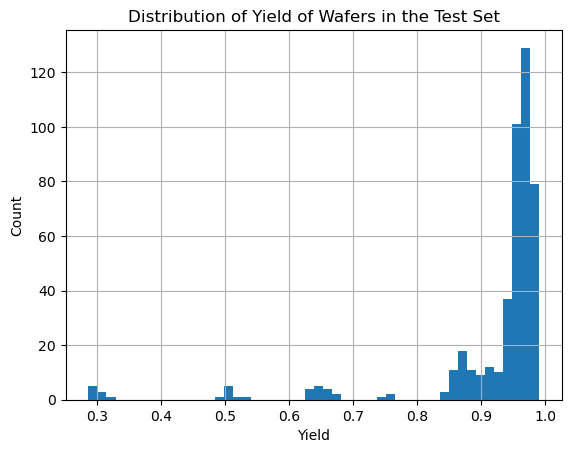

Train set: 4200 wafers with yield > 0.8
Test set: 420 wafers with yield > 0.8


In [52]:
# lets see the distribution of the yield
df_wafers_test.groupby('WaferName')['IsGoodDie'].mean().hist(bins=50)
plt.title('Distribution of Yield of Wafers in the Test Set')
plt.xlabel('Yield')
plt.ylabel('Count')
plt.show()


# how many wafers have yield > 0.8
print(f'Train set: {df_wafers[df_wafers.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')
print(f'Test set: {df_wafers_test[df_wafers_test.groupby("WaferName")["IsGoodDie"].transform("mean") > 0.8]["WaferName"].nunique()} wafers with yield > 0.8')


Looks like the the two distributions are very differnt -The 0.8 yield threshold is set because most wafers have yields above this value, as shown in the histogram. Wafers below 0.8 are rare and likely considered low quality. Using only wafers with yield > 0.8 for testing aligns with the customer fear to find randomly generated scratches and perform unnecessary ink. 

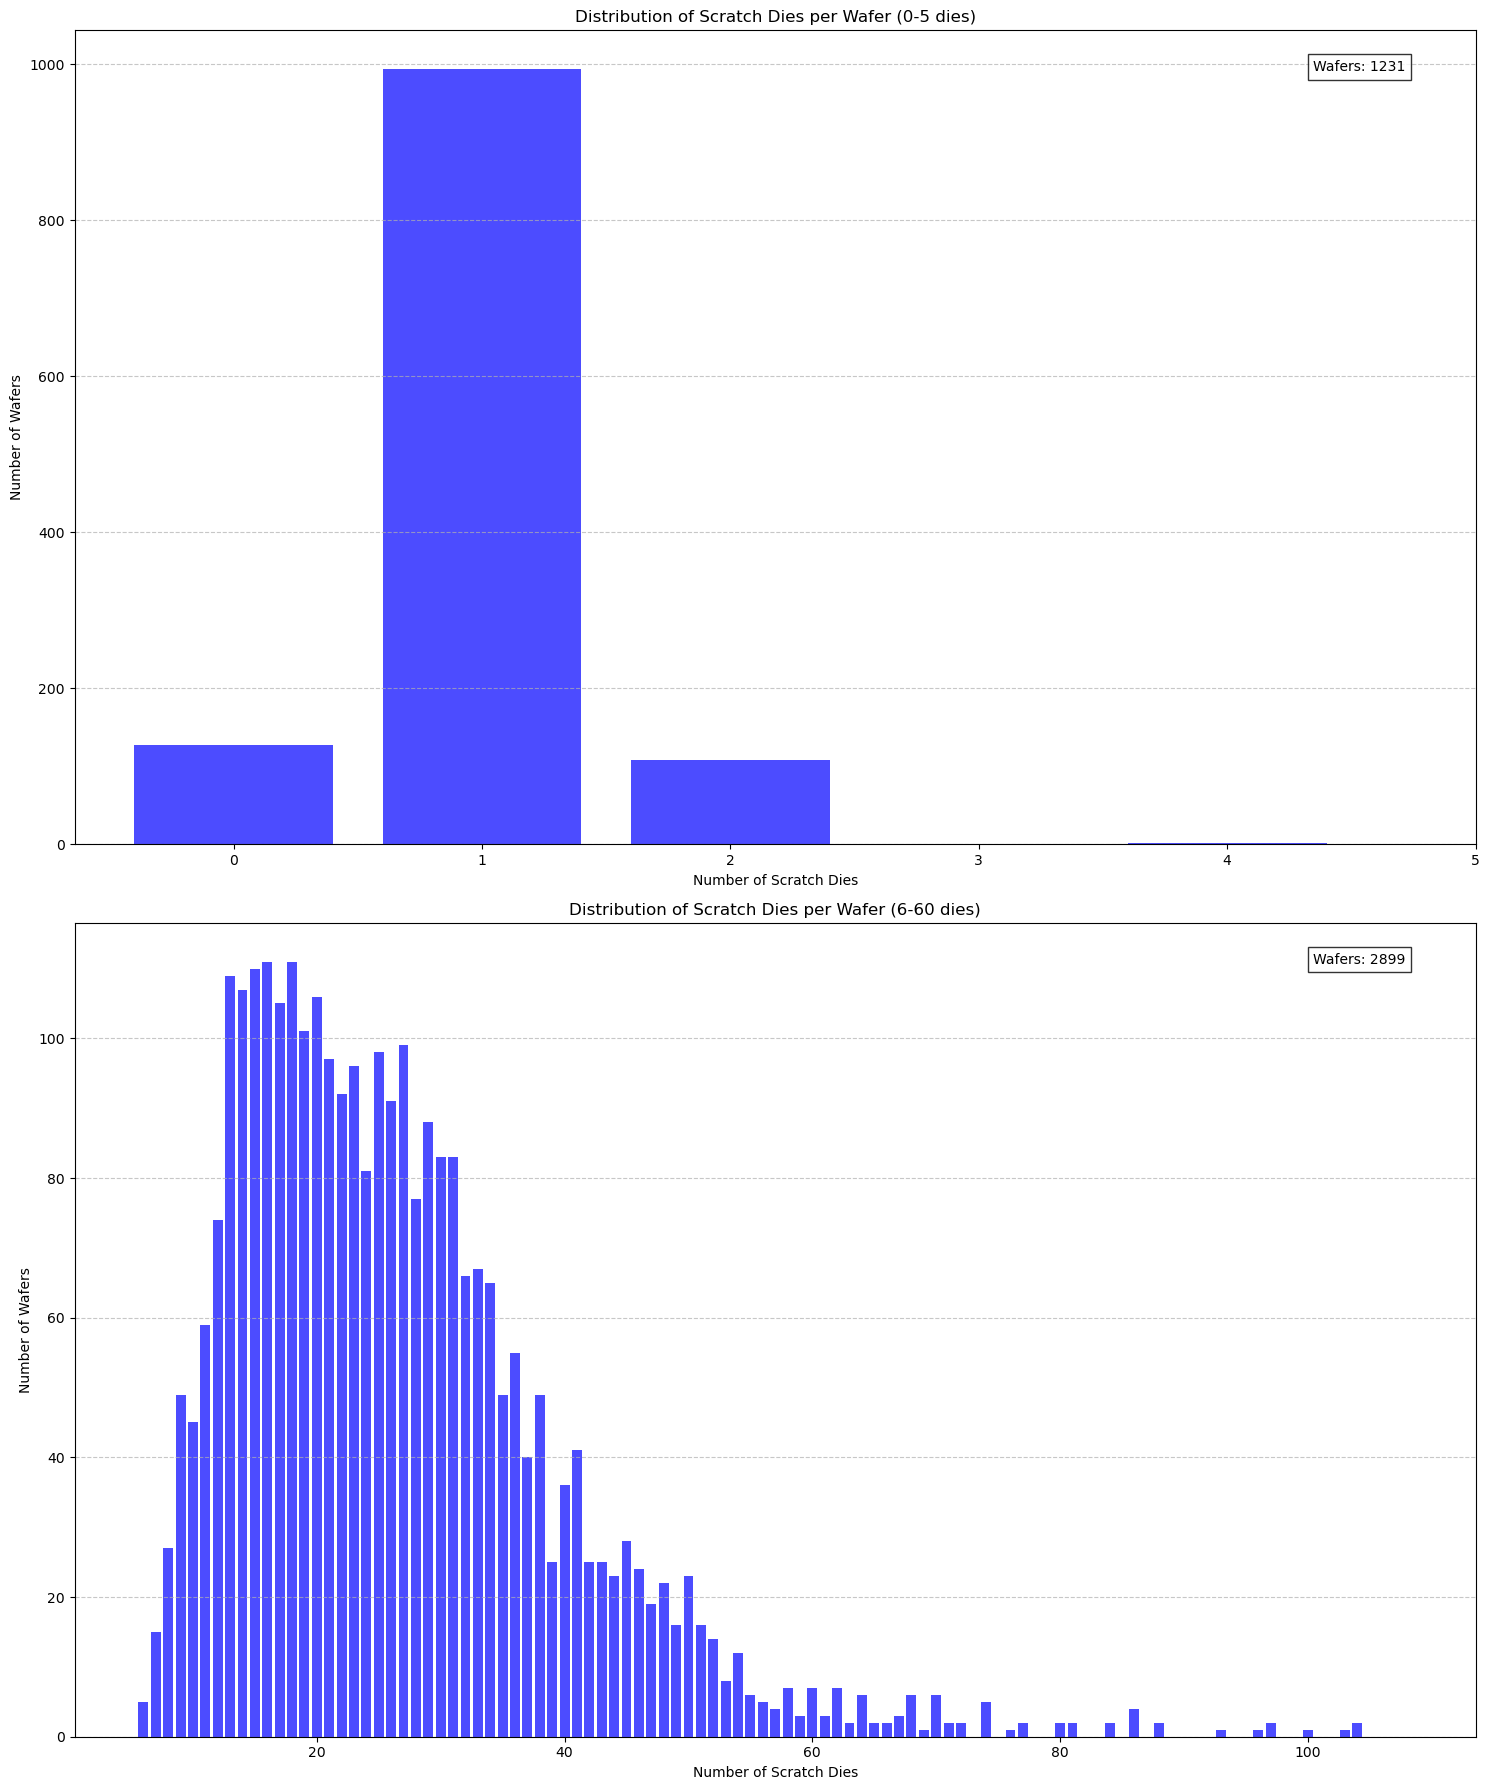


Scratch dies per wafer statistics:
       0-5 scratch dies  6-110 scratch dies
Count           1231.00             2969.00
Mean               0.99               26.64
Std                0.47               13.38
Min                0.00                6.00
25%                1.00               17.00
50%                1.00               24.00
75%                1.00               33.00
Max                5.00              104.00


In [166]:
# Count scratch dies per wafer
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()

# Create figure and axes for 3x1 grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 18))

# First histogram (0-5 scratch dies)
ax1.hist(scratch_counts[scratch_counts <= 5], 
         bins=range(6), 
         align='left', 
         rwidth=0.8, 
         color='blue', 
         alpha=0.7)
ax1.set_title('Distribution of Scratch Dies per Wafer (0-5 dies)', fontsize=12)
ax1.set_xlabel('Number of Scratch Dies', fontsize=10)
ax1.set_ylabel('Number of Wafers', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(range(6))

# Second histogram (5-60 scratch dies)
ax2.hist(scratch_counts[(scratch_counts > 5)],# & (scratch_counts <= 60)], 
         bins=range(6, 110), 
         align='left', 
         rwidth=0.8, 
         color='blue', 
         alpha=0.7)
ax2.set_title('Distribution of Scratch Dies per Wafer (6-60 dies)', fontsize=12)
ax2.set_xlabel('Number of Scratch Dies', fontsize=10)
ax2.set_ylabel('Number of Wafers', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)


# Add text showing total number of wafers in each range
ax1.text(0.95, 0.95, f'Wafers: {len(scratch_counts[scratch_counts <= 5])}',
         transform=ax1.transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

ax2.text(0.95, 0.95, f'Wafers: {len(scratch_counts[(scratch_counts > 5) & (scratch_counts <= 60)])}',
         transform=ax2.transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))


plt.tight_layout()
plt.show()

# Print statistics for each range
print("\nScratch dies per wafer statistics:")
# Create separate Series for each range
stats_0_5 = scratch_counts[scratch_counts <= 5].describe()
stats_6_110 = scratch_counts[(scratch_counts > 5)].describe()


# Combine into a DataFrame with clear column names
stats_df = pd.DataFrame({
    '0-5 scratch dies': stats_0_5,
    '6-110 scratch dies': stats_6_110,
})

# Round to 2 decimal places for cleaner display
stats_df = stats_df.round(2)

# Optionally, you can rename the index for better clarity
stats_df.index = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

# Display the DataFrame
print(stats_df)



1231 wafers have what i suspect to be a problem with either the data itself or the definition of what is a scracth.
The data is split into two groups based on scratch die count, and a bit more then a qurter of the wafers fall into the first two: 0–5  scratched dies. Even though some wafers in the 0–5 group may still be slightly damaged, they are kept in the training set because they make up a large, realistic portion of the production. Using them helps the model learn from common cases and generalize better, rather than focusing only on rare, perfect wafers which are the one with 0 scratched die.

this is highlty implanced problem ltaer when its time to chouse metrics  this should be taken into considartion

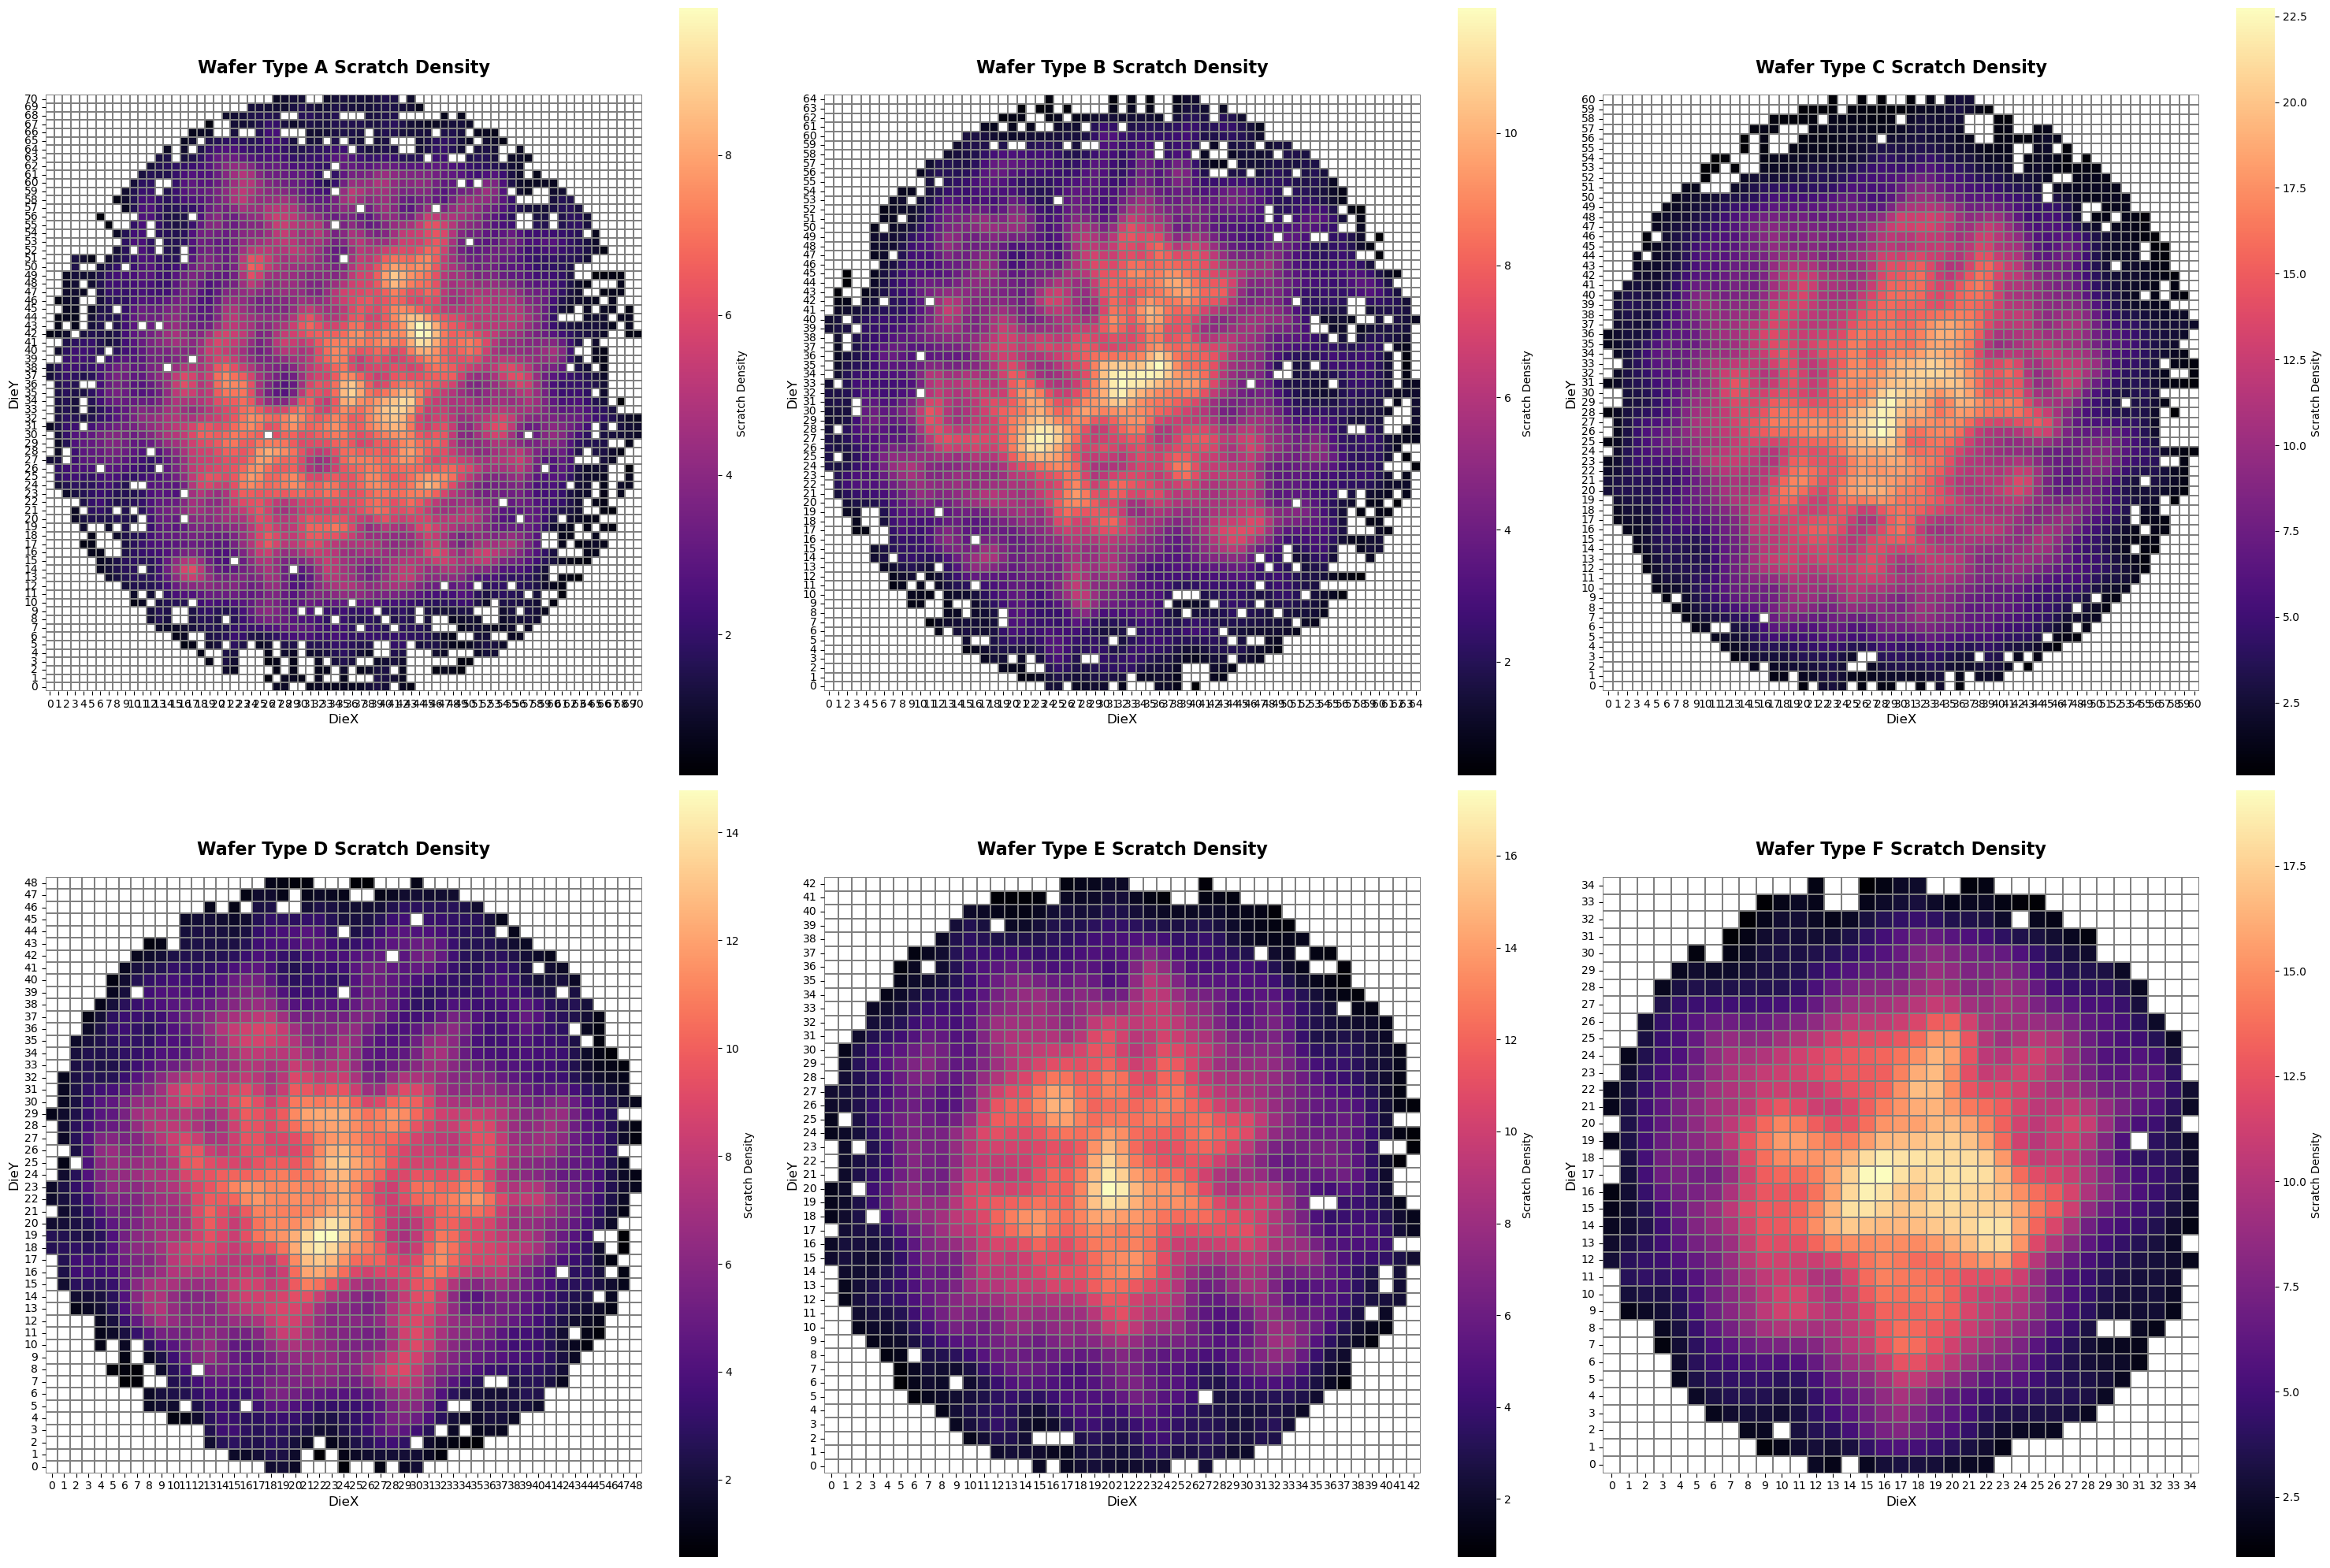


Wafer Type A:
Total Dies: 2,429,400
Scratch Dies: 14,009
Scratch Percentage: 0.58%

Wafer Type B:
Total Dies: 2,043,000
Scratch Dies: 13,568
Scratch Percentage: 0.66%

Wafer Type C:
Total Dies: 3,267,600
Scratch Dies: 24,485
Scratch Percentage: 0.75%

Wafer Type D:
Total Dies: 1,164,600
Scratch Dies: 10,647
Scratch Percentage: 0.91%

Wafer Type E:
Total Dies: 907,800
Scratch Dies: 9,497
Scratch Percentage: 1.05%

Wafer Type F:
Total Dies: 603,000
Scratch Dies: 8,113
Scratch Percentage: 1.35%


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.ravel()  # Flatten axes array for easier indexing

# Create custom colormap
original_cmap = sns.color_palette("magma", as_cmap=True)
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = np.array([1, 1, 1, 1])  # White for zero
custom_cmap = ListedColormap(colors)

# Process each wafer type
for idx, wafer_type in enumerate(['A', 'B', 'C', 'D', 'E', 'F']):
    # Filter data for current wafer type
    wafer_type_data = df_wafers[df_wafers['WaferType'] == wafer_type]
    
    # Count scratches for this wafer type
    scratch_counts = wafer_type_data[wafer_type_data['IsScratchDie']].groupby(['DieX', 'DieY']).size().reset_index(name='ScratchCount')
    heatmap_data = scratch_counts.pivot(index='DieY', columns='DieX', values='ScratchCount').fillna(0)
    
    # Smooth the data
    blurred_data = gaussian_filter(heatmap_data, sigma=1)
    
    # Mask zeros
    mask = heatmap_data == 0
    
    # Create heatmap in corresponding subplot
    sns.heatmap(
        blurred_data,
        cmap=custom_cmap,
        mask=mask,
        linewidths=0.2,
        linecolor='gray',
        square=True,
        cbar_kws={'label': 'Scratch Density'},
        xticklabels=True,
        yticklabels=True,
        ax=axes[idx]
    )
    
    # Customize subplot
    axes[idx].set_title(f'Wafer Type {wafer_type} Scratch Density', fontsize=16, weight='bold', pad=20)
    axes[idx].set_xlabel('DieX', fontsize=12)
    axes[idx].set_ylabel('DieY', fontsize=12)
    axes[idx].tick_params(rotation=0)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

# Print statistics for each wafer type
for wafer_type in ['A', 'B', 'C', 'D', 'E', 'F']:
    wafer_type_data = df_wafers[df_wafers['WaferType'] == wafer_type]
    total_dies = len(wafer_type_data)
    scratch_dies = wafer_type_data['IsScratchDie'].sum()
    scratch_percentage = (scratch_dies/total_dies) * 100
    print(f"\nWafer Type {wafer_type}:")
    print(f"Total Dies: {total_dies:,}")
    print(f"Scratch Dies: {scratch_dies:,}")
    print(f"Scratch Percentage: {scratch_percentage:.2f}%")

it looks like there is a higher consentration of scratches in a particular area of the wafer - this will be the base for our first model. 

# Optional - droping the wafers with no scratches and with one or two scratched dies 

In [79]:
# Optional - droping the wafers with no scratches and with one or two scratched dies but keeps the one with 0 
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum().reset_index()

# Drop only wafers that have 1 or 2 scratches, keep wafers with 0 and 3+ scratches
df_wafers_filterd = df_wafers[df_wafers['WaferName'].isin(
    scratch_counts[
        (scratch_counts['IsScratchDie'] == 0) | 
        (scratch_counts['IsScratchDie'] > 2)
    ]['WaferName']
)].reset_index(drop=True)
df_wafers_filterd

WaferName  DieX  DieY  IsGoodDie  IsScratchDie WaferType
0          8PFrAN     0    27       True         False         A
1          8PFrAN     0    28       True         False         A
2          8PFrAN     0    29       True         False         A
3          8PFrAN     0    30       True         False         A
4          8PFrAN     0    31       True         False         A
...           ...   ...   ...        ...           ...       ...
7634833    CofPVD    64    36       True         False         B
7634834    CofPVD    64    37       True         False         B
7634835    CofPVD    64    38       True         False         B
7634836    CofPVD    64    39       True         False         B
7634837    CofPVD    64    40       True         False         B

[7634838 rows x 6 columns]

## First approach - XGBoost


In [117]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# cretae holdout set and train set so that the upsampled model canm be tesetd on the holdout set
df_wafers_train, df_holdout = train_test_split(df_wafers, test_size=0.2, random_state=42)

# One-hot encode WaferType
df_wafers_train = pd.get_dummies(df_wafers_train, columns=['WaferType'], prefix=['WaferType'])
df_holdout = pd.get_dummies(df_holdout, columns=['WaferType'], prefix=['WaferType'])

X = df_wafers_train.drop(columns=['IsScratchDie','WaferName'])
y = df_wafers_train['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

Accuracy on upsampled data : 0.9922920627148262


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   1653619
        True       0.00      0.00      0.00     12845

    accuracy                           0.99   1666464
   macro avg       0.50      0.50      0.50   1666464
weighted avg       0.98      0.99      0.99   1666464

Confusion Matrix upsampled data:
 [[1653619       0]
 [  12845       0]]
Accuracy on holdout set : 0.9923061044222977


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.00      0.00      0.00     16027

    accuracy                           0.99   2083080
   macro avg       0.50      0.50      0.50   2083080
weighted avg       0.98      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2067053       0]
 [  16027       0]]


c:\Users\Alon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Looks like the model cant learn anything due to the inbalance between the lables - non scrached dies dies are 128 times more present here.

### With minority class upsampling.


In [ ]:
# upsampling the minority class
# Check the distribution of the target variable in the training set
print(df_wafers_train['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_train[df_wafers_train.IsScratchDie == False]
minority = df_wafers_train[df_wafers_train.IsScratchDie == True]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority, minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [120]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 6613901
False: 6614943


In [121]:
# lets use an xgboost classifier to predict the scratch dies
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:33:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9069397425989021
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91   1653085
        True       0.97      0.84      0.90   1654127

    accuracy                           0.91   3307212
   macro avg       0.91      0.91      0.91   3307212
weighted avg       0.91      0.91      0.91   3307212

Confusion Matrix upsampled data:
 [[1603871   49214]
 [ 258556 1395571]]
Accuracy on holdout set : 0.9693545135088427
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.91      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080

Confusion Matrix holdout set:
 [[2005771   61282]
 [   2555   13472]]


### With majorty class downsampled 

In [ ]:
# Upsample minority class
majority_upsampled = resample(majority, 
                              replace=True,     # sample with replacement
                              n_samples=len(minority),    # to match majority class
                              random_state=42) # reproducible results

# Combine minority class with downsampled majority class
df_upsampled = pd.concat([minority, majority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42)  # shuffle the dataset

# Split the data into features and target variable
X = df_upsampled.drop(columns=['IsScratchDie','WaferName'])
y = df_upsampled['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# how many true and flase are there in y
print(f'True: {y_train.sum()}')
print(f'False: {len(y_train) - y_train.sum()}')

True: 51507
False: 51360


In [146]:
# Train the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:43:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.908931834972975
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.86      0.97      0.91     12932
        True       0.97      0.85      0.90     12785

    accuracy                           0.91     25717
   macro avg       0.92      0.91      0.91     25717
weighted avg       0.92      0.91      0.91     25717

Confusion Matrix upsampled data:
 [[12552   380]
 [ 1962 10823]]
Accuracy on holdout set : 0.9690597576665323
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.97      0.98   2067053
        True       0.18      0.84      0.30     16027

    accuracy                           0.97   2083080
   macro avg       0.59      0.91      0.64   2083080
weighted avg       0.99      0.97      0.98   2083080

Confusion Matrix holdout set:
 [[2005108   61945]
 [   2506   13521]]


The current model's low precision (0.18) shows it's frequently mislabeling good dies as scratched, which is costly since preserving good dies is likely more profitable than correctly catching scratched ones. The consistent results across both models at the same ratio demonstrates how crucial class balance is to performance.
This leads to me to try to find the optimal upsample ratio.

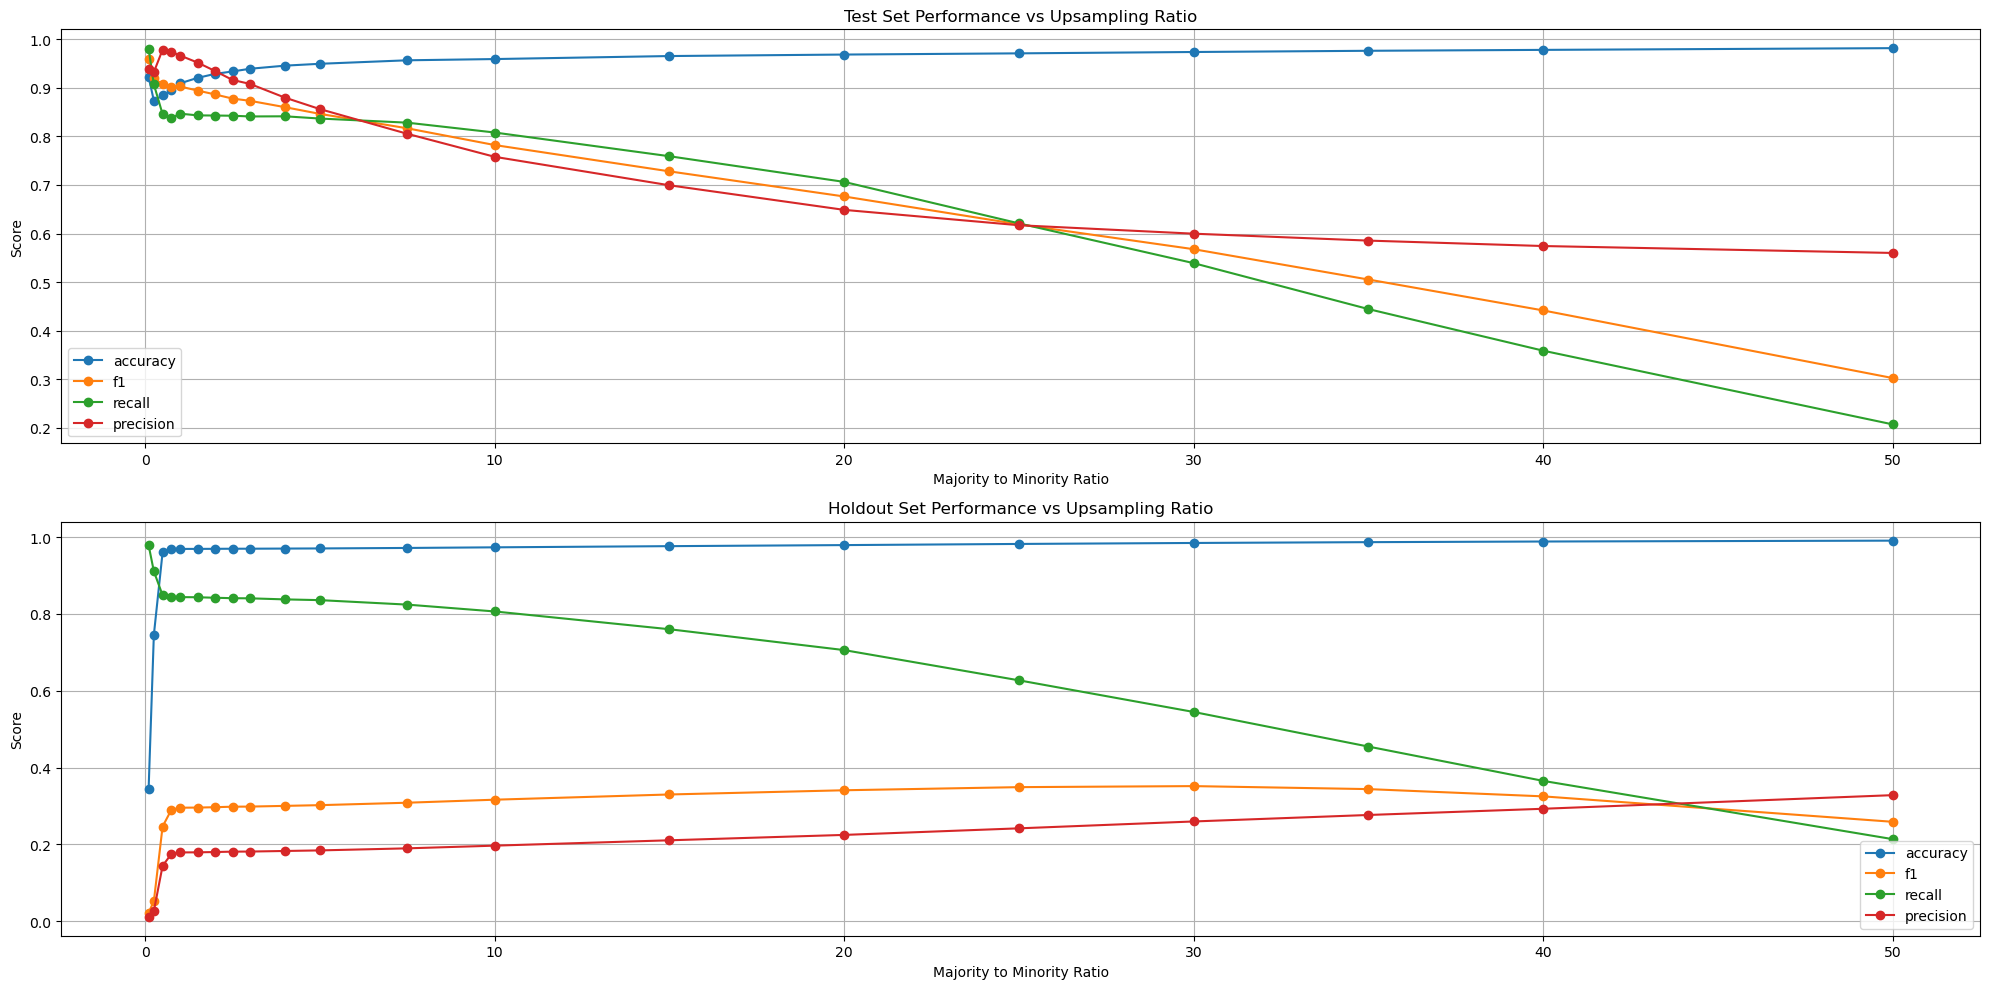


Best ratio: 30.0
Best holdout F1 score: 0.352
Best holdout recall score: 0.545
Best holdout precision score: 0.260

Confusion Matrix for best ratio (Holdout Set):
[[2042174   24879]
 [   7297    8730]]


In [ ]:
# By itarion over the ratios we can see how the model performs with different upsampling ratios
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

def train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout):
    """
    Train XGBoost model and evaluate on test and holdout sets
    """
    clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)
    
    # Test set predictions and metrics
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    
    # Holdout set predictions and metrics
    y_holdout_pred = clf.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_f1 = f1_score(y_holdout, y_holdout_pred)
    holdout_recall = recall_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred)
    
    return {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'holdout_accuracy': holdout_accuracy,
        'holdout_f1': holdout_f1,
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        'holdout_confusion_matrix': confusion_matrix(y_holdout, y_holdout_pred),
        'test_recall': test_recall,
        'test_precision': test_precision,
        'holdout_recall': holdout_recall,
        'holdout_precision': holdout_precision
    }

def experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios):
    """
    Test different upsampling ratios and collect results
    """
    results = []
    
    for ratio in ratios:
        # Calculate number of samples for majority class
        n_samples = int(len(minority) * ratio)
        
        # Resample majority class
        majority_downsampled = resample(majority,
                                      replace=True,
                                      n_samples=n_samples,
                                      random_state=42)
        
        # Combine classes
        df_balanced = pd.concat([minority, majority_downsampled])
        df_balanced = df_balanced.sample(frac=1, random_state=42)
        
        # Prepare features and target
        X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
        y = df_balanced['IsScratchDie']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train and evaluate
        metrics = train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout)
        metrics['ratio'] = ratio
        results.append(metrics)
        
        # print(f"\nResults for ratio {ratio}:")
        # print(f"Test Set - Accuracy: {metrics['test_accuracy']:.3f}, F1: {metrics['test_f1']:.3f}")
        # print(f"Holdout Set - Accuracy: {metrics['holdout_accuracy']:.3f}, F1: {metrics['holdout_f1']:.3f}")
    
    return results

# Define ratios to test (ratio of majority samples to minority samples)
ratios = [0.1, 0.25, 0.5, 0.75,  # Very low ratios
          1.0, 1.5, 2.0, 2.5,     # Around balanced
          3.0, 4.0, 5.0, 7.5,     # Moderate imbalance
          10.0, 15.0, 20.0, 25.0,       # High imbalance
          30.0, 35.0 , 40.0, 50.0]       # Very high imbalance

# Run experiment
results = experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Test metrics
test_metrics = ['test_accuracy', 'test_f1', 'test_recall', 'test_precision']
for metric in test_metrics:
    ax1.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('test_', ''))

ax1.set_xlabel('Majority to Minority Ratio')
ax1.set_ylabel('Score')
ax1.set_title('Test Set Performance vs Upsampling Ratio')
ax1.legend()
ax1.grid(True)

# Holdout metrics
holdout_metrics = ['holdout_accuracy', 'holdout_f1', 'holdout_recall', 'holdout_precision']
for metric in holdout_metrics:
    ax2.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('holdout_', ''))

ax2.set_xlabel('Majority to Minority Ratio')
ax2.set_ylabel('Score')
ax2.set_title('Holdout Set Performance vs Upsampling Ratio')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find best ratio based on holdout F1 score
best_result = max(results, key=lambda x: x['holdout_f1'])
print("\nBest ratio:", best_result['ratio'])
print(f"Best holdout F1 score: {best_result['holdout_f1']:.3f}")
print(f"Best holdout recall score: {best_result['holdout_recall']:.3f}")
print(f"Best holdout precision score: {best_result['holdout_precision']:.3f}")
print("\nConfusion Matrix for best ratio (Holdout Set):")
print(best_result['holdout_confusion_matrix'])



Based on the graphs and metrics shown, the 30:1 majority-to-minority ratio appears to be selected as the best because it represents an optimal trade-off between different performance metrics:
Looking at the holdout set (bottom graph), which is more important for evaluating true model performance:

F1 score (orange line) reaches close to its maximum value around ratio 30. The F1 score (0.352) balances precision and recall, making it a good overall performance metric.
Recall (green line) is still reasonably high at ratio 30 (0.545), indicating the model is still identifying a good portion of the positive cases. After ratio 30, recall drops significantly.
Precision (red line) continues to increase gradually past ratio 30, but not enough to offset the sharp decline in recall.
Accuracy (blue line) remains consistently high across all ratios, so it's not a distinguishing factor.

The upper test set graph shows similar trends, with metrics beginning to stabilize or showing diminishing returns around ratio 30.
This appears to be a classic imbalanced classification problem. As the upsampling ratio increases (reducing class imbalance), the model's ability to detect minority class examples (recall) improves initially but eventually declines, while precision fluctuates. Ratio 30 represents the sweet spot where the F1 score, which balances these competing objectives, reaches its optimal value.
The confusion matrix at the bottom confirms this is a highly imbalanced dataset (many more negative than positive cases), making the F1 score a more appropriate optimization target than accuracy.

In [158]:
# Calculate number of samples for majority class
n_samples = int(len(minority) * 30)

# Resample majority class
majority_downsampled = resample(majority,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)

# Combine classes
df_balanced = pd.concat([minority, majority_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Prepare features and target
X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
y = df_balanced['IsScratchDie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Full results for the best model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout['IsScratchDie']
X_holdout = df_holdout.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))

Accuracy on upsampled data : 0.9733173444787023
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.98      0.99      0.99    385654
        True       0.60      0.54      0.57     12957

    accuracy                           0.97    398611
   macro avg       0.79      0.76      0.78    398611
weighted avg       0.97      0.97      0.97    398611

Confusion Matrix upsampled data:
 [[380991   4663]
 [  5973   6984]]
Accuracy on holdout set : 0.9845536417228336
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99   2067053
        True       0.26      0.54      0.35     16027

    accuracy                           0.98   2083080
   macro avg       0.63      0.77      0.67   2083080
weighted avg       0.99      0.98      0.99   2083080

Confusion Matrix holdout set:
 [[2042174   24879]
 [   7297    8730]]


<Figure size 1000x800 with 0 Axes>

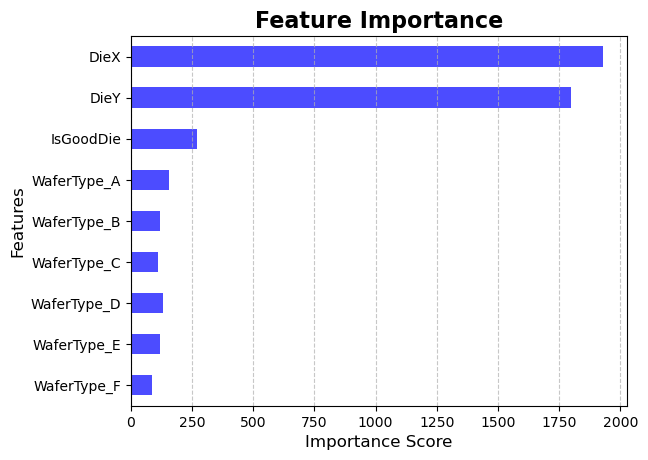

In [163]:
# Get feature importance from the model
importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_index(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', legend=False, color='blue', alpha=0.7)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Second approach - adding a feature that describes neighbours 

In [ ]:
# Counting for each die there adjacent scratched dies
def count_adjacent_scratches(df):
    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # Initialize the new column with zeros
    result_df['AdjacentScratchCount'] = 0
    
    # Group by wafer name as we need to process each wafer separately
    for wafer_name, wafer_df in df.groupby('WaferName'):
        print(f"Processing wafer: {wafer_name}")
        
        # Create a set of scratched die positions for faster lookups
        scratched_positions = set(
            zip(wafer_df[wafer_df['IsScratchDie']]['DieX'], 
                wafer_df[wafer_df['IsScratchDie']]['DieY'])
        )
        
        # Create a dictionary mapping die positions to row indices
        position_map = dict(zip(zip(wafer_df['DieX'], wafer_df['DieY']), wafer_df.index))
        
        # Define the 8 adjacent offsets
        adjacent_offsets = [
            (-1, -1), (-1, 0), (-1, 1),
            (0, -1),           (0, 1),
            (1, -1),  (1, 0),  (1, 1)
        ]
        
        # Process all dies at once
        for idx, row in wafer_df.iterrows():
            x, y = row.DieX, row.DieY
            
            # Count adjacent scratched dies using set operations
            count = sum(1 for dx, dy in adjacent_offsets if (x+dx, y+dy) in scratched_positions)
            
            # Update the result dataframe
            result_df.loc[idx, 'AdjacentScratchCount'] = count
    
    return result_df

In [173]:
df_wafers_adj = count_adjacent_scratches(df_wafers_train)
df_holdout_adj = count_adjacent_scratches(df_holdout)

Processing wafer: 00Q792
Processing wafer: 01hHtd
Processing wafer: 042xYr
Processing wafer: 04XRmn
Processing wafer: 04kats
Processing wafer: 04m8dM
Processing wafer: 05OItq
Processing wafer: 05OOTD
Processing wafer: 061shK
Processing wafer: 062tv2
Processing wafer: 06s0Nk
Processing wafer: 06yPzs
Processing wafer: 07bYYB
Processing wafer: 07jCOP
Processing wafer: 0CUjW7
Processing wafer: 0F1nQ1
Processing wafer: 0Fbgb0
Processing wafer: 0FqZXx
Processing wafer: 0GBQq4
Processing wafer: 0GpSh2
Processing wafer: 0HHJ3o
Processing wafer: 0HiO2r
Processing wafer: 0JqNsU
Processing wafer: 0KW3Y7
Processing wafer: 0MlIpA
Processing wafer: 0OtGpm
Processing wafer: 0PzJB1
Processing wafer: 0Q5ePO
Processing wafer: 0QcTwn
Processing wafer: 0RGYQG
Processing wafer: 0TWVNe
Processing wafer: 0TdiMn
Processing wafer: 0UCmuk
Processing wafer: 0V0u5w
Processing wafer: 0a3M7q
Processing wafer: 0aVwco
Processing wafer: 0b4Mao
Processing wafer: 0bHb3N
Processing wafer: 0c9XYt
Processing wafer: 0eOMyR


Train Set Distribution of Adjacent Scratch Dies


AdjacentScratchCount
0    8101850
1      98183
2      92505
3      35708
4       2797
5       1013
6        242
7         17
8          5
Name: count, dtype: int64

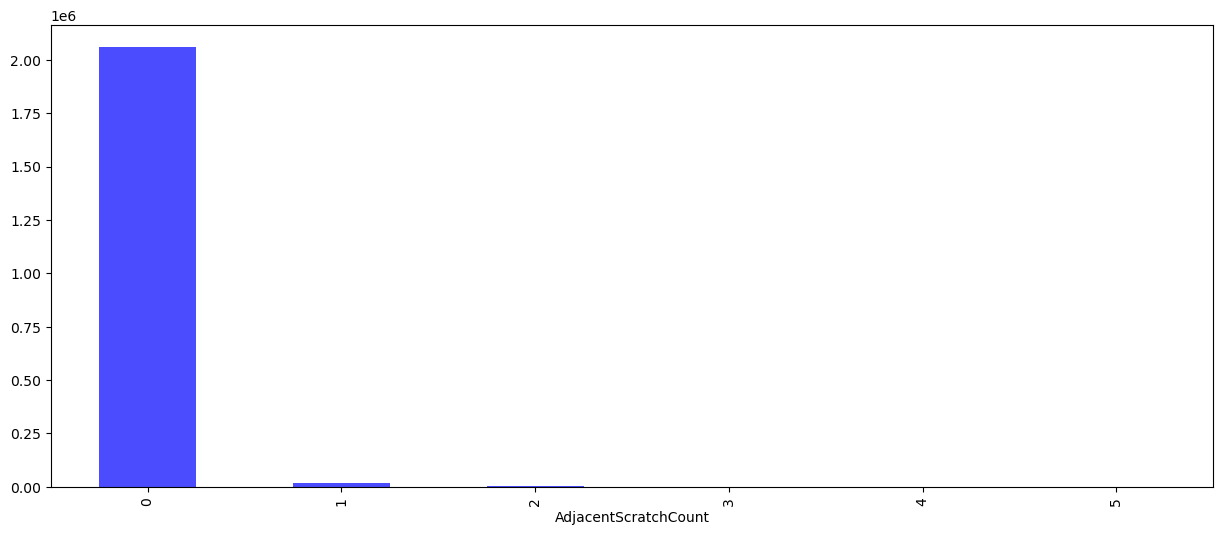

In [176]:
# what is the distribution of the amount of neighbours dies in each wafer

print("Train Set Distribution of Adjacent Scratch Dies")
df_holdout_adj.AdjacentScratchCount.value_counts(normalize=False).sort_index().plot(kind='bar', figsize=(15, 6), color='blue', alpha=0.7)
df_wafers_adj.AdjacentScratchCount.value_counts()

In [177]:
# train test split the data
X = df_wafers_adj.drop(columns=['IsScratchDie','WaferName'])
y = df_wafers_adj['IsScratchDie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=42)


In [178]:
# Train the model
from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))
print("AUC precision :\n", average_precision_score(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))
print("AUC precision :\n", average_precision_score(y_holdout, y_holdout_pred))

c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:04:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9977629279720414
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   2480408
        True       0.91      0.79      0.84     19288

    accuracy                           1.00   2499696
   macro avg       0.95      0.89      0.92   2499696
weighted avg       1.00      1.00      1.00   2499696

Confusion Matrix upsampled data:
 [[2478918    1490]
 [   4102   15186]]
AUC precision :
 0.7186220990058321
Accuracy on holdout set : 0.9944764483361177
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.92      0.31      0.46     16027

    accuracy                           0.99   2083080
   macro avg       0.96      0.65      0.73   2083080
weighted avg       0.99      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2066629     424]
 [  11082 

<Figure size 1000x800 with 0 Axes>

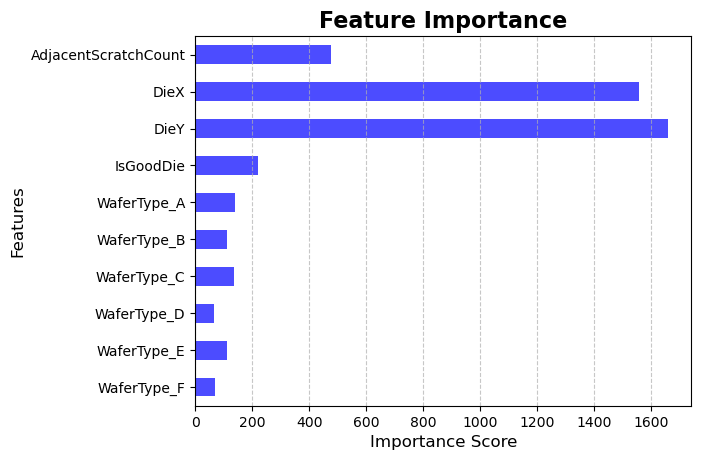

In [ ]:
# show the feature importance
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance from the model
importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index('Feature')
importance_df = importance_df.sort_index(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', legend=False, color='blue', alpha=0.7)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

## adjacency + upsampling

In [193]:
# upsampling the minority class
# Check the distribution of the target variable in the training set
print(df_wafers_adj['IsScratchDie'].value_counts(normalize=True))
print(df_holdout['IsScratchDie'].value_counts(normalize=True))

# Separate majority and minority classes
majority = df_wafers_adj[df_wafers_adj.IsScratchDie == False]
minority = df_wafers_adj[df_wafers_adj.IsScratchDie == True]

# Calculate number of samples for majority class
n_samples = int(len(minority) * 30)

# Resample majority class
majority_downsampled = resample(majority,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)

# Combine classes
df_balanced = pd.concat([minority, majority_downsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Prepare features and target
X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
y = df_balanced['IsScratchDie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

IsScratchDie
False    0.992284
True     0.007716
Name: proportion, dtype: float64
IsScratchDie
False    0.992306
True     0.007694
Name: proportion, dtype: float64


In [185]:
# Train the model
from sklearn.metrics import average_precision_score
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='aucpr', random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
print("Accuracy on upsampled data :", accuracy_score(y_test, y_pred))
print("Classification Report for upsampled data :\n", classification_report(y_test, y_pred))
print("Confusion Matrix upsampled data:\n", confusion_matrix(y_test, y_pred))

# now lets test the model on the holdout set
y_holdout = df_holdout_adj['IsScratchDie']
X_holdout = df_holdout_adj.drop(columns=['IsScratchDie','WaferName'])

# Make predictions
y_holdout_pred = clf.predict(X_holdout)

# Evaluate the model
print("Accuracy on holdout set :", accuracy_score(y_holdout, y_holdout_pred))
print("Classification Report for holdout set:\n", classification_report(y_holdout, y_holdout_pred))
print("Confusion Matrix holdout set:\n", confusion_matrix(y_holdout, y_holdout_pred))


c:\Users\Alon\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on upsampled data : 0.9926043184959773
Classification Report for upsampled data :
               precision    recall  f1-score   support

       False       0.99      1.00      1.00    385654
        True       0.97      0.79      0.87     12957

    accuracy                           0.99    398611
   macro avg       0.98      0.90      0.94    398611
weighted avg       0.99      0.99      0.99    398611

Confusion Matrix upsampled data:
 [[385385    269]
 [  2679  10278]]
Accuracy on holdout set : 0.9944663671102406
Classification Report for holdout set:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00   2067053
        True       0.92      0.31      0.46     16027

    accuracy                           0.99   2083080
   macro avg       0.96      0.65      0.73   2083080
weighted avg       0.99      0.99      0.99   2083080

Confusion Matrix holdout set:
 [[2066599     454]
 [  11073    4954]]


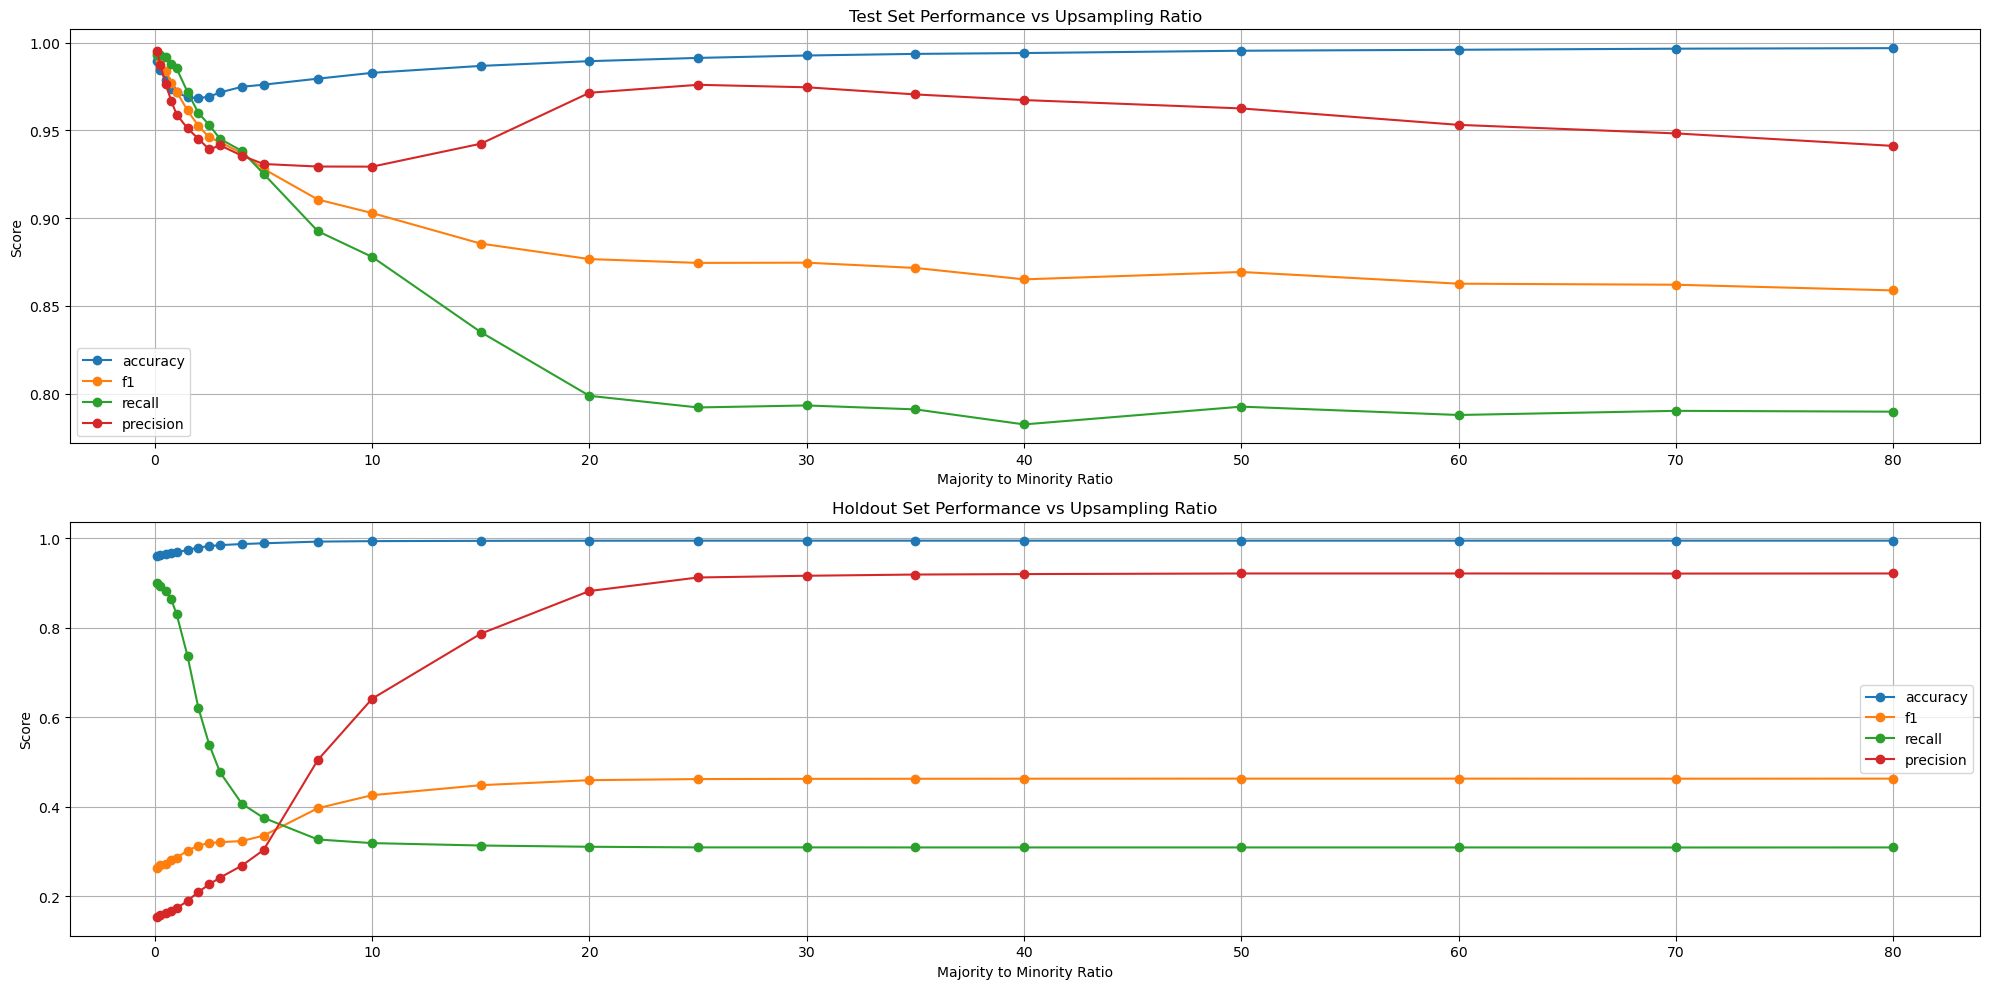


Best ratio: 50.0
Best holdout F1 score: 0.463
Best holdout recall score: 0.309
Best holdout precision score: 0.921

Confusion Matrix for best ratio (Holdout Set):
[[2066629     424]
 [  11075    4952]]


In [196]:
# By itarion over the ratios we can see how the model performs with different upsampling ratios
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Separate majority and minority classes
majority = df_wafers_adj[df_wafers_adj.IsScratchDie == False]
minority = df_wafers_adj[df_wafers_adj.IsScratchDie == True]

def train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout):
    """
    Train XGBoost model and evaluate on test and holdout sets
    """
    clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
    clf.fit(X_train, y_train)
    
    # Test set predictions and metrics
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    
    # Holdout set predictions and metrics
    y_holdout_pred = clf.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
    holdout_f1 = f1_score(y_holdout, y_holdout_pred)
    holdout_recall = recall_score(y_holdout, y_holdout_pred)
    holdout_precision = precision_score(y_holdout, y_holdout_pred)
    
    return {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'holdout_accuracy': holdout_accuracy,
        'holdout_f1': holdout_f1,
        'test_confusion_matrix': confusion_matrix(y_test, y_pred),
        'holdout_confusion_matrix': confusion_matrix(y_holdout, y_holdout_pred),
        'test_recall': test_recall,
        'test_precision': test_precision,
        'holdout_recall': holdout_recall,
        'holdout_precision': holdout_precision
    }

def experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios):
    """
    Test different upsampling ratios and collect results
    """
    results = []
    
    for ratio in ratios:
        # Calculate number of samples for majority class
        n_samples = int(len(minority) * ratio)
        
        # Resample majority class
        majority_downsampled = resample(majority,
                                      replace=True,
                                      n_samples=n_samples,
                                      random_state=42)
        
        # Combine classes
        df_balanced = pd.concat([minority, majority_downsampled])
        df_balanced = df_balanced.sample(frac=1, random_state=42)
        
        # Prepare features and target
        X = df_balanced.drop(columns=['IsScratchDie', 'WaferName'])
        y = df_balanced['IsScratchDie']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train and evaluate
        metrics = train_and_evaluate_model(X_train, X_test, y_train, y_test, X_holdout, y_holdout)
        metrics['ratio'] = ratio
        results.append(metrics)
        
        # print(f"\nResults for ratio {ratio}:")
        # print(f"Test Set - Accuracy: {metrics['test_accuracy']:.3f}, F1: {metrics['test_f1']:.3f}")
        # print(f"Holdout Set - Accuracy: {metrics['holdout_accuracy']:.3f}, F1: {metrics['holdout_f1']:.3f}")
    
    return results

# Define ratios to test (ratio of majority samples to minority samples)
ratios = [0.1, 0.25, 0.5, 0.75,  # Very low ratios
          1.0, 1.5, 2.0, 2.5,     # Around balanced
          3.0, 4.0, 5.0, 7.5,     # Moderate imbalance
          10.0, 15.0, 20.0, 25.0,       # High imbalance
          30.0, 35.0 , 40.0, 50.0, 60.0, 70.0,80]       # Very high imbalance

# Run experiment
results = experiment_upsampling_ratios(majority, minority, X_holdout, y_holdout, ratios)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Test metrics
test_metrics = ['test_accuracy', 'test_f1', 'test_recall', 'test_precision']
for metric in test_metrics:
    ax1.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('test_', ''))

ax1.set_xlabel('Majority to Minority Ratio')
ax1.set_ylabel('Score')
ax1.set_title('Test Set Performance vs Upsampling Ratio')
ax1.legend()
ax1.grid(True)

# Holdout metrics
holdout_metrics = ['holdout_accuracy', 'holdout_f1', 'holdout_recall', 'holdout_precision']
for metric in holdout_metrics:
    ax2.plot([r['ratio'] for r in results], 
             [r[metric] for r in results],
             marker='o',
             label=metric.replace('holdout_', ''))

ax2.set_xlabel('Majority to Minority Ratio')
ax2.set_ylabel('Score')
ax2.set_title('Holdout Set Performance vs Upsampling Ratio')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find best ratio based on holdout F1 score
best_result = max(results, key=lambda x: x['holdout_f1'])
print("\nBest ratio:", best_result['ratio'])
print(f"Best holdout F1 score: {best_result['holdout_f1']:.3f}")
print(f"Best holdout recall score: {best_result['holdout_recall']:.3f}")
print(f"Best holdout precision score: {best_result['holdout_precision']:.3f}")
print("\nConfusion Matrix for best ratio (Holdout Set):")
print(best_result['holdout_confusion_matrix'])



For the XGBoost part we reached several model - which one is the best of them is depeneded on the costs of the errors, how much it cost us to say a die a scrached and it not and how much it cost to say aa die is not scrached but it is. 
From the instructions - balnace is whats required that is why the f1 metric which takes into acount the percsion and the recall is chousen to be the leading metric.
We can move around this grafh to selects other model if we will have more context - lets say the cost of not detecting a scratch becomes much bigger we could move to model with lower ratio of upsampled/

## Second approch - connected components in graphs 

This solution is more computationally intensive but has greater potential to accurately detect scratches and inked dies.
By relaying on the on the assumption that scraches are elongated clusters of bad dies that have a high aspect ratio, this makes them connected commponents - meaning by selecting the all the bad dies - we can travers there grafhs, leaving only subgrafhs with a more then 3 dies (reasonable amount from the plot with the two histograms regading the amount of dies in a wafer).

This can lead to an increse in the idetification of bad dies as scratched when there are just bad, but i assume that in that case the cost of this action is not high - no good dies go to waste.

One way to enhance the process is by developing an algorithm that simulates the inking step. In essence, inking marks not only the directly scratched dies but also good dies that lie along the scratch's path. These can be identified by analyzing which dies fall between or connect nearby scratched regions, using connected component analysis to trace plausible scratch trajectories. This could improve both detection accuracy and model robustness.

In [ ]:
# Initialize the graph and find scratch candidates
import networkx as nx
import numpy as np
import pandas as pd
from collections import defaultdict
from numba import cuda, float32, int32, boolean

def create_wafer_graph(wafer_df):
    """
    Convert wafer data into a graph where nodes are dies and edges connect adjacent dies
    Only bad dies are included as nodes to find connected components of defects
    """
    # Create graph
    G = nx.Graph()
    
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    # Add nodes for bad dies
    for x, y in bad_dies:
        G.add_node((x, y))
    
    # Add edges between adjacent bad dies (including diagonals)
    for i, (x1, y1) in enumerate(bad_dies):
        for x2, y2 in bad_dies[i+1:]:
            if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:  # Adjacent dies
                G.add_edge((x1, y1), (x2, y2))
                
    return G

def find_scratch_candidates(G, min_size=3, min_aspect_ratio=2):
    """
    Find connected components that could be scratches based on size and shape
    """
    components = list(nx.connected_components(G))
    scratch_candidates = []
    
    for component in components:
        if len(component) >= min_size:
            scratch_candidates.append(set(component))
                
    return scratch_candidates

@cuda.jit
def check_adjacency_kernel(coords_x, coords_y, adjacency_matrix, n):
    """
    CUDA kernel to check adjacency between pairs of coordinates
    """
    i, j = cuda.grid(2)
    
    if i < n and j < n and i < j:  # Only compute upper triangle to avoid duplicates
        if abs(coords_x[i] - coords_x[j]) <= 1 and abs(coords_y[i] - coords_y[j]) <= 1:
            adjacency_matrix[i, j] = 1
            adjacency_matrix[j, i] = 1  # Make symmetric

@cuda.jit
def mark_scratch_dies_kernel(die_x, die_y, scratch_x, scratch_y, scratch_count, results):
    """
    CUDA kernel to mark dies that are part of scratches
    """
    i = cuda.grid(1)
    if i < len(die_x):
        for j in range(scratch_count):
            if die_x[i] == scratch_x[j] and die_y[i] == scratch_y[j]:
                results[i] = True
                break

def create_wafer_graph_gpu(wafer_df):
    """
    Create a graph using GPU for adjacency computation, then convert to NetworkX
    """
    # Get bad dies coordinates
    bad_dies = wafer_df[wafer_df['IsGoodDie'] == False][['DieX', 'DieY']].values
    
    if len(bad_dies) == 0:
        return nx.Graph()
    
    n = len(bad_dies)
    coords_x = bad_dies[:, 0].astype(np.int32)
    coords_y = bad_dies[:, 1].astype(np.int32)
    
    print(coords_x.shape, coords_x.dtype)
    print(coords_y.shape, coords_y.dtype)


    # Create adjacency matrix on GPU
    adjacency_matrix = np.zeros((n, n), dtype=np.int32)
    d_adjacency_matrix = cuda.to_device(adjacency_matrix)
    d_coords_x = cuda.to_device(coords_x)
    d_coords_y = cuda.to_device(coords_y)
    
    # Define grid and block dimensions
    threads_per_block = (16, 16)
    blocks_per_grid_x = (n + threads_per_block[0] - 1) // threads_per_block[0]
    blocks_per_grid_y = (n + threads_per_block[1] - 1) // threads_per_block[1]
    blocks_per_grid = (blocks_per_grid_x, blocks_per_grid_y)
    
    # Launch kernel
    check_adjacency_kernel[blocks_per_grid, threads_per_block](
        d_coords_x, d_coords_y, d_adjacency_matrix, n
    )
    
    # Copy result back to host
    adjacency_matrix = d_adjacency_matrix.copy_to_host()
    
    # Create NetworkX graph from adjacency matrix
    G = nx.Graph()
    
    # Add nodes with original coordinates
    for i, (x, y) in enumerate(bad_dies):
        G.add_node(i, coords=(x, y))
    
    # Add edges where adjacency is indicated
    for i in range(n):
        for j in range(i+1, n):
            if adjacency_matrix[i, j] == 1:
                G.add_edge(i, j)
    
    return G, bad_dies

def convert_index_components_to_coords(components, bad_dies):
    """
    Convert components with node indices to coordinates
    """
    coord_components = []
    for component in components:
        coords = set()
        for node_idx in component:
            coords.add(tuple(bad_dies[node_idx]))
        coord_components.append(coords)
    return coord_components

def apply_scratch_predictions_gpu(wafer_df, scratch_candidates):
    """
    Apply scratch predictions using GPU acceleration for the matching
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch candidates, return the DataFrame as is
    if not scratch_candidates:
        return wafer_df
    
    # Combine all scratch candidates into a single set of coordinates
    all_scratch_coords = set().union(*scratch_candidates)
    
    # Convert to numpy arrays for GPU processing
    scratch_x = np.array([coord[0] for coord in all_scratch_coords], dtype=np.int32)
    scratch_y = np.array([coord[1] for coord in all_scratch_coords], dtype=np.int32)
    
    die_x = wafer_df['DieX'].values.astype(np.int32)
    die_y = wafer_df['DieY'].values.astype(np.int32)
    
    # Prepare output array
    results = np.zeros(len(wafer_df), dtype=np.bool_)
    
    # Configure GPU kernel
    threads_per_block = 256
    blocks_per_grid = (len(wafer_df) + threads_per_block - 1) // threads_per_block
    
    # Launch kernel
    d_die_x = cuda.to_device(die_x)
    d_die_y = cuda.to_device(die_y)
    d_scratch_x = cuda.to_device(scratch_x)
    d_scratch_y = cuda.to_device(scratch_y)
    d_results = cuda.to_device(results)
    
    mark_scratch_dies_kernel[blocks_per_grid, threads_per_block](
        d_die_x, d_die_y, d_scratch_x, d_scratch_y, len(scratch_x), d_results
    )
    
    # Copy results back to host
    results = d_results.copy_to_host()
    
    # Update DataFrame with results
    wafer_df['IsScratchDie_Predicted'] = results
    
    return wafer_df

def evaluate_scratch_detection(wafer_df, scratch_candidates):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Get actual scratch dies
    actual_scratch_coords = set(map(tuple, 
        wafer_df[wafer_df['IsScratchDie'] == True][['DieX', 'DieY']].values))
    
    # Combine all detected scratch candidates
    detected_scratch_coords = set().union(*scratch_candidates) if scratch_candidates else set()
    
    # Calculate metrics
    true_positives = len(actual_scratch_coords & detected_scratch_coords)
    false_positives = len(detected_scratch_coords - actual_scratch_coords)
    false_negatives = len(actual_scratch_coords - detected_scratch_coords)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

def analyze_all_wafers_gpu(df_wafers,use_gpu=True):
    """
    Analyze all wafers using GPU acceleration for the most intensive parts
    """
    total_metrics = defaultdict(float)
    wafer_results = {}
    
    # Make a copy of the original DataFrame to store predictions
    df_wafers_with_predictions = df_wafers.copy()
    
    # Check if GPU is available
    if use_gpu is True:
        try:
            cuda.detect()
            print("CUDA GPU detected. Using GPU acceleration.")
        except:
            use_gpu = False
            print("No CUDA GPU detected. Falling back to CPU.")
    else:
        use_gpu = False
        print("GPU usage is forced to be False. Falling back to CPU.")



    # Force GPU usage for testing
    
    wafer_names = df_wafers['WaferName'].unique()
    total_wafers = len(wafer_names)
    
    for idx, wafer_name in enumerate(wafer_names):
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name]
        
        # Skip wafers with very low yield
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < 0.8:
            continue
        
        # Print progress
        print(f'Analyzing wafer: {wafer_name} | Yield Rate: {yield_rate:.2f}')
        print(f'Processed {idx+1}/{total_wafers} wafers')
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            # Fall back to CPU implementation
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_with_predictions['WaferName'] == wafer_name
        df_wafers_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
        
        # Evaluate results
        metrics = evaluate_scratch_detection(wafer_df, scratch_candidates)
        wafer_results[wafer_name] = metrics
        
        # Aggregate metrics
        for k, v in metrics.items():
            total_metrics[k] += v
    
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()} if n_wafers > 0 else {}
    
    return avg_metrics, wafer_results, df_wafers_with_predictions

def apply_scratch_predictions(wafer_df, scratch_candidates):
    """
    Add a column to the DataFrame indicating whether each die is part of a detected scratch
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch candidates, return the DataFrame as is
    if not scratch_candidates:
        return wafer_df
    
    # Combine all scratch candidates into a single set of coordinates
    all_scratch_coords = set().union(*scratch_candidates)
    
    # Update the DataFrame with True values for detected scratch coordinates
    for x, y in all_scratch_coords:
        mask = (wafer_df['DieX'] == x) & (wafer_df['DieY'] == y)
        wafer_df.loc[mask, 'IsScratchDie_Predicted'] = True
    
    return wafer_df

def predict_scratches_gpu(df_wafers_test):
    """
    Apply scratch detection to test data using GPU acceleration
    """
    # Check if GPU is available
    try:
        cuda.detect()
        use_gpu = True
    except:
        use_gpu = False
        print("No CUDA GPU detected. Falling back to CPU.")
    
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values



In [201]:
# Run analysis using GPU-accelerated version
avg_metrics, wafer_results, df_wafers_with_predictions = analyze_all_wafers_gpu(df_wafers, use_gpu=True)

print("\nAverage metrics across all wafers:")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.3f}")

Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3090'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-abb27e9f-6650-a8aa-ec0a-b36e9ad62063
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
CUDA GPU detected. Using GPU acceleration.
Analyzing wafer: 8PFrAN | Yield Rate: 0.95
Processed 1/4200 wafers
(187,) int32
(187,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: X35KWx | Yield Rate: 0.97
Processed 2/4200 wafers
(64,) int32
(64,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 8 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

Analyzing wafer: hpKllm | Yield Rate: 0.97
Processed 3/4200 wafers
(123,) int32
(123,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 64 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: gwjgvf | Yield Rate: 0.98
Processed 4/4200 wafers
(18,) int32
(18,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EAmFHC | Yield Rate: 0.97
Processed 5/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xHMg06 | Yield Rate: 0.96
Processed 6/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 6 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predic

Analyzing wafer: U6YFFh | Yield Rate: 0.97
Processed 7/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predic

Analyzing wafer: ih2CbI | Yield Rate: 0.97
Processed 8/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GHlqOp | Yield Rate: 0.96
Processed 9/4200 wafers
(176,) int32
(176,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 121 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Pred

Analyzing wafer: oF6oN1 | Yield Rate: 0.96
Processed 10/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dXjYqm | Yield Rate: 0.96
Processed 11/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 12 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: vuYAxE | Yield Rate: 0.95
Processed 12/4200 wafers
(157,) int32
(157,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 100 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Pred

Analyzing wafer: JXy6ur | Yield Rate: 0.97
Processed 13/4200 wafers
(106,) int32
(106,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: oJJWk4 | Yield Rate: 0.96
Processed 14/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 10 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: 27jJvL | Yield Rate: 0.97
Processed 15/4200 wafers
(46,) int32
(46,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 9 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l7n46l | Yield Rate: 0.97
Processed 16/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LtGS0N | Yield Rate: 0.96
Processed 17/4200 wafers
(143,) int32
(143,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 81 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: EaC79F | Yield Rate: 0.95
Processed 18/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SiPPbo | Yield Rate: 0.97
Processed 19/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: anpwRT | Yield Rate: 0.98
Processed 20/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y9tKHj | Yield Rate: 0.97
Processed 21/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jNSNSN | Yield Rate: 0.98
Processed 22/4200 wafers
(76,) int32
(76,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 25 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UpdgZR | Yield Rate: 0.95
Processed 23/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: x5emnH | Yield Rate: 0.97
Processed 24/4200 wafers
(90,) int32
(90,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 36 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: VChyJL | Yield Rate: 0.96
Processed 25/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QLTgHn | Yield Rate: 0.94
Processed 26/4200 wafers
(190,) int32
(190,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fHmbu6 | Yield Rate: 0.94
Processed 27/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NPOXim | Yield Rate: 0.94
Processed 28/4200 wafers
(178,) int32
(178,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IhkAx7 | Yield Rate: 0.97
Processed 29/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cXx0Me | Yield Rate: 0.94
Processed 30/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: opKvR2 | Yield Rate: 0.97
Processed 31/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SYrUp2 | Yield Rate: 0.96
Processed 32/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 14 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predi

Analyzing wafer: lFL7CI | Yield Rate: 0.97
Processed 33/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rHkc9I | Yield Rate: 0.96
Processed 34/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wvu5VK | Yield Rate: 0.97
Processed 35/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JlxwjD | Yield Rate: 0.96
Processed 36/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aqPB5H | Yield Rate: 0.96
Processed 37/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0lsAYQ | Yield Rate: 0.95
Processed 38/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hc40fa | Yield Rate: 0.95
Processed 39/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5ANCVA | Yield Rate: 0.95
Processed 40/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b9DG7u | Yield Rate: 0.96
Processed 41/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yrg3GH | Yield Rate: 0.98
Processed 42/4200 wafers
(20,) int32
(20,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7sACE9 | Yield Rate: 0.95
Processed 43/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 44pjTk | Yield Rate: 0.97
Processed 44/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eVj5rp | Yield Rate: 0.95
Processed 45/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1XHrDt | Yield Rate: 0.97
Processed 46/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TjVK98 | Yield Rate: 0.98
Processed 47/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ef1Ztr | Yield Rate: 0.96
Processed 48/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0TdiMn | Yield Rate: 0.97
Processed 49/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gpbHWT | Yield Rate: 0.96
Processed 50/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xNWmgg | Yield Rate: 0.95
Processed 51/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PBA5ly | Yield Rate: 0.96
Processed 52/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XO66oU | Yield Rate: 0.97
Processed 53/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: i07aqx | Yield Rate: 0.97
Processed 54/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5q7vd3 | Yield Rate: 0.96
Processed 55/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eCicvZ | Yield Rate: 0.95
Processed 56/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6biFn6 | Yield Rate: 0.97
Processed 57/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YwACva | Yield Rate: 0.96
Processed 58/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0wsJGL | Yield Rate: 0.97
Processed 59/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vR2QRJ | Yield Rate: 0.97
Processed 60/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SHgE1K | Yield Rate: 0.95
Processed 61/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: w4ycA3 | Yield Rate: 0.97
Processed 62/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: W1ke1K | Yield Rate: 0.96
Processed 63/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9eGsim | Yield Rate: 0.96
Processed 64/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: y8UGyX | Yield Rate: 0.97
Processed 65/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oQP2EU | Yield Rate: 0.95
Processed 66/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EjexY7 | Yield Rate: 0.95
Processed 67/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hUDhi9 | Yield Rate: 0.96
Processed 68/4200 wafers
(138,) int32
(138,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Y0ddoS | Yield Rate: 0.96
Processed 69/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DxOr5p | Yield Rate: 0.96
Processed 70/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CCwmDW | Yield Rate: 0.97
Processed 71/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RUyueV | Yield Rate: 0.98
Processed 72/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YUCjjp | Yield Rate: 0.96
Processed 73/4200 wafers
(163,) int32
(163,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8lDKGR | Yield Rate: 0.96
Processed 74/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PbhcX1 | Yield Rate: 0.96
Processed 75/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MVJ1Qa | Yield Rate: 0.96
Processed 76/4200 wafers
(176,) int32
(176,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7b7WQi | Yield Rate: 0.94
Processed 77/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bWWURv | Yield Rate: 0.95
Processed 78/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: czTTKN | Yield Rate: 0.97
Processed 79/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UO7nHy | Yield Rate: 0.95
Processed 80/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4RLb7I | Yield Rate: 0.96
Processed 81/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ro6Cjk | Yield Rate: 0.96
Processed 82/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fzsAar | Yield Rate: 0.97
Processed 83/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: P9eNXG | Yield Rate: 0.96
Processed 84/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4Qc3He | Yield Rate: 0.97
Processed 85/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YGaW4d | Yield Rate: 0.97
Processed 86/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6qbiCk | Yield Rate: 0.95
Processed 87/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qpvohQ | Yield Rate: 0.98
Processed 88/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: recgUW | Yield Rate: 0.96
Processed 89/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sQl8iS | Yield Rate: 0.96
Processed 90/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CAo8Pp | Yield Rate: 0.95
Processed 91/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KycfUv | Yield Rate: 0.97
Processed 92/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gJ8UIB | Yield Rate: 0.97
Processed 93/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: f2zPFL | Yield Rate: 0.95
Processed 94/4200 wafers
(203,) int32
(203,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BP8fAa | Yield Rate: 0.95
Processed 95/4200 wafers
(210,) int32
(210,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s2UBXR | Yield Rate: 0.98
Processed 96/4200 wafers
(24,) int32
(24,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1h3QPx | Yield Rate: 0.97
Processed 97/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9F30qx | Yield Rate: 0.96
Processed 98/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: l8qyNe | Yield Rate: 0.95
Processed 99/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oNTCjr | Yield Rate: 0.94
Processed 100/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iVTWyn | Yield Rate: 0.93
Processed 101/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LOFcUj | Yield Rate: 0.95
Processed 102/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1bOH0d | Yield Rate: 0.95
Processed 103/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QWox05 | Yield Rate: 0.95
Processed 104/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OHtRmv | Yield Rate: 0.96
Processed 105/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RJqjsr | Yield Rate: 0.96
Processed 106/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zRb51O | Yield Rate: 0.96
Processed 107/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: R0zezd | Yield Rate: 0.94
Processed 108/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c5QMUs | Yield Rate: 0.96
Processed 109/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5SZC37 | Yield Rate: 0.97
Processed 110/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zNXbo3 | Yield Rate: 0.94
Processed 111/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RWdqMG | Yield Rate: 0.95
Processed 112/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dczEyX | Yield Rate: 0.98
Processed 113/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 85da01 | Yield Rate: 0.94
Processed 114/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vE8WGI | Yield Rate: 0.97
Processed 115/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CBGZxH | Yield Rate: 0.96
Processed 116/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NWjMHJ | Yield Rate: 0.96
Processed 117/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V6R0by | Yield Rate: 0.96
Processed 118/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JMsDTf | Yield Rate: 0.96
Processed 119/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vLKt8H | Yield Rate: 0.96
Processed 120/4200 wafers
(178,) int32
(178,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: i4EABb | Yield Rate: 0.96
Processed 121/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iDVYhj | Yield Rate: 0.96
Processed 122/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xau4wc | Yield Rate: 0.94
Processed 123/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: az7Pbb | Yield Rate: 0.97
Processed 124/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HalyoF | Yield Rate: 0.95
Processed 125/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hx6UlU | Yield Rate: 0.97
Processed 126/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: d8alQd | Yield Rate: 0.98
Processed 127/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J6I7xw | Yield Rate: 0.96
Processed 128/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ESEQ09 | Yield Rate: 0.95
Processed 129/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hyEmDs | Yield Rate: 0.96
Processed 130/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gQJejy | Yield Rate: 0.96
Processed 131/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PZejXh | Yield Rate: 0.97
Processed 132/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t5qFkB | Yield Rate: 0.94
Processed 133/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: g6El7Q | Yield Rate: 0.96
Processed 134/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: phA6DF | Yield Rate: 0.95
Processed 135/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rUFgDH | Yield Rate: 0.98
Processed 136/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5dUMJu | Yield Rate: 0.96
Processed 137/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0q7T2o | Yield Rate: 0.96
Processed 138/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uxFGVs | Yield Rate: 0.97
Processed 139/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hAeAk6 | Yield Rate: 0.97
Processed 140/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YW2j3c | Yield Rate: 0.95
Processed 141/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lXYpqX | Yield Rate: 0.97
Processed 142/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7lzPKf | Yield Rate: 0.99
Processed 143/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eg5YrZ | Yield Rate: 0.95
Processed 144/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gSsBoo | Yield Rate: 0.97
Processed 145/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WJvVu8 | Yield Rate: 0.97
Processed 146/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: R61KaD | Yield Rate: 0.97
Processed 147/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VxjZjD | Yield Rate: 0.95
Processed 148/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ePwx38 | Yield Rate: 0.96
Processed 149/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ikZAAt | Yield Rate: 0.96
Processed 150/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: SlGk2E | Yield Rate: 0.92
Processed 151/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yreCqm | Yield Rate: 0.95
Processed 152/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TNEn7r | Yield Rate: 0.95
Processed 153/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kzTzFL | Yield Rate: 0.94
Processed 154/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4nOZLa | Yield Rate: 0.97
Processed 155/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NW8gxG | Yield Rate: 0.96
Processed 156/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2FOdX9 | Yield Rate: 0.97
Processed 157/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GKZyYV | Yield Rate: 0.95
Processed 158/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fIalQh | Yield Rate: 0.96
Processed 159/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UZsk8u | Yield Rate: 0.96
Processed 160/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LBOsbT | Yield Rate: 0.99
Processed 161/4200 wafers
(15,) int32
(15,) int32


c:\Users\Alon\anaconda3\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KkKWwe | Yield Rate: 0.95
Processed 162/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8B6fLG | Yield Rate: 0.96
Processed 163/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vxCs2y | Yield Rate: 0.97
Processed 164/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7HYfYU | Yield Rate: 0.97
Processed 165/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: paiQun | Yield Rate: 0.97
Processed 166/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OF17gU | Yield Rate: 0.93
Processed 167/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RUax2f | Yield Rate: 0.97
Processed 168/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aUJQde | Yield Rate: 0.94
Processed 169/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6Y3jZe | Yield Rate: 0.97
Processed 170/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J815Z5 | Yield Rate: 0.95
Processed 171/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T8at5A | Yield Rate: 0.96
Processed 172/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DERvhV | Yield Rate: 0.95
Processed 173/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X9ZoG5 | Yield Rate: 0.95
Processed 174/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zJcag1 | Yield Rate: 0.97
Processed 175/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Zk1jNP | Yield Rate: 0.95
Processed 176/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QB1nIu | Yield Rate: 0.97
Processed 177/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fScwcB | Yield Rate: 0.94
Processed 178/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZAsemj | Yield Rate: 0.96
Processed 179/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tQjM4F | Yield Rate: 0.96
Processed 180/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8NMIoa | Yield Rate: 0.95
Processed 181/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lZqCdB | Yield Rate: 0.97
Processed 182/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uPK2Fl | Yield Rate: 0.96
Processed 183/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kybgaP | Yield Rate: 0.97
Processed 184/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: One5gL | Yield Rate: 0.97
Processed 185/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Bcvwlv | Yield Rate: 0.95
Processed 186/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ErOEFE | Yield Rate: 0.95
Processed 187/4200 wafers
(178,) int32
(178,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DNGJLQ | Yield Rate: 0.96
Processed 188/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: C9WxSK | Yield Rate: 0.98
Processed 189/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ePTTQP | Yield Rate: 0.98
Processed 190/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vbmXUI | Yield Rate: 0.97
Processed 191/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0jx2ns | Yield Rate: 0.96
Processed 192/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7xI2Am | Yield Rate: 0.98
Processed 193/4200 wafers
(21,) int32
(21,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yReYMD | Yield Rate: 0.95
Processed 194/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4reUZR | Yield Rate: 0.95
Processed 195/4200 wafers
(179,) int32
(179,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Um09bb | Yield Rate: 0.96
Processed 196/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: f5rTgM | Yield Rate: 0.97
Processed 197/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gGmXN7 | Yield Rate: 0.96
Processed 198/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hTjsdY | Yield Rate: 0.98
Processed 199/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YDU4E7 | Yield Rate: 0.98
Processed 200/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wdYbgs | Yield Rate: 0.97
Processed 201/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8Mq4ce | Yield Rate: 0.96
Processed 202/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6SrpzX | Yield Rate: 0.96
Processed 203/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RsPzi8 | Yield Rate: 0.95
Processed 204/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MWThd2 | Yield Rate: 0.96
Processed 205/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pjiKEo | Yield Rate: 0.95
Processed 206/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lbltUY | Yield Rate: 0.97
Processed 207/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cVIgF2 | Yield Rate: 0.96
Processed 208/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hQoffl | Yield Rate: 0.97
Processed 209/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kaBeHt | Yield Rate: 0.98
Processed 210/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sNyWi7 | Yield Rate: 0.90
Processed 211/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6toPkF | Yield Rate: 0.96
Processed 212/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K3xDdZ | Yield Rate: 0.94
Processed 213/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RB5KAT | Yield Rate: 0.96
Processed 214/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rmyz9Q | Yield Rate: 0.95
Processed 215/4200 wafers
(206,) int32
(206,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: i6lQ6E | Yield Rate: 0.97
Processed 216/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iDmmNo | Yield Rate: 0.96
Processed 217/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sA3YPF | Yield Rate: 0.96
Processed 218/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xWkMZU | Yield Rate: 0.97
Processed 219/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mbHA0l | Yield Rate: 0.97
Processed 220/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KOTxEH | Yield Rate: 0.96
Processed 221/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 06yPzs | Yield Rate: 0.97
Processed 222/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SL17bS | Yield Rate: 0.97
Processed 223/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aSrIN6 | Yield Rate: 0.95
Processed 224/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bXo7gj | Yield Rate: 0.95
Processed 225/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PoohKN | Yield Rate: 0.96
Processed 226/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qn8A1x | Yield Rate: 0.96
Processed 227/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ce2Tps | Yield Rate: 0.96
Processed 228/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: grRP1j | Yield Rate: 0.95
Processed 229/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IL1si7 | Yield Rate: 0.95
Processed 230/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0o7ZNl | Yield Rate: 0.96
Processed 231/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: G5WLMW | Yield Rate: 0.96
Processed 232/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qBRnF6 | Yield Rate: 0.97
Processed 233/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cz2LFW | Yield Rate: 0.98
Processed 234/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: V6jcVf | Yield Rate: 0.98
Processed 235/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JRO8od | Yield Rate: 0.97
Processed 236/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: udLzGN | Yield Rate: 0.97
Processed 237/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Br0G7f | Yield Rate: 0.97
Processed 238/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TnszTJ | Yield Rate: 0.97
Processed 239/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mT1Acr | Yield Rate: 0.96
Processed 240/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9YhYzY | Yield Rate: 0.95
Processed 241/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Gj4H8P | Yield Rate: 0.98
Processed 242/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZWPaoB | Yield Rate: 0.97
Processed 243/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wywdqj | Yield Rate: 0.96
Processed 244/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ps5fwu | Yield Rate: 0.96
Processed 245/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FR67is | Yield Rate: 0.95
Processed 246/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hGRqj2 | Yield Rate: 0.97
Processed 247/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8554Pj | Yield Rate: 0.95
Processed 248/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2fbuZV | Yield Rate: 0.95
Processed 249/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xg7qpV | Yield Rate: 0.95
Processed 250/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: En1ovW | Yield Rate: 0.97
Processed 251/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ef4vHc | Yield Rate: 0.95
Processed 252/4200 wafers
(196,) int32
(196,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: m2RDZ1 | Yield Rate: 0.95
Processed 253/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RWov4i | Yield Rate: 0.97
Processed 254/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RC8gAI | Yield Rate: 0.94
Processed 255/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MaK7FP | Yield Rate: 0.97
Processed 256/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZQkfSQ | Yield Rate: 0.97
Processed 257/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SZhBx6 | Yield Rate: 0.97
Processed 258/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X3hkiS | Yield Rate: 0.95
Processed 259/4200 wafers
(188,) int32
(188,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CPsNmr | Yield Rate: 0.98
Processed 260/4200 wafers
(24,) int32
(24,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c8UHs0 | Yield Rate: 0.96
Processed 261/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2a37BX | Yield Rate: 0.95
Processed 262/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0wKP2f | Yield Rate: 0.97
Processed 263/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b49oNX | Yield Rate: 0.96
Processed 264/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Tz6SKq | Yield Rate: 0.97
Processed 265/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EUbMVO | Yield Rate: 0.95
Processed 266/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6GRucx | Yield Rate: 0.96
Processed 267/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 30IEia | Yield Rate: 0.97
Processed 268/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zHFlbc | Yield Rate: 0.97
Processed 269/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zM6f5H | Yield Rate: 0.94
Processed 270/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6Tn8Vp | Yield Rate: 0.96
Processed 271/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Z8qFdb | Yield Rate: 0.97
Processed 272/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: riE9sV | Yield Rate: 0.98
Processed 273/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 14VcBi | Yield Rate: 0.98
Processed 274/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jgp4lw | Yield Rate: 0.95
Processed 275/4200 wafers
(183,) int32
(183,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Q1ru7s | Yield Rate: 0.94
Processed 276/4200 wafers
(193,) int32
(193,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PjAttf | Yield Rate: 0.96
Processed 277/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RgVJUz | Yield Rate: 0.96
Processed 278/4200 wafers
(164,) int32
(164,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cVAWjv | Yield Rate: 0.96
Processed 279/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wMJp6Q | Yield Rate: 0.94
Processed 280/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t5vJGu | Yield Rate: 0.96
Processed 281/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7fRtl7 | Yield Rate: 0.95
Processed 282/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hhw6y5 | Yield Rate: 0.96
Processed 283/4200 wafers
(172,) int32
(172,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wCnrxk | Yield Rate: 0.96
Processed 284/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dEUUlg | Yield Rate: 0.97
Processed 285/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yvfJis | Yield Rate: 0.97
Processed 286/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UZRlQd | Yield Rate: 0.96
Processed 287/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wOJoOa | Yield Rate: 0.97
Processed 288/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KSRtIS | Yield Rate: 0.94
Processed 289/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: z5eJ4W | Yield Rate: 0.96
Processed 290/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BmbTvn | Yield Rate: 0.98
Processed 291/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X3HNP3 | Yield Rate: 0.96
Processed 292/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ic1L8a | Yield Rate: 0.97
Processed 293/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xANc9d | Yield Rate: 0.96
Processed 294/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zNHg9A | Yield Rate: 0.97
Processed 295/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 06s0Nk | Yield Rate: 0.96
Processed 296/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iv1ySs | Yield Rate: 0.95
Processed 297/4200 wafers
(159,) int32
(159,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PS6aik | Yield Rate: 0.96
Processed 298/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZpNYCM | Yield Rate: 0.94
Processed 299/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3XLzdz | Yield Rate: 0.96
Processed 300/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X1ESqf | Yield Rate: 0.95
Processed 301/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bj050d | Yield Rate: 0.95
Processed 302/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RdQwEj | Yield Rate: 0.97
Processed 303/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nxXvlR | Yield Rate: 0.96
Processed 304/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qWCUra | Yield Rate: 0.98
Processed 305/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 21zW8l | Yield Rate: 0.95
Processed 306/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 32oGuI | Yield Rate: 0.95
Processed 307/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H710AE | Yield Rate: 0.97
Processed 308/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SWVDpS | Yield Rate: 0.98
Processed 309/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GaO9dt | Yield Rate: 0.95
Processed 310/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OM8pr1 | Yield Rate: 0.97
Processed 311/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TL3k61 | Yield Rate: 0.97
Processed 312/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: leUZgt | Yield Rate: 0.97
Processed 313/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4YmGZO | Yield Rate: 0.97
Processed 314/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: h5KIYo | Yield Rate: 0.94
Processed 315/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FkZ21I | Yield Rate: 0.96
Processed 316/4200 wafers
(167,) int32
(167,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yXHyP1 | Yield Rate: 0.97
Processed 317/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XC7mLj | Yield Rate: 0.96
Processed 318/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xlkggJ | Yield Rate: 0.97
Processed 319/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zceKs6 | Yield Rate: 0.96
Processed 320/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M1ttNE | Yield Rate: 0.97
Processed 321/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8dO0XU | Yield Rate: 0.98
Processed 322/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lCPZFX | Yield Rate: 0.96
Processed 323/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2iBsrA | Yield Rate: 0.95
Processed 324/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tKUpp2 | Yield Rate: 0.95
Processed 325/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0qgyWo | Yield Rate: 0.96
Processed 326/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DaqR8q | Yield Rate: 0.98
Processed 327/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hPA3yb | Yield Rate: 0.95
Processed 328/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: peeEiP | Yield Rate: 0.96
Processed 329/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lBhf1m | Yield Rate: 0.98
Processed 330/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ykbzga | Yield Rate: 0.96
Processed 331/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HW4j3F | Yield Rate: 0.96
Processed 332/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Qe4IqD | Yield Rate: 0.97
Processed 333/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kdV3sZ | Yield Rate: 0.96
Processed 334/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DYynKb | Yield Rate: 0.96
Processed 335/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KdSuA8 | Yield Rate: 0.96
Processed 336/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iyAUD7 | Yield Rate: 0.97
Processed 337/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WS2r5n | Yield Rate: 0.97
Processed 338/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HWBU1r | Yield Rate: 0.96
Processed 339/4200 wafers
(174,) int32
(174,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PqU6MB | Yield Rate: 0.98
Processed 340/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RaJUfa | Yield Rate: 0.96
Processed 341/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 69dcto | Yield Rate: 0.96
Processed 342/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 61TEj9 | Yield Rate: 0.98
Processed 343/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NYP1Df | Yield Rate: 0.96
Processed 344/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tLuiTx | Yield Rate: 0.96
Processed 345/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L2q1jB | Yield Rate: 0.96
Processed 346/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XEzhIL | Yield Rate: 0.96
Processed 347/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b0MDFX | Yield Rate: 0.97
Processed 348/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EMYCJ4 | Yield Rate: 0.95
Processed 349/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ljv8jh | Yield Rate: 0.95
Processed 350/4200 wafers
(178,) int32
(178,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OAZ9es | Yield Rate: 0.96
Processed 351/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sLgx9U | Yield Rate: 0.96
Processed 352/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RIpgmh | Yield Rate: 0.96
Processed 353/4200 wafers
(173,) int32
(173,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yUEi3d | Yield Rate: 0.97
Processed 354/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ansZt1 | Yield Rate: 0.95
Processed 355/4200 wafers
(214,) int32
(214,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ur7nFa | Yield Rate: 0.95
Processed 356/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xRst8A | Yield Rate: 0.96
Processed 357/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Mci6Gz | Yield Rate: 0.97
Processed 358/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ButDbm | Yield Rate: 0.98
Processed 359/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pksb2a | Yield Rate: 0.98
Processed 360/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ssCvkJ | Yield Rate: 0.98
Processed 361/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: awXDZC | Yield Rate: 0.95
Processed 362/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gOYa9o | Yield Rate: 0.96
Processed 363/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: njCHjF | Yield Rate: 0.96
Processed 364/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uQYngZ | Yield Rate: 0.95
Processed 365/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mDG4Kt | Yield Rate: 0.97
Processed 366/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ImWto3 | Yield Rate: 0.98
Processed 367/4200 wafers
(20,) int32
(20,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FOTSye | Yield Rate: 0.95
Processed 368/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sOlfWs | Yield Rate: 0.96
Processed 369/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jBhMDY | Yield Rate: 0.97
Processed 370/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: leB7wH | Yield Rate: 0.96
Processed 371/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: x7BL67 | Yield Rate: 0.95
Processed 372/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 91SQXw | Yield Rate: 0.96
Processed 373/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pPI7bj | Yield Rate: 0.95
Processed 374/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rl2fib | Yield Rate: 0.95
Processed 375/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zaH8k2 | Yield Rate: 0.96
Processed 376/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bqDUY2 | Yield Rate: 0.97
Processed 377/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: t7t8fz | Yield Rate: 0.98
Processed 378/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AFCOQN | Yield Rate: 0.97
Processed 379/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Bu9zZB | Yield Rate: 0.96
Processed 380/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rMBvYZ | Yield Rate: 0.98
Processed 381/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dkYJ1w | Yield Rate: 0.95
Processed 382/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6CdKfj | Yield Rate: 0.96
Processed 383/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: al3Gu3 | Yield Rate: 0.95
Processed 384/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sFqMiP | Yield Rate: 0.97
Processed 385/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3KFyY4 | Yield Rate: 0.96
Processed 386/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oppHhS | Yield Rate: 0.95
Processed 387/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fIv7E8 | Yield Rate: 0.98
Processed 388/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4luL3X | Yield Rate: 0.97
Processed 389/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eRh5Z0 | Yield Rate: 0.94
Processed 390/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ieqa1P | Yield Rate: 0.97
Processed 391/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zbEhgk | Yield Rate: 0.97
Processed 392/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: h7k8GR | Yield Rate: 0.98
Processed 393/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: dYRBa1 | Yield Rate: 0.96
Processed 394/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Vw77MW | Yield Rate: 0.97
Processed 395/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KjH6Oy | Yield Rate: 0.97
Processed 396/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6BBPt9 | Yield Rate: 0.98
Processed 397/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZcNFlB | Yield Rate: 0.97
Processed 398/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iVb1SU | Yield Rate: 0.97
Processed 399/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MjIEYA | Yield Rate: 0.96
Processed 400/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EAxj77 | Yield Rate: 0.97
Processed 401/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c5xXr2 | Yield Rate: 0.95
Processed 402/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Krumlz | Yield Rate: 0.98
Processed 403/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ESaGcm | Yield Rate: 0.96
Processed 404/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MrSXj7 | Yield Rate: 0.97
Processed 405/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IdUNCE | Yield Rate: 0.95
Processed 406/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jJauPZ | Yield Rate: 0.96
Processed 407/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dcnPsx | Yield Rate: 0.98
Processed 408/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mbsHt9 | Yield Rate: 0.95
Processed 409/4200 wafers
(195,) int32
(195,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8fa4T0 | Yield Rate: 0.96
Processed 410/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: D6ARxG | Yield Rate: 0.95
Processed 411/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YT1cRJ | Yield Rate: 0.98
Processed 412/4200 wafers
(16,) int32
(16,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: htNDes | Yield Rate: 0.97
Processed 413/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: r1uHgz | Yield Rate: 0.94
Processed 414/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6lVWMF | Yield Rate: 0.97
Processed 415/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WyloVz | Yield Rate: 0.95
Processed 416/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NOLVlq | Yield Rate: 0.96
Processed 417/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gKfA5A | Yield Rate: 0.96
Processed 418/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wlnrz7 | Yield Rate: 0.98
Processed 419/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v9sE2N | Yield Rate: 0.97
Processed 420/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zfsXeE | Yield Rate: 0.95
Processed 421/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xgfvBa | Yield Rate: 0.95
Processed 422/4200 wafers
(184,) int32
(184,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B9jOda | Yield Rate: 0.97
Processed 423/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8L41w8 | Yield Rate: 0.95
Processed 424/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wYsci0 | Yield Rate: 0.97
Processed 425/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iqVtRd | Yield Rate: 0.98
Processed 426/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tTHLZg | Yield Rate: 0.96
Processed 427/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0RGYQG | Yield Rate: 0.96
Processed 428/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Jw9rJs | Yield Rate: 0.97
Processed 429/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: W99Ets | Yield Rate: 0.95
Processed 430/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YH7jpL | Yield Rate: 0.95
Processed 431/4200 wafers
(207,) int32
(207,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZWzP4m | Yield Rate: 0.96
Processed 432/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hi1KKP | Yield Rate: 0.96
Processed 433/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CwCqsj | Yield Rate: 0.95
Processed 434/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TJwgsR | Yield Rate: 0.98
Processed 435/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: phXdoD | Yield Rate: 0.97
Processed 436/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: j3vRWw | Yield Rate: 0.96
Processed 437/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: feU1OY | Yield Rate: 0.95
Processed 438/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ltCD7L | Yield Rate: 0.97
Processed 439/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5n3Ad1 | Yield Rate: 0.95
Processed 440/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CbAjIL | Yield Rate: 0.98
Processed 441/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BjPFIw | Yield Rate: 0.96
Processed 442/4200 wafers
(139,) int32
(139,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9tRR1B | Yield Rate: 0.96
Processed 443/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: O3ELSf | Yield Rate: 0.97
Processed 444/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lCVJQX | Yield Rate: 0.96
Processed 445/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4QD8R8 | Yield Rate: 0.96
Processed 446/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tmcXNF | Yield Rate: 0.96
Processed 447/4200 wafers
(167,) int32
(167,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2JpzdT | Yield Rate: 0.96
Processed 448/4200 wafers
(162,) int32
(162,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZaLHZT | Yield Rate: 0.98
Processed 449/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oLXhd9 | Yield Rate: 0.96
Processed 450/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TGsgyH | Yield Rate: 0.97
Processed 451/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ofHTyo | Yield Rate: 0.96
Processed 452/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jdrEMP | Yield Rate: 0.97
Processed 453/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hdnshh | Yield Rate: 0.96
Processed 454/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5xeFNC | Yield Rate: 0.97
Processed 455/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2fSMdm | Yield Rate: 0.95
Processed 456/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mlaA3B | Yield Rate: 0.98
Processed 457/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EHAbuX | Yield Rate: 0.96
Processed 458/4200 wafers
(147,) int32
(147,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DpTm6E | Yield Rate: 0.98
Processed 459/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nOixIz | Yield Rate: 0.97
Processed 460/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NvquiU | Yield Rate: 0.95
Processed 461/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MkmM4P | Yield Rate: 0.96
Processed 462/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: k7Ce5c | Yield Rate: 0.98
Processed 463/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RiacBu | Yield Rate: 0.97
Processed 464/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OQ3KgE | Yield Rate: 0.95
Processed 465/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: n9HqwP | Yield Rate: 0.96
Processed 466/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lp2shp | Yield Rate: 0.95
Processed 467/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T5jyof | Yield Rate: 0.96
Processed 468/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bJRsju | Yield Rate: 0.95
Processed 469/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jeRIMy | Yield Rate: 0.98
Processed 470/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9ay1Jn | Yield Rate: 0.95
Processed 471/4200 wafers
(176,) int32
(176,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s4zU5o | Yield Rate: 0.96
Processed 472/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KOLgvv | Yield Rate: 0.96
Processed 473/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nwUYok | Yield Rate: 0.96
Processed 474/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Bp18vt | Yield Rate: 0.95
Processed 475/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DmhnhG | Yield Rate: 0.95
Processed 476/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: u6zU8S | Yield Rate: 0.97
Processed 477/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qiH0Lt | Yield Rate: 0.93
Processed 478/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: f3P9Pj | Yield Rate: 0.95
Processed 479/4200 wafers
(218,) int32
(218,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aHzDgD | Yield Rate: 0.95
Processed 480/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yNAI43 | Yield Rate: 0.96
Processed 481/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H0ajOK | Yield Rate: 0.98
Processed 482/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SIEhNJ | Yield Rate: 0.94
Processed 483/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eH8hBa | Yield Rate: 0.96
Processed 484/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LYlREt | Yield Rate: 0.98
Processed 485/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: q0e0Cq | Yield Rate: 0.94
Processed 486/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FRXYhy | Yield Rate: 0.96
Processed 487/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ccx4nJ | Yield Rate: 0.97
Processed 488/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BKGJ4p | Yield Rate: 0.96
Processed 489/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: suJpH6 | Yield Rate: 0.97
Processed 490/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EE718T | Yield Rate: 0.97
Processed 491/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Plar8 | Yield Rate: 0.97
Processed 492/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0b4Mao | Yield Rate: 0.97
Processed 493/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6KToKG | Yield Rate: 0.96
Processed 494/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uZCL2T | Yield Rate: 0.94
Processed 495/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OsV9z4 | Yield Rate: 0.97
Processed 496/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iD1Roh | Yield Rate: 0.97
Processed 497/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QfIHVK | Yield Rate: 0.98
Processed 498/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: x2xKWS | Yield Rate: 0.96
Processed 499/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Jj1bPR | Yield Rate: 0.96
Processed 500/4200 wafers
(172,) int32
(172,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pF7iHe | Yield Rate: 0.95
Processed 501/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KCBqt9 | Yield Rate: 0.95
Processed 502/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cKOwav | Yield Rate: 0.96
Processed 503/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OOqN57 | Yield Rate: 0.95
Processed 504/4200 wafers
(201,) int32
(201,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L89GO9 | Yield Rate: 0.95
Processed 505/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uKz9ZQ | Yield Rate: 0.98
Processed 506/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: okgAXm | Yield Rate: 0.97
Processed 507/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lFGlJX | Yield Rate: 0.97
Processed 508/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cjn5i5 | Yield Rate: 0.97
Processed 509/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5lRUkW | Yield Rate: 0.97
Processed 510/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZTEbnI | Yield Rate: 0.97
Processed 511/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yCk9eg | Yield Rate: 0.95
Processed 512/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xr59mr | Yield Rate: 0.95
Processed 513/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Gh3vTc | Yield Rate: 0.97
Processed 514/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JdWmRH | Yield Rate: 0.96
Processed 515/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2LteGE | Yield Rate: 0.96
Processed 516/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: a7MWOu | Yield Rate: 0.97
Processed 517/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dvzwdj | Yield Rate: 0.94
Processed 518/4200 wafers
(186,) int32
(186,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J9xsRh | Yield Rate: 0.95
Processed 519/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sOFJUh | Yield Rate: 0.98
Processed 520/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 99UdCN | Yield Rate: 0.97
Processed 521/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ESf5mP | Yield Rate: 0.96
Processed 522/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: S9CtyQ | Yield Rate: 0.96
Processed 523/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vUGz7V | Yield Rate: 0.96
Processed 524/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QidnRn | Yield Rate: 0.98
Processed 525/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gKAWsb | Yield Rate: 0.96
Processed 526/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bbmoCF | Yield Rate: 0.97
Processed 527/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: N2I3fx | Yield Rate: 0.95
Processed 528/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L3vJFa | Yield Rate: 0.96
Processed 529/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vmnc00 | Yield Rate: 0.97
Processed 530/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MShA0b | Yield Rate: 0.97
Processed 531/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: F61UEL | Yield Rate: 0.96
Processed 532/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DHDjjI | Yield Rate: 0.96
Processed 533/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Mc8asE | Yield Rate: 0.96
Processed 534/4200 wafers
(145,) int32
(145,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ftZ7ZM | Yield Rate: 0.98
Processed 535/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sl4367 | Yield Rate: 0.95
Processed 536/4200 wafers
(138,) int32
(138,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2Y6woD | Yield Rate: 0.96
Processed 537/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FwN4Y7 | Yield Rate: 0.95
Processed 538/4200 wafers
(190,) int32
(190,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Il0ctD | Yield Rate: 0.97
Processed 539/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vLaIh2 | Yield Rate: 0.94
Processed 540/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dVMJGh | Yield Rate: 0.98
Processed 541/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: sYL2j8 | Yield Rate: 0.98
Processed 542/4200 wafers
(22,) int32
(22,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qi6eyz | Yield Rate: 0.95
Processed 543/4200 wafers
(163,) int32
(163,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KKhTPC | Yield Rate: 0.97
Processed 544/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uCS6mX | Yield Rate: 0.96
Processed 545/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6UTuHz | Yield Rate: 0.97
Processed 546/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fLtOik | Yield Rate: 0.94
Processed 547/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BAtEjJ | Yield Rate: 0.97
Processed 548/4200 wafers
(139,) int32
(139,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zFQoVY | Yield Rate: 0.97
Processed 549/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2K1V7P | Yield Rate: 0.96
Processed 550/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: E56yJH | Yield Rate: 0.95
Processed 551/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4BDRbB | Yield Rate: 0.97
Processed 552/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sAzBgb | Yield Rate: 0.97
Processed 553/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EYriSf | Yield Rate: 0.95
Processed 554/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LyvGh4 | Yield Rate: 0.96
Processed 555/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OycGMD | Yield Rate: 0.97
Processed 556/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0GBQq4 | Yield Rate: 0.97
Processed 557/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CRW8G9 | Yield Rate: 0.96
Processed 558/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sHZHlw | Yield Rate: 0.96
Processed 559/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: y8MGma | Yield Rate: 0.96
Processed 560/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: P0UMXB | Yield Rate: 0.97
Processed 561/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Skd2xU | Yield Rate: 0.96
Processed 562/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lM1fHj | Yield Rate: 0.95
Processed 563/4200 wafers
(201,) int32
(201,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hcAGe4 | Yield Rate: 0.96
Processed 564/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s9S78Y | Yield Rate: 0.96
Processed 565/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LxUpQc | Yield Rate: 0.97
Processed 566/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tMhS9z | Yield Rate: 0.96
Processed 567/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EeKVSb | Yield Rate: 0.95
Processed 568/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J4i6On | Yield Rate: 0.96
Processed 569/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LjVUx5 | Yield Rate: 0.95
Processed 570/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hkiwod | Yield Rate: 0.96
Processed 571/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CB1u0G | Yield Rate: 0.97
Processed 572/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sFUv3N | Yield Rate: 0.96
Processed 573/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Np63Ln | Yield Rate: 0.97
Processed 574/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BilFll | Yield Rate: 0.96
Processed 575/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: beiGA1 | Yield Rate: 0.96
Processed 576/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sMMY9Z | Yield Rate: 0.96
Processed 577/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MxS1wp | Yield Rate: 0.98
Processed 578/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: iLmLEX | Yield Rate: 0.96
Processed 579/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gS7nzB | Yield Rate: 0.96
Processed 580/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TC6BdE | Yield Rate: 0.95
Processed 581/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bgcu1M | Yield Rate: 0.96
Processed 582/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K63zaG | Yield Rate: 0.97
Processed 583/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HN7PNr | Yield Rate: 0.96
Processed 584/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X2n57q | Yield Rate: 0.96
Processed 585/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6WzGzg | Yield Rate: 0.97
Processed 586/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xOEGvS | Yield Rate: 0.96
Processed 587/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2sncaY | Yield Rate: 0.97
Processed 588/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HBy3ZB | Yield Rate: 0.97
Processed 589/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QK7H8b | Yield Rate: 0.96
Processed 590/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bzGuA8 | Yield Rate: 0.97
Processed 591/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lr1jkI | Yield Rate: 0.98
Processed 592/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YOMPjP | Yield Rate: 0.96
Processed 593/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9ticCf | Yield Rate: 0.96
Processed 594/4200 wafers
(174,) int32
(174,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ET2t3r | Yield Rate: 0.96
Processed 595/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1VXwKc | Yield Rate: 0.97
Processed 596/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: g3aX4y | Yield Rate: 0.96
Processed 597/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: a3kUjq | Yield Rate: 0.95
Processed 598/4200 wafers
(198,) int32
(198,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JUixNa | Yield Rate: 0.96
Processed 599/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mPkWAV | Yield Rate: 0.94
Processed 600/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cAySvv | Yield Rate: 0.98
Processed 601/4200 wafers
(21,) int32
(21,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fswnb5 | Yield Rate: 0.96
Processed 602/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iif5bN | Yield Rate: 0.98
Processed 603/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Htumyc | Yield Rate: 0.98
Processed 604/4200 wafers
(19,) int32
(19,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HBwcau | Yield Rate: 0.96
Processed 605/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8iD7hn | Yield Rate: 0.97
Processed 606/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QfnfVj | Yield Rate: 0.96
Processed 607/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: avSrQK | Yield Rate: 0.97
Processed 608/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AWc5s5 | Yield Rate: 0.98
Processed 609/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vvbAo5 | Yield Rate: 0.97
Processed 610/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pRhnjU | Yield Rate: 0.95
Processed 611/4200 wafers
(188,) int32
(188,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BzvSVA | Yield Rate: 0.96
Processed 612/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Csqnxn | Yield Rate: 0.96
Processed 613/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 131V99 | Yield Rate: 0.97
Processed 614/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yTBVIw | Yield Rate: 0.99
Processed 615/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5m8KdE | Yield Rate: 0.95
Processed 616/4200 wafers
(191,) int32
(191,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WjsaiI | Yield Rate: 0.98
Processed 617/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PHvWRi | Yield Rate: 0.96
Processed 618/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OVMiRr | Yield Rate: 0.97
Processed 619/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iUCZ75 | Yield Rate: 0.97
Processed 620/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8VHtZe | Yield Rate: 0.97
Processed 621/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Gy1180 | Yield Rate: 0.97
Processed 622/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Y0aFk0 | Yield Rate: 0.97
Processed 623/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZfL8j | Yield Rate: 0.94
Processed 624/4200 wafers
(138,) int32
(138,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aO6Ikd | Yield Rate: 0.97
Processed 625/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DcAg2G | Yield Rate: 0.97
Processed 626/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: z39bkZ | Yield Rate: 0.95
Processed 627/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7GuvXD | Yield Rate: 0.97
Processed 628/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: caKTnw | Yield Rate: 0.96
Processed 629/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8zYuRc | Yield Rate: 0.97
Processed 630/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AvcoSI | Yield Rate: 0.97
Processed 631/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mu3U5m | Yield Rate: 0.96
Processed 632/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X0TaTp | Yield Rate: 0.96
Processed 633/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: x5zKk2 | Yield Rate: 0.96
Processed 634/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vBTZRd | Yield Rate: 0.98
Processed 635/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lVReUM | Yield Rate: 0.96
Processed 636/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Qb1mxw | Yield Rate: 0.97
Processed 637/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qRLcuu | Yield Rate: 0.97
Processed 638/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kY1hnW | Yield Rate: 0.98
Processed 639/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ol7Inq | Yield Rate: 0.95
Processed 640/4200 wafers
(165,) int32
(165,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BuGlse | Yield Rate: 0.96
Processed 641/4200 wafers
(175,) int32
(175,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4NR42G | Yield Rate: 0.97
Processed 642/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uw35r5 | Yield Rate: 0.96
Processed 643/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Mm1Zwj | Yield Rate: 0.98
Processed 644/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vuiuPo | Yield Rate: 0.97
Processed 645/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cR2C3d | Yield Rate: 0.97
Processed 646/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yUlqeY | Yield Rate: 0.97
Processed 647/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IvwNEo | Yield Rate: 0.98
Processed 648/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tCqbxB | Yield Rate: 0.98
Processed 649/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q0PCJf | Yield Rate: 0.97
Processed 650/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 76XOtS | Yield Rate: 0.97
Processed 651/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Iei7sM | Yield Rate: 0.95
Processed 652/4200 wafers
(185,) int32
(185,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PcXZT0 | Yield Rate: 0.92
Processed 653/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IJrLhy | Yield Rate: 0.98
Processed 654/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: unZAYn | Yield Rate: 0.96
Processed 655/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ALZypq | Yield Rate: 0.96
Processed 656/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ySlAjc | Yield Rate: 0.96
Processed 657/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WKBv7A | Yield Rate: 0.95
Processed 658/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: y9tU7T | Yield Rate: 0.97
Processed 659/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wuWrHc | Yield Rate: 0.95
Processed 660/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YqgVW8 | Yield Rate: 0.96
Processed 661/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T1PMRl | Yield Rate: 0.98
Processed 662/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JnkIqP | Yield Rate: 0.96
Processed 663/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UEsRNN | Yield Rate: 0.96
Processed 664/4200 wafers
(176,) int32
(176,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1YK2rc | Yield Rate: 0.97
Processed 665/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: g4g0lY | Yield Rate: 0.95
Processed 666/4200 wafers
(155,) int32
(155,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VVqBCL | Yield Rate: 0.95
Processed 667/4200 wafers
(156,) int32
(156,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8fy8xy | Yield Rate: 0.95
Processed 668/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 236tuD | Yield Rate: 0.98
Processed 669/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Lvyl7v | Yield Rate: 0.96
Processed 670/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1PGx3f | Yield Rate: 0.95
Processed 671/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8csEw8 | Yield Rate: 0.98
Processed 672/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: USKqWg | Yield Rate: 0.97
Processed 673/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DfPpus | Yield Rate: 0.95
Processed 674/4200 wafers
(195,) int32
(195,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PApY79 | Yield Rate: 0.97
Processed 675/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XRxjYJ | Yield Rate: 0.97
Processed 676/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZI16e6 | Yield Rate: 0.95
Processed 677/4200 wafers
(196,) int32
(196,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oivgBL | Yield Rate: 0.97
Processed 678/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NS8La6 | Yield Rate: 0.97
Processed 679/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dXZt0b | Yield Rate: 0.98
Processed 680/4200 wafers
(16,) int32
(16,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G5MNnn | Yield Rate: 0.95
Processed 681/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CjFm8A | Yield Rate: 0.95
Processed 682/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: d0HQBE | Yield Rate: 0.95
Processed 683/4200 wafers
(162,) int32
(162,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J97B67 | Yield Rate: 0.97
Processed 684/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: la81BF | Yield Rate: 0.95
Processed 685/4200 wafers
(157,) int32
(157,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xC13Wp | Yield Rate: 0.97
Processed 686/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rL78Vz | Yield Rate: 0.96
Processed 687/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AkLI8c | Yield Rate: 0.96
Processed 688/4200 wafers
(144,) int32
(144,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: W8qAjp | Yield Rate: 0.98
Processed 689/4200 wafers
(24,) int32
(24,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pz7Av8 | Yield Rate: 0.96
Processed 690/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5gbZnj | Yield Rate: 0.97
Processed 691/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3N2G43 | Yield Rate: 0.97
Processed 692/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MwwkkC | Yield Rate: 0.94
Processed 693/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FUbNpy | Yield Rate: 0.93
Processed 694/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oSEF1x | Yield Rate: 0.96
Processed 695/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZCU9SY | Yield Rate: 0.94
Processed 696/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nivwFd | Yield Rate: 0.94
Processed 697/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TBQ1CI | Yield Rate: 0.96
Processed 698/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: piOitM | Yield Rate: 0.98
Processed 699/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xK2PzM | Yield Rate: 0.98
Processed 700/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EllwNZ | Yield Rate: 0.98
Processed 701/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nz9txd | Yield Rate: 0.96
Processed 702/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: z4uQor | Yield Rate: 0.95
Processed 703/4200 wafers
(184,) int32
(184,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5WkRL3 | Yield Rate: 0.95
Processed 704/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: y4eRFL | Yield Rate: 0.96
Processed 705/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YKaez4 | Yield Rate: 0.95
Processed 706/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IQ5kXs | Yield Rate: 0.96
Processed 707/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BYP254 | Yield Rate: 0.96
Processed 708/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bLQW9w | Yield Rate: 0.98
Processed 709/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JiOjKD | Yield Rate: 0.96
Processed 710/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IRyEe7 | Yield Rate: 0.97
Processed 711/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vcwSjx | Yield Rate: 0.97
Processed 712/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hVdkg1 | Yield Rate: 0.95
Processed 713/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ePtDOq | Yield Rate: 0.96
Processed 714/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3SC8Nj | Yield Rate: 0.94
Processed 715/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MPXDWU | Yield Rate: 0.95
Processed 716/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 488d9u | Yield Rate: 0.97
Processed 717/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: G71yMq | Yield Rate: 0.97
Processed 718/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EQ4jKB | Yield Rate: 0.96
Processed 719/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: k1wivM | Yield Rate: 0.97
Processed 720/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kahS7l | Yield Rate: 0.98
Processed 721/4200 wafers
(17,) int32
(17,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Hd5PGA | Yield Rate: 0.95
Processed 722/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 68c9Im | Yield Rate: 0.95
Processed 723/4200 wafers
(181,) int32
(181,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5wG8hg | Yield Rate: 0.96
Processed 724/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MS73bj | Yield Rate: 0.98
Processed 725/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vYT1PE | Yield Rate: 0.95
Processed 726/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3aRUb0 | Yield Rate: 0.97
Processed 727/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Rxmi6 | Yield Rate: 0.96
Processed 728/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xPHAKj | Yield Rate: 0.96
Processed 729/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AwoWqU | Yield Rate: 0.95
Processed 730/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dQLbmD | Yield Rate: 0.95
Processed 731/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pfZbMl | Yield Rate: 0.96
Processed 732/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cmhNcd | Yield Rate: 0.95
Processed 733/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Xl34iC | Yield Rate: 0.98
Processed 734/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YeVfQY | Yield Rate: 0.98
Processed 735/4200 wafers
(18,) int32
(18,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LwY2Xk | Yield Rate: 0.96
Processed 736/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iXxOAg | Yield Rate: 0.97
Processed 737/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZVQOze | Yield Rate: 0.96
Processed 738/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UuG1Jj | Yield Rate: 0.98
Processed 739/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ThVVSY | Yield Rate: 0.97
Processed 740/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RhZ2wx | Yield Rate: 0.98
Processed 741/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZswqD4 | Yield Rate: 0.95
Processed 742/4200 wafers
(205,) int32
(205,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HbOqB3 | Yield Rate: 0.96
Processed 743/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Tfb5Ti | Yield Rate: 0.97
Processed 744/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Qn2QVK | Yield Rate: 0.96
Processed 745/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UjFT8A | Yield Rate: 0.96
Processed 746/4200 wafers
(168,) int32
(168,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZeYO2f | Yield Rate: 0.95
Processed 747/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: R1g7ca | Yield Rate: 0.97
Processed 748/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OilJH3 | Yield Rate: 0.96
Processed 749/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9GwV7K | Yield Rate: 0.95
Processed 750/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ATxmZe | Yield Rate: 0.96
Processed 751/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GRRlrO | Yield Rate: 0.96
Processed 752/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: At3AP7 | Yield Rate: 0.96
Processed 753/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bKDqoU | Yield Rate: 0.95
Processed 754/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WiJVJc | Yield Rate: 0.95
Processed 755/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yQlEbQ | Yield Rate: 0.96
Processed 756/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Fg1JtP | Yield Rate: 0.96
Processed 757/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TkuOb3 | Yield Rate: 0.96
Processed 758/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NYDZH8 | Yield Rate: 0.96
Processed 759/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9fPMfQ | Yield Rate: 0.96
Processed 760/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zIlr6r | Yield Rate: 0.95
Processed 761/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 83csQj | Yield Rate: 0.95
Processed 762/4200 wafers
(156,) int32
(156,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dYrwNp | Yield Rate: 0.94
Processed 763/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xTUf7z | Yield Rate: 0.95
Processed 764/4200 wafers
(186,) int32
(186,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: N6TduT | Yield Rate: 0.95
Processed 765/4200 wafers
(186,) int32
(186,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5GBtEJ | Yield Rate: 0.95
Processed 766/4200 wafers
(165,) int32
(165,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZA1pF4 | Yield Rate: 0.97
Processed 767/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mmAlml | Yield Rate: 0.96
Processed 768/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eRajFQ | Yield Rate: 0.96
Processed 769/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yH5Wi9 | Yield Rate: 0.97
Processed 770/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B32txU | Yield Rate: 0.96
Processed 771/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uYqPWS | Yield Rate: 0.98
Processed 772/4200 wafers
(26,) int32
(26,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0HiO2r | Yield Rate: 0.97
Processed 773/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KPo0RS | Yield Rate: 0.96
Processed 774/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B4BkRO | Yield Rate: 0.94
Processed 775/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GemyK0 | Yield Rate: 0.96
Processed 776/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5WyVAQ | Yield Rate: 0.95
Processed 777/4200 wafers
(194,) int32
(194,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dRZ2NH | Yield Rate: 0.96
Processed 778/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2j12w7 | Yield Rate: 0.97
Processed 779/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AwdbFE | Yield Rate: 0.96
Processed 780/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lJuzAG | Yield Rate: 0.95
Processed 781/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: imEaCU | Yield Rate: 0.96
Processed 782/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3XbIdR | Yield Rate: 0.97
Processed 783/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hEO7SA | Yield Rate: 0.98
Processed 784/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Byt6lf | Yield Rate: 0.98
Processed 785/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: p12hA4 | Yield Rate: 0.97
Processed 786/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KpKmGl | Yield Rate: 0.97
Processed 787/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: m70xB5 | Yield Rate: 0.96
Processed 788/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WdYIUT | Yield Rate: 0.95
Processed 789/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NhtjVu | Yield Rate: 0.96
Processed 790/4200 wafers
(164,) int32
(164,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gLL5cI | Yield Rate: 0.97
Processed 791/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Lm8c0N | Yield Rate: 0.96
Processed 792/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VzqY2W | Yield Rate: 0.96
Processed 793/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gAnw0N | Yield Rate: 0.96
Processed 794/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KoZCDZ | Yield Rate: 0.98
Processed 795/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PzMSvK | Yield Rate: 0.95
Processed 796/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vGfRbC | Yield Rate: 0.98
Processed 797/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Q9x2Wl | Yield Rate: 0.96
Processed 798/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: goZtMW | Yield Rate: 0.96
Processed 799/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4Dtnba | Yield Rate: 0.96
Processed 800/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VIgPDQ | Yield Rate: 0.95
Processed 801/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zS7lPb | Yield Rate: 0.96
Processed 802/4200 wafers
(181,) int32
(181,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HXH1qz | Yield Rate: 0.97
Processed 803/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MnRZVc | Yield Rate: 0.98
Processed 804/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 48RsFM | Yield Rate: 0.96
Processed 805/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8nZJkJ | Yield Rate: 0.95
Processed 806/4200 wafers
(159,) int32
(159,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IHg5e3 | Yield Rate: 0.97
Processed 807/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tcWg4B | Yield Rate: 0.97
Processed 808/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Pjh7Ne | Yield Rate: 0.96
Processed 809/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y9Z84w | Yield Rate: 0.96
Processed 810/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CRDTLP | Yield Rate: 0.95
Processed 811/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Y2h3R | Yield Rate: 0.96
Processed 812/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ohbGVn | Yield Rate: 0.97
Processed 813/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5EALoj | Yield Rate: 0.95
Processed 814/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4pGfPm | Yield Rate: 0.96
Processed 815/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4tVKRj | Yield Rate: 0.96
Processed 816/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bwgRzI | Yield Rate: 0.96
Processed 817/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QwRzc6 | Yield Rate: 0.95
Processed 818/4200 wafers
(192,) int32
(192,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5rsuaL | Yield Rate: 0.98
Processed 819/4200 wafers
(19,) int32
(19,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yI7Ihl | Yield Rate: 0.97
Processed 820/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MEG6nU | Yield Rate: 0.95
Processed 821/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Y9SKqI | Yield Rate: 0.98
Processed 822/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: i35ZjE | Yield Rate: 0.96
Processed 823/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Pz9zc | Yield Rate: 0.95
Processed 824/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cIOvWk | Yield Rate: 0.97
Processed 825/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: QRX43K | Yield Rate: 0.96
Processed 826/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mHVdQr | Yield Rate: 0.97
Processed 827/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6sNokk | Yield Rate: 0.94
Processed 828/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BfG5sd | Yield Rate: 0.96
Processed 829/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9B2oRv | Yield Rate: 0.96
Processed 830/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZeYy2t | Yield Rate: 0.95
Processed 831/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7vbLWL | Yield Rate: 0.96
Processed 832/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MlAKd5 | Yield Rate: 0.96
Processed 833/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AAtodO | Yield Rate: 0.95
Processed 834/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ejJQoB | Yield Rate: 0.96
Processed 835/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l9QDff | Yield Rate: 0.98
Processed 836/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VW8EU0 | Yield Rate: 0.97
Processed 837/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BWzxoq | Yield Rate: 0.98
Processed 838/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: orfLlj | Yield Rate: 0.94
Processed 839/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: neWdWh | Yield Rate: 0.95
Processed 840/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6WQWfO | Yield Rate: 0.96
Processed 841/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tL0gQu | Yield Rate: 0.98
Processed 842/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FekCYC | Yield Rate: 0.97
Processed 843/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UrNes5 | Yield Rate: 0.96
Processed 844/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DjE18w | Yield Rate: 0.95
Processed 845/4200 wafers
(211,) int32
(211,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sBLklL | Yield Rate: 0.95
Processed 846/4200 wafers
(157,) int32
(157,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7IuXgO | Yield Rate: 0.96
Processed 847/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oJpYUd | Yield Rate: 0.96
Processed 848/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5UTToq | Yield Rate: 0.98
Processed 849/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GKmgTc | Yield Rate: 0.96
Processed 850/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: syKDDf | Yield Rate: 0.95
Processed 851/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DJgO6L | Yield Rate: 0.96
Processed 852/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XVqRcW | Yield Rate: 0.96
Processed 853/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rMdKfL | Yield Rate: 0.95
Processed 854/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UaUbeB | Yield Rate: 0.94
Processed 855/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: A3VMX4 | Yield Rate: 0.97
Processed 856/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3I5Sm1 | Yield Rate: 0.96
Processed 857/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LRW1XB | Yield Rate: 0.96
Processed 858/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: etFojk | Yield Rate: 0.96
Processed 859/4200 wafers
(144,) int32
(144,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2vWaCL | Yield Rate: 0.96
Processed 860/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: G1ae9L | Yield Rate: 0.97
Processed 861/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bilHaC | Yield Rate: 0.97
Processed 862/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: G1DIEx | Yield Rate: 0.98
Processed 863/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kNEqmk | Yield Rate: 0.96
Processed 864/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RRw21w | Yield Rate: 0.97
Processed 865/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L67nDL | Yield Rate: 0.96
Processed 866/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uUY5M9 | Yield Rate: 0.97
Processed 867/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s7gslw | Yield Rate: 0.97
Processed 868/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L6mBrM | Yield Rate: 0.96
Processed 869/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iI9kxD | Yield Rate: 0.97
Processed 870/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Tcu1N0 | Yield Rate: 0.97
Processed 871/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uinnQB | Yield Rate: 0.96
Processed 872/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6r23pi | Yield Rate: 0.98
Processed 873/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: kvqY7r | Yield Rate: 0.96
Processed 874/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MREWS3 | Yield Rate: 0.95
Processed 875/4200 wafers
(192,) int32
(192,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zVmKEK | Yield Rate: 0.97
Processed 876/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lAbZXi | Yield Rate: 0.96
Processed 877/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aGjrnV | Yield Rate: 0.97
Processed 878/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WSjHlb | Yield Rate: 0.97
Processed 879/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WfHJpT | Yield Rate: 0.96
Processed 880/4200 wafers
(152,) int32
(152,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ka8Nc9 | Yield Rate: 0.96
Processed 881/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kZ4MRc | Yield Rate: 0.96
Processed 882/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4mNnUc | Yield Rate: 0.97
Processed 883/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bpJek0 | Yield Rate: 0.96
Processed 884/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4ddSe3 | Yield Rate: 0.96
Processed 885/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qw0bkh | Yield Rate: 0.97
Processed 886/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DxDOuD | Yield Rate: 0.96
Processed 887/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Uc0zl7 | Yield Rate: 0.96
Processed 888/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UoIGfd | Yield Rate: 0.96
Processed 889/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6fvIKP | Yield Rate: 0.96
Processed 890/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5cNOKh | Yield Rate: 0.96
Processed 891/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: j4Yaxc | Yield Rate: 0.97
Processed 892/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: KXlLGy | Yield Rate: 0.97
Processed 893/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RyaoKh | Yield Rate: 0.96
Processed 894/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lOFFhh | Yield Rate: 0.96
Processed 895/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vpxGTU | Yield Rate: 0.96
Processed 896/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HtHShP | Yield Rate: 0.96
Processed 897/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J4jqUV | Yield Rate: 0.97
Processed 898/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sspdKj | Yield Rate: 0.97
Processed 899/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5RqxGh | Yield Rate: 0.95
Processed 900/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pTPnR6 | Yield Rate: 0.97
Processed 901/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: It4b4Z | Yield Rate: 0.95
Processed 902/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lmsqmB | Yield Rate: 0.95
Processed 903/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zSjxaT | Yield Rate: 0.97
Processed 904/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: X7mvtV | Yield Rate: 0.96
Processed 905/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0QcTwn | Yield Rate: 0.94
Processed 906/4200 wafers
(167,) int32
(167,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2lc5jK | Yield Rate: 0.97
Processed 907/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 05OItq | Yield Rate: 0.96
Processed 908/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Lbj1n5 | Yield Rate: 0.96
Processed 909/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kvIol8 | Yield Rate: 0.98
Processed 910/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Z75jg0 | Yield Rate: 0.98
Processed 911/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UbxpoC | Yield Rate: 0.97
Processed 912/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8y9nyX | Yield Rate: 0.95
Processed 913/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JFzZaQ | Yield Rate: 0.97
Processed 914/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0Fbgb0 | Yield Rate: 0.97
Processed 915/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Dd2tXd | Yield Rate: 0.98
Processed 916/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PVbQug | Yield Rate: 0.96
Processed 917/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4mn7Zb | Yield Rate: 0.97
Processed 918/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lE6gln | Yield Rate: 0.98
Processed 919/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: v2NK8p | Yield Rate: 0.98
Processed 920/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sRkExm | Yield Rate: 0.98
Processed 921/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b9qrbh | Yield Rate: 0.97
Processed 922/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1JG75Y | Yield Rate: 0.97
Processed 923/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2esGDe | Yield Rate: 0.97
Processed 924/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K31xcr | Yield Rate: 0.95
Processed 925/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fNNubb | Yield Rate: 0.96
Processed 926/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rJwNjv | Yield Rate: 0.96
Processed 927/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kSxdAv | Yield Rate: 0.98
Processed 928/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xCvIo1 | Yield Rate: 0.95
Processed 929/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CeCU56 | Yield Rate: 0.95
Processed 930/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HNOMN5 | Yield Rate: 0.96
Processed 931/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ea5xGG | Yield Rate: 0.96
Processed 932/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LrOv9c | Yield Rate: 0.96
Processed 933/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jD8QLZ | Yield Rate: 0.96
Processed 934/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2ZBJ9O | Yield Rate: 0.96
Processed 935/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xegyUK | Yield Rate: 0.97
Processed 936/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1THFbl | Yield Rate: 0.97
Processed 937/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Mri2b5 | Yield Rate: 0.95
Processed 938/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oaYtlq | Yield Rate: 0.97
Processed 939/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oujfVg | Yield Rate: 0.96
Processed 940/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UsD4cP | Yield Rate: 0.98
Processed 941/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QRboSe | Yield Rate: 0.97
Processed 942/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rv2SPo | Yield Rate: 0.97
Processed 943/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Neohnm | Yield Rate: 0.97
Processed 944/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sW6Vzo | Yield Rate: 0.96
Processed 945/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GX448Z | Yield Rate: 0.96
Processed 946/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1akvSo | Yield Rate: 0.97
Processed 947/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Globu4 | Yield Rate: 0.96
Processed 948/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MrcYse | Yield Rate: 0.98
Processed 949/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tBCOem | Yield Rate: 0.95
Processed 950/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZTvbeG | Yield Rate: 0.96
Processed 951/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t9PKcP | Yield Rate: 0.96
Processed 952/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 99pa5g | Yield Rate: 0.97
Processed 953/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MessZv | Yield Rate: 0.96
Processed 954/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iadUqH | Yield Rate: 0.97
Processed 955/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: A8u7b7 | Yield Rate: 0.97
Processed 956/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wV6lul | Yield Rate: 0.97
Processed 957/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rWxUkn | Yield Rate: 0.96
Processed 958/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lQdtUw | Yield Rate: 0.96
Processed 959/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zdTfsX | Yield Rate: 0.98
Processed 960/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vs41Au | Yield Rate: 0.97
Processed 961/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ERorTL | Yield Rate: 0.95
Processed 962/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DhAeE5 | Yield Rate: 0.96
Processed 963/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eOLktF | Yield Rate: 0.98
Processed 964/4200 wafers
(25,) int32
(25,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gOsEzA | Yield Rate: 0.97
Processed 965/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: w5KgtH | Yield Rate: 0.97
Processed 966/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: C0hXPK | Yield Rate: 0.95
Processed 967/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rISjGa | Yield Rate: 0.97
Processed 968/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0MlIpA | Yield Rate: 0.98
Processed 969/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TY0B43 | Yield Rate: 0.94
Processed 970/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: djxDyq | Yield Rate: 0.97
Processed 971/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: JzdMYk | Yield Rate: 0.96
Processed 972/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: D5rj4W | Yield Rate: 0.97
Processed 973/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aEVSuI | Yield Rate: 0.97
Processed 974/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: O2qNkw | Yield Rate: 0.95
Processed 975/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fGgDhy | Yield Rate: 0.98
Processed 976/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2Hzl58 | Yield Rate: 0.96
Processed 977/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B1qfpt | Yield Rate: 0.96
Processed 978/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8NnNLG | Yield Rate: 0.97
Processed 979/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vda49j | Yield Rate: 0.96
Processed 980/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wDBtOv | Yield Rate: 0.95
Processed 981/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4r4D8b | Yield Rate: 0.94
Processed 982/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WqnACP | Yield Rate: 0.97
Processed 983/4200 wafers
(139,) int32
(139,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FAU1gy | Yield Rate: 0.96
Processed 984/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BYsQKO | Yield Rate: 0.97
Processed 985/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qY7QCu | Yield Rate: 0.96
Processed 986/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8ik5rg | Yield Rate: 0.97
Processed 987/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5P2eLP | Yield Rate: 0.95
Processed 988/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OFcXPO | Yield Rate: 0.94
Processed 989/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LDmXgo | Yield Rate: 0.97
Processed 990/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PL9CKW | Yield Rate: 0.97
Processed 991/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oSlULm | Yield Rate: 0.97
Processed 992/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZaoYXr | Yield Rate: 0.96
Processed 993/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X7as1I | Yield Rate: 0.97
Processed 994/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DgHq7M | Yield Rate: 0.97
Processed 995/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PsqSVx | Yield Rate: 0.95
Processed 996/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hKK3gt | Yield Rate: 0.96
Processed 997/4200 wafers
(173,) int32
(173,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GTqXjH | Yield Rate: 0.95
Processed 998/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tuZFl5 | Yield Rate: 0.97
Processed 999/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: F304ow | Yield Rate: 0.96
Processed 1000/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jroHeb | Yield Rate: 0.96
Processed 1001/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BosCRl | Yield Rate: 0.96
Processed 1002/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TeoA0w | Yield Rate: 0.96
Processed 1003/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fUzAGG | Yield Rate: 0.97
Processed 1004/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7i3ff1 | Yield Rate: 0.93
Processed 1005/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gL5Avu | Yield Rate: 0.98
Processed 1006/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zK4OHU | Yield Rate: 0.97
Processed 1007/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3hWaF6 | Yield Rate: 0.96
Processed 1008/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H9Krae | Yield Rate: 0.97
Processed 1009/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WktalV | Yield Rate: 0.98
Processed 1010/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZUpXwU | Yield Rate: 0.93
Processed 1011/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NIP36l | Yield Rate: 0.96
Processed 1012/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: m8bInU | Yield Rate: 0.97
Processed 1013/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jiw7Rh | Yield Rate: 0.97
Processed 1014/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rvZv9r | Yield Rate: 0.95
Processed 1015/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NzFBrA | Yield Rate: 0.97
Processed 1016/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: naQBZZ | Yield Rate: 0.97
Processed 1017/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 99JFVm | Yield Rate: 0.97
Processed 1018/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 38pVdh | Yield Rate: 0.97
Processed 1019/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: OcqEAK | Yield Rate: 0.94
Processed 1020/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hcX6Bi | Yield Rate: 0.96
Processed 1021/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5IwIod | Yield Rate: 0.98
Processed 1022/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0o5tNu | Yield Rate: 0.95
Processed 1023/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IwPlSl | Yield Rate: 0.98
Processed 1024/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KVCUh2 | Yield Rate: 0.97
Processed 1025/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hm8lou | Yield Rate: 0.97
Processed 1026/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1iaWAH | Yield Rate: 0.97
Processed 1027/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: obDxh4 | Yield Rate: 0.96
Processed 1028/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: llNWe7 | Yield Rate: 0.96
Processed 1029/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PxZKEY | Yield Rate: 0.97
Processed 1030/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SCUmtI | Yield Rate: 0.96
Processed 1031/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JN1t9Q | Yield Rate: 0.97
Processed 1032/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sYK2Jp | Yield Rate: 0.95
Processed 1033/4200 wafers
(189,) int32
(189,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fQwrD3 | Yield Rate: 0.95
Processed 1034/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cGXYxW | Yield Rate: 0.95
Processed 1035/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ASI1tW | Yield Rate: 0.95
Processed 1036/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 30Q4FE | Yield Rate: 0.98
Processed 1037/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yZO4Ff | Yield Rate: 0.98
Processed 1038/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pYGpTv | Yield Rate: 0.97
Processed 1039/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DtC4lo | Yield Rate: 0.96
Processed 1040/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5ULo3e | Yield Rate: 0.97
Processed 1041/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hUo7Gv | Yield Rate: 0.94
Processed 1042/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZKOkki | Yield Rate: 0.98
Processed 1043/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LOTlUJ | Yield Rate: 0.94
Processed 1044/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Br802s | Yield Rate: 0.98
Processed 1045/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: m64AVp | Yield Rate: 0.96
Processed 1046/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CahPvU | Yield Rate: 0.97
Processed 1047/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RmMKnA | Yield Rate: 0.96
Processed 1048/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FKf5b0 | Yield Rate: 0.94
Processed 1049/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KsypsM | Yield Rate: 0.97
Processed 1050/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: m7p2kt | Yield Rate: 0.97
Processed 1051/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MaO0Yl | Yield Rate: 0.97
Processed 1052/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T1R1EF | Yield Rate: 0.95
Processed 1053/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tLAijU | Yield Rate: 0.98
Processed 1054/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UOhaHU | Yield Rate: 0.97
Processed 1055/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7j6fIN | Yield Rate: 0.97
Processed 1056/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4u9tHC | Yield Rate: 0.96
Processed 1057/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: anY9lb | Yield Rate: 0.94
Processed 1058/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3fC6dg | Yield Rate: 0.95
Processed 1059/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: liXdEu | Yield Rate: 0.97
Processed 1060/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s7OL1c | Yield Rate: 0.97
Processed 1061/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IVk66a | Yield Rate: 0.95
Processed 1062/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9AqxQH | Yield Rate: 0.95
Processed 1063/4200 wafers
(172,) int32
(172,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jCkMiZ | Yield Rate: 0.97
Processed 1064/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wyJ7YA | Yield Rate: 0.96
Processed 1065/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Knbq9h | Yield Rate: 0.97
Processed 1066/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gfd5ub | Yield Rate: 0.96
Processed 1067/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VpY8Uy | Yield Rate: 0.96
Processed 1068/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bYxOTq | Yield Rate: 0.96
Processed 1069/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rPRwur | Yield Rate: 0.95
Processed 1070/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9lklT3 | Yield Rate: 0.95
Processed 1071/4200 wafers
(183,) int32
(183,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lQWsdb | Yield Rate: 0.98
Processed 1072/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ZeIT0F | Yield Rate: 0.97
Processed 1073/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nCItWc | Yield Rate: 0.95
Processed 1074/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XBBYFs | Yield Rate: 0.95
Processed 1075/4200 wafers
(176,) int32
(176,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H1KTcn | Yield Rate: 0.97
Processed 1076/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0CUjW7 | Yield Rate: 0.95
Processed 1077/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TrESXr | Yield Rate: 0.97
Processed 1078/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8Skq3R | Yield Rate: 0.96
Processed 1079/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xYEfmb | Yield Rate: 0.96
Processed 1080/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hKyiRr | Yield Rate: 0.95
Processed 1081/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dWfLzK | Yield Rate: 0.97
Processed 1082/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nitQUu | Yield Rate: 0.96
Processed 1083/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EHcodT | Yield Rate: 0.96
Processed 1084/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V3YIy6 | Yield Rate: 0.98
Processed 1085/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: f8fVgY | Yield Rate: 0.98
Processed 1086/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1gOmdj | Yield Rate: 0.98
Processed 1087/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TUO9sp | Yield Rate: 0.97
Processed 1088/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 83oDJM | Yield Rate: 0.95
Processed 1089/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GZRT6H | Yield Rate: 0.96
Processed 1090/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 61Swu3 | Yield Rate: 0.96
Processed 1091/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H4VkdV | Yield Rate: 0.98
Processed 1092/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xAp9B9 | Yield Rate: 0.98
Processed 1093/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: hrt5Sn | Yield Rate: 0.97
Processed 1094/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c5nkqe | Yield Rate: 0.96
Processed 1095/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 25eznq | Yield Rate: 0.98
Processed 1096/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: djwBZD | Yield Rate: 0.94
Processed 1097/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ElAwVC | Yield Rate: 0.96
Processed 1098/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GNdyeD | Yield Rate: 0.96
Processed 1099/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IhvH0B | Yield Rate: 0.96
Processed 1100/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WjxukP | Yield Rate: 0.98
Processed 1101/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mDumzM | Yield Rate: 0.97
Processed 1102/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3Jvae9 | Yield Rate: 0.96
Processed 1103/4200 wafers
(153,) int32
(153,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zNLl52 | Yield Rate: 0.98
Processed 1104/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Q7q2fF | Yield Rate: 0.95
Processed 1105/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TXN4XB | Yield Rate: 0.97
Processed 1106/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LZ8Tot | Yield Rate: 0.98
Processed 1107/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HTMwKV | Yield Rate: 0.96
Processed 1108/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 39NZ8Z | Yield Rate: 0.96
Processed 1109/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QdDtqD | Yield Rate: 0.97
Processed 1110/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IwTInC | Yield Rate: 0.96
Processed 1111/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ha3TvN | Yield Rate: 0.98
Processed 1112/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Xz637U | Yield Rate: 0.96
Processed 1113/4200 wafers
(179,) int32
(179,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ku8f2c | Yield Rate: 0.95
Processed 1114/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VHEzyy | Yield Rate: 0.97
Processed 1115/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LrAYcT | Yield Rate: 0.95
Processed 1116/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vbFBSa | Yield Rate: 0.95
Processed 1117/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SYmwVp | Yield Rate: 0.97
Processed 1118/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lF6Ram | Yield Rate: 0.97
Processed 1119/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: j754IX | Yield Rate: 0.97
Processed 1120/4200 wafers
(26,) int32
(26,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: xdEGF5 | Yield Rate: 0.94
Processed 1121/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rwj07a | Yield Rate: 0.98
Processed 1122/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: uxwF8i | Yield Rate: 0.98
Processed 1123/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3xdeLU | Yield Rate: 0.97
Processed 1124/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2alSdF | Yield Rate: 0.97
Processed 1125/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FqEC7N | Yield Rate: 0.96
Processed 1126/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RpXPrs | Yield Rate: 0.97
Processed 1127/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jEWah0 | Yield Rate: 0.95
Processed 1128/4200 wafers
(158,) int32
(158,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oniM8J | Yield Rate: 0.96
Processed 1129/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tKfupJ | Yield Rate: 0.95
Processed 1130/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T9Fzqa | Yield Rate: 0.97
Processed 1131/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FrCuuu | Yield Rate: 0.96
Processed 1132/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zGF3Im | Yield Rate: 0.96
Processed 1133/4200 wafers
(152,) int32
(152,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cz3g40 | Yield Rate: 0.96
Processed 1134/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DtxrmL | Yield Rate: 0.97
Processed 1135/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dQTuyD | Yield Rate: 0.96
Processed 1136/4200 wafers
(145,) int32
(145,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LNFYVY | Yield Rate: 0.95
Processed 1137/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6wPLOU | Yield Rate: 0.95
Processed 1138/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5AEYIg | Yield Rate: 0.96
Processed 1139/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0fXrBV | Yield Rate: 0.95
Processed 1140/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EIBIXK | Yield Rate: 0.98
Processed 1141/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HgjwUd | Yield Rate: 0.98
Processed 1142/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mePLU9 | Yield Rate: 0.95
Processed 1143/4200 wafers
(156,) int32
(156,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4NvllH | Yield Rate: 0.98
Processed 1144/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wVjWOB | Yield Rate: 0.97
Processed 1145/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mPfru7 | Yield Rate: 0.96
Processed 1146/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9wL9dt | Yield Rate: 0.95
Processed 1147/4200 wafers
(201,) int32
(201,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K9Aqnp | Yield Rate: 0.97
Processed 1148/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rywznR | Yield Rate: 0.97
Processed 1149/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: p0fR6H | Yield Rate: 0.95
Processed 1150/4200 wafers
(196,) int32
(196,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WFFcVd | Yield Rate: 0.95
Processed 1151/4200 wafers
(187,) int32
(187,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0UCmuk | Yield Rate: 0.96
Processed 1152/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xH0taB | Yield Rate: 0.97
Processed 1153/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: auG311 | Yield Rate: 0.96
Processed 1154/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8DQbUQ | Yield Rate: 0.96
Processed 1155/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eNJJt9 | Yield Rate: 0.95
Processed 1156/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Z8ThjX | Yield Rate: 0.96
Processed 1157/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8hFNXh | Yield Rate: 0.95
Processed 1158/4200 wafers
(144,) int32
(144,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JOX1Dr | Yield Rate: 0.96
Processed 1159/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 2bAz0R | Yield Rate: 0.96
Processed 1160/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UUICiY | Yield Rate: 0.95
Processed 1161/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rt9L1y | Yield Rate: 0.95
Processed 1162/4200 wafers
(194,) int32
(194,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TPuw7T | Yield Rate: 0.95
Processed 1163/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pPOocv | Yield Rate: 0.96
Processed 1164/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: enfN8X | Yield Rate: 0.97
Processed 1165/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Wyyyj | Yield Rate: 0.96
Processed 1166/4200 wafers
(176,) int32
(176,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UXJUkS | Yield Rate: 0.97
Processed 1167/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dOcsa9 | Yield Rate: 0.95
Processed 1168/4200 wafers
(135,) int32
(135,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CnOibJ | Yield Rate: 0.97
Processed 1169/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eqGDqW | Yield Rate: 0.96
Processed 1170/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yCuhpN | Yield Rate: 0.97
Processed 1171/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zuMuaC | Yield Rate: 0.97
Processed 1172/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aPthWs | Yield Rate: 0.98
Processed 1173/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9AguRw | Yield Rate: 0.95
Processed 1174/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T1XPGP | Yield Rate: 0.95
Processed 1175/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZDWA97 | Yield Rate: 0.95
Processed 1176/4200 wafers
(155,) int32
(155,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7P71CZ | Yield Rate: 0.95
Processed 1177/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5sqfU2 | Yield Rate: 0.97
Processed 1178/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2iALlN | Yield Rate: 0.95
Processed 1179/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t8ScRG | Yield Rate: 0.96
Processed 1180/4200 wafers
(175,) int32
(175,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: z1mI3P | Yield Rate: 0.98
Processed 1181/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Analyzing wafer: 36w3Jm | Yield Rate: 0.95
Processed 1182/4200 wafers
(46,) int32
(46,) int32
Analyzing wafer: V8DmM6 | Yield Rate: 0.97
Processed 1183/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: quicRu | Yield Rate: 0.96
Processed 1184/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: h8cfPf | Yield Rate: 0.94
Processed 1185/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZGJrWm | Yield Rate: 0.98
Processed 1186/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dyMYP9 | Yield Rate: 0.97
Processed 1187/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: p0TwYi | Yield Rate: 0.98
Processed 1188/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: C9kSk0 | Yield Rate: 0.96
Processed 1189/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 88ZIGz | Yield Rate: 0.97
Processed 1190/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L6PgaY | Yield Rate: 0.97
Processed 1191/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rf7ezx | Yield Rate: 0.95
Processed 1192/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JPlQDl | Yield Rate: 0.98
Processed 1193/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VEDDPq | Yield Rate: 0.95
Processed 1194/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 07bYYB | Yield Rate: 0.97
Processed 1195/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iFZpjW | Yield Rate: 0.95
Processed 1196/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: prwhMQ | Yield Rate: 0.98
Processed 1197/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JJdzmK | Yield Rate: 0.94
Processed 1198/4200 wafers
(189,) int32
(189,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B0IQ0N | Yield Rate: 0.97
Processed 1199/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rDXLfj | Yield Rate: 0.95
Processed 1200/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: D3iJ1D | Yield Rate: 0.97
Processed 1201/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bIkS5J | Yield Rate: 0.95
Processed 1202/4200 wafers
(208,) int32
(208,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pjX0Xg | Yield Rate: 0.97
Processed 1203/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NR90PY | Yield Rate: 0.95
Processed 1204/4200 wafers
(210,) int32
(210,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Mf3zuu | Yield Rate: 0.97
Processed 1205/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: n7Ri1t | Yield Rate: 0.97
Processed 1206/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MIvdMN | Yield Rate: 0.95
Processed 1207/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4nlBUG | Yield Rate: 0.92
Processed 1208/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5F16Qq | Yield Rate: 0.97
Processed 1209/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CA8iOy | Yield Rate: 0.94
Processed 1210/4200 wafers
(165,) int32
(165,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2T9Shb | Yield Rate: 0.97
Processed 1211/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eiIDr6 | Yield Rate: 0.96
Processed 1212/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9dTJUU | Yield Rate: 0.97
Processed 1213/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: e6rI8U | Yield Rate: 0.96
Processed 1214/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K0xzFw | Yield Rate: 0.98
Processed 1215/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z1rcja | Yield Rate: 0.98
Processed 1216/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xjovhE | Yield Rate: 0.98
Processed 1217/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSvnfZ | Yield Rate: 0.97
Processed 1218/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xALPH7 | Yield Rate: 0.96
Processed 1219/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JYzAXp | Yield Rate: 0.96
Processed 1220/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bVpn6D | Yield Rate: 0.98
Processed 1221/4200 wafers
(17,) int32
(17,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WowXzv | Yield Rate: 0.98
Processed 1222/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9L5FNa | Yield Rate: 0.98
Processed 1223/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Of51XP | Yield Rate: 0.98
Processed 1224/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GoSd5E | Yield Rate: 0.95
Processed 1225/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4czAK7 | Yield Rate: 0.96
Processed 1226/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tGsJzC | Yield Rate: 0.96
Processed 1227/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HaWWzK | Yield Rate: 0.97
Processed 1228/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t9A66I | Yield Rate: 0.97
Processed 1229/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: S58vfD | Yield Rate: 0.96
Processed 1230/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: g1IS2D | Yield Rate: 0.96
Processed 1231/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3Is1m0 | Yield Rate: 0.96
Processed 1232/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iHfKwi | Yield Rate: 0.98
Processed 1233/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pIUvKU | Yield Rate: 0.94
Processed 1234/4200 wafers
(205,) int32
(205,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2XSxln | Yield Rate: 0.96
Processed 1235/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JLC31K | Yield Rate: 0.94
Processed 1236/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CB01Jd | Yield Rate: 0.97
Processed 1237/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WNKp3w | Yield Rate: 0.95
Processed 1238/4200 wafers
(185,) int32
(185,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6U2e4r | Yield Rate: 0.95
Processed 1239/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cwPNcu | Yield Rate: 0.96
Processed 1240/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Yvwo4L | Yield Rate: 0.98
Processed 1241/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Ws9orS | Yield Rate: 0.96
Processed 1242/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 061shK | Yield Rate: 0.98
Processed 1243/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iMKJ9R | Yield Rate: 0.97
Processed 1244/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3wp7mx | Yield Rate: 0.95
Processed 1245/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9jfCKm | Yield Rate: 0.98
Processed 1246/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FPYIxH | Yield Rate: 0.97
Processed 1247/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9BrmmT | Yield Rate: 0.96
Processed 1248/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FRlQHx | Yield Rate: 0.97
Processed 1249/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: o9esGO | Yield Rate: 0.94
Processed 1250/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Gcu4P7 | Yield Rate: 0.96
Processed 1251/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oSvZ34 | Yield Rate: 0.96
Processed 1252/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Wi1Jje | Yield Rate: 0.98
Processed 1253/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: x17YZo | Yield Rate: 0.97
Processed 1254/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BWCVy8 | Yield Rate: 0.97
Processed 1255/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: amNT29 | Yield Rate: 0.98
Processed 1256/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rp9uSo | Yield Rate: 0.97
Processed 1257/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V8IgRj | Yield Rate: 0.95
Processed 1258/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: orVq5O | Yield Rate: 0.96
Processed 1259/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aYR9rC | Yield Rate: 0.96
Processed 1260/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nGrMK8 | Yield Rate: 0.96
Processed 1261/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: P3hJlQ | Yield Rate: 0.97
Processed 1262/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PVm56k | Yield Rate: 0.97
Processed 1263/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1F9j3y | Yield Rate: 0.98
Processed 1264/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 84Rb69 | Yield Rate: 0.98
Processed 1265/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: eELB7f | Yield Rate: 0.96
Processed 1266/4200 wafers
(150,) int32
(150,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FiJLRC | Yield Rate: 0.97
Processed 1267/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ritmlf | Yield Rate: 0.97
Processed 1268/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: CaOXOI | Yield Rate: 0.95
Processed 1269/4200 wafers
(188,) int32
(188,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xbgBTK | Yield Rate: 0.98
Processed 1270/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lwhJgm | Yield Rate: 0.97
Processed 1271/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V7LRAC | Yield Rate: 0.95
Processed 1272/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gTnE1m | Yield Rate: 0.96
Processed 1273/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K2tCs0 | Yield Rate: 0.96
Processed 1274/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3x1c1x | Yield Rate: 0.97
Processed 1275/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pzHlrt | Yield Rate: 0.92
Processed 1276/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nOuPUi | Yield Rate: 0.97
Processed 1277/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gkjiUQ | Yield Rate: 0.97
Processed 1278/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: a9x2s4 | Yield Rate: 0.97
Processed 1279/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Q9DmTc | Yield Rate: 0.95
Processed 1280/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QR1xPR | Yield Rate: 0.97
Processed 1281/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aru3GI | Yield Rate: 0.97
Processed 1282/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: E2PZtL | Yield Rate: 0.96
Processed 1283/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ziyePv | Yield Rate: 0.96
Processed 1284/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EuPd1D | Yield Rate: 0.95
Processed 1285/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lGpzJh | Yield Rate: 0.96
Processed 1286/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AF4P7R | Yield Rate: 0.96
Processed 1287/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: W0wOkE | Yield Rate: 0.95
Processed 1288/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DZUxmF | Yield Rate: 0.97
Processed 1289/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NOEPjD | Yield Rate: 0.96
Processed 1290/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FUZnOU | Yield Rate: 0.98
Processed 1291/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lAj9Jw | Yield Rate: 0.97
Processed 1292/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ob0bz0 | Yield Rate: 0.96
Processed 1293/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eQY1py | Yield Rate: 0.96
Processed 1294/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PPEgbS | Yield Rate: 0.96
Processed 1295/4200 wafers
(147,) int32
(147,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s5cLV0 | Yield Rate: 0.95
Processed 1296/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6Sue1W | Yield Rate: 0.98
Processed 1297/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9IPyjm | Yield Rate: 0.96
Processed 1298/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: h5O6e5 | Yield Rate: 0.98
Processed 1299/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: WRWrNp | Yield Rate: 0.97
Processed 1300/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TCq3B9 | Yield Rate: 0.98
Processed 1301/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 9LazMP | Yield Rate: 0.96
Processed 1302/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JFSfSE | Yield Rate: 0.98
Processed 1303/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jTCcpY | Yield Rate: 0.96
Processed 1304/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fZmU4t | Yield Rate: 0.95
Processed 1305/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Tztg5I | Yield Rate: 0.94
Processed 1306/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eXxNwY | Yield Rate: 0.95
Processed 1307/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: j8gS7F | Yield Rate: 0.98
Processed 1308/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BMCWtY | Yield Rate: 0.97
Processed 1309/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vo8tRG | Yield Rate: 0.97
Processed 1310/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wjQOUb | Yield Rate: 0.95
Processed 1311/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BiMhIK | Yield Rate: 0.95
Processed 1312/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XjsJkM | Yield Rate: 0.97
Processed 1313/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iyecaE | Yield Rate: 0.96
Processed 1314/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dod7D9 | Yield Rate: 0.97
Processed 1315/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: T81KW2 | Yield Rate: 0.98
Processed 1316/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X1Nup3 | Yield Rate: 0.96
Processed 1317/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bRnohs | Yield Rate: 0.96
Processed 1318/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ya5fkj | Yield Rate: 0.97
Processed 1319/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GEBr6z | Yield Rate: 0.97
Processed 1320/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RrmfnF | Yield Rate: 0.96
Processed 1321/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PrkDLW | Yield Rate: 0.97
Processed 1322/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jkVv2a | Yield Rate: 0.97
Processed 1323/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JmTwkx | Yield Rate: 0.98
Processed 1324/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7pP5BE | Yield Rate: 0.97
Processed 1325/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Nvd0KA | Yield Rate: 0.95
Processed 1326/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aL9dXb | Yield Rate: 0.96
Processed 1327/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c0IXdC | Yield Rate: 0.97
Processed 1328/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 324Rd0 | Yield Rate: 0.95
Processed 1329/4200 wafers
(187,) int32
(187,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bxXdat | Yield Rate: 0.96
Processed 1330/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hphPRc | Yield Rate: 0.98
Processed 1331/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Rxva59 | Yield Rate: 0.95
Processed 1332/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sT5owp | Yield Rate: 0.97
Processed 1333/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PWSth1 | Yield Rate: 0.97
Processed 1334/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TBGjcw | Yield Rate: 0.97
Processed 1335/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jYVVPG | Yield Rate: 0.97
Processed 1336/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VOrR4W | Yield Rate: 0.98
Processed 1337/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: itVBNm | Yield Rate: 0.98
Processed 1338/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 6YM8HF | Yield Rate: 0.95
Processed 1339/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HquVTz | Yield Rate: 0.94
Processed 1340/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rSCVGu | Yield Rate: 0.95
Processed 1341/4200 wafers
(157,) int32
(157,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b2mMYj | Yield Rate: 0.95
Processed 1342/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MXl1z3 | Yield Rate: 0.99
Processed 1343/4200 wafers
(26,) int32
(26,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bsrsBa | Yield Rate: 0.97
Processed 1344/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JBbZr1 | Yield Rate: 0.95
Processed 1345/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wlytZX | Yield Rate: 0.98
Processed 1346/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: n4QBOO | Yield Rate: 0.95
Processed 1347/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Fo57nF | Yield Rate: 0.96
Processed 1348/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pwbiZs | Yield Rate: 0.95
Processed 1349/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OKJLwR | Yield Rate: 0.96
Processed 1350/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yb6tWJ | Yield Rate: 0.97
Processed 1351/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: o5G9Vd | Yield Rate: 0.97
Processed 1352/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: M73W2i | Yield Rate: 0.98
Processed 1353/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: a9moAS | Yield Rate: 0.96
Processed 1354/4200 wafers
(164,) int32
(164,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QUWBXt | Yield Rate: 0.95
Processed 1355/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nmpNFz | Yield Rate: 0.96
Processed 1356/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: C31iN4 | Yield Rate: 0.96
Processed 1357/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jWN0zj | Yield Rate: 0.96
Processed 1358/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Xaw24x | Yield Rate: 0.95
Processed 1359/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BN3MiC | Yield Rate: 0.95
Processed 1360/4200 wafers
(194,) int32
(194,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yMOtEV | Yield Rate: 0.98
Processed 1361/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bJtLcI | Yield Rate: 0.98
Processed 1362/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qpvH7R | Yield Rate: 0.96
Processed 1363/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8yIfCI | Yield Rate: 0.98
Processed 1364/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1SPfmy | Yield Rate: 0.95
Processed 1365/4200 wafers
(162,) int32
(162,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OzMEvC | Yield Rate: 0.98
Processed 1366/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3sU8X5 | Yield Rate: 0.95
Processed 1367/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hiWH3Q | Yield Rate: 0.95
Processed 1368/4200 wafers
(183,) int32
(183,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pXhixA | Yield Rate: 0.98
Processed 1369/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AUDiIl | Yield Rate: 0.97
Processed 1370/4200 wafers
(131,) int32
(131,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hobO4I | Yield Rate: 0.94
Processed 1371/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9UxuRZ | Yield Rate: 0.97
Processed 1372/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hH1iin | Yield Rate: 0.97
Processed 1373/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: K9bPqP | Yield Rate: 0.96
Processed 1374/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NehCbd | Yield Rate: 0.98
Processed 1375/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HKeeE8 | Yield Rate: 0.95
Processed 1376/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 60wVQc | Yield Rate: 0.97
Processed 1377/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qy5tWC | Yield Rate: 0.98
Processed 1378/4200 wafers
(22,) int32
(22,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wqv7xh | Yield Rate: 0.96
Processed 1379/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qih9C5 | Yield Rate: 0.95
Processed 1380/4200 wafers
(164,) int32
(164,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oB54q7 | Yield Rate: 0.96
Processed 1381/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: LT88AZ | Yield Rate: 0.96
Processed 1382/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Jkn1tx | Yield Rate: 0.98
Processed 1383/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: TX3De9 | Yield Rate: 0.96
Processed 1384/4200 wafers
(175,) int32
(175,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: frpRZe | Yield Rate: 0.96
Processed 1385/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: a3kYT9 | Yield Rate: 0.97
Processed 1386/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c2v5SY | Yield Rate: 0.97
Processed 1387/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kGQFhb | Yield Rate: 0.95
Processed 1388/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Z9CqvM | Yield Rate: 0.96
Processed 1389/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lqlSP8 | Yield Rate: 0.95
Processed 1390/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IXJE4p | Yield Rate: 0.95
Processed 1391/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CbMacc | Yield Rate: 0.96
Processed 1392/4200 wafers
(167,) int32
(167,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yCp4XG | Yield Rate: 0.96
Processed 1393/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hw7W3F | Yield Rate: 0.96
Processed 1394/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3TICf4 | Yield Rate: 0.96
Processed 1395/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PwSt2A | Yield Rate: 0.97
Processed 1396/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 178uPn | Yield Rate: 0.96
Processed 1397/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qyW1Js | Yield Rate: 0.97
Processed 1398/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vPmBcb | Yield Rate: 0.98
Processed 1399/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 67Wi5v | Yield Rate: 0.96
Processed 1400/4200 wafers
(182,) int32
(182,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lCyzgL | Yield Rate: 0.96
Processed 1401/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ncIKUl | Yield Rate: 0.94
Processed 1402/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iYzSj6 | Yield Rate: 0.95
Processed 1403/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wTrz8i | Yield Rate: 0.97
Processed 1404/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: R5LiWe | Yield Rate: 0.98
Processed 1405/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: StBTsD | Yield Rate: 0.98
Processed 1406/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3msUsH | Yield Rate: 0.93
Processed 1407/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: utdNXj | Yield Rate: 0.95
Processed 1408/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SNZylR | Yield Rate: 0.95
Processed 1409/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: su72n5 | Yield Rate: 0.95
Processed 1410/4200 wafers
(205,) int32
(205,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6m8uqI | Yield Rate: 0.96
Processed 1411/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QI3zki | Yield Rate: 0.96
Processed 1412/4200 wafers
(131,) int32
(131,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NWFwL2 | Yield Rate: 0.96
Processed 1413/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Lhxjqx | Yield Rate: 0.98
Processed 1414/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qEBD01 | Yield Rate: 0.98
Processed 1415/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YHLebw | Yield Rate: 0.97
Processed 1416/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: inIe9M | Yield Rate: 0.97
Processed 1417/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dICtxV | Yield Rate: 0.96
Processed 1418/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rnyo5T | Yield Rate: 0.94
Processed 1419/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Analyzing wafer: 0FqZXx | Yield Rate: 0.97
Processed 1420/4200 wafers
(106,) int32
(106,) int32
Analyzing wafer: gv9q2I | Yield Rate: 0.97
Processed 1421/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NSCWL7 | Yield Rate: 0.96
Processed 1422/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: qiGawV | Yield Rate: 0.98
Processed 1423/4200 wafers
(18,) int32
(18,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 7ghKRt | Yield Rate: 0.94
Processed 1424/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MNr40f | Yield Rate: 0.94
Processed 1425/4200 wafers
(229,) int32
(229,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9i7gOL | Yield Rate: 0.96
Processed 1426/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ya98kO | Yield Rate: 0.97
Processed 1427/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Irugt2 | Yield Rate: 0.97
Processed 1428/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NPRvzk | Yield Rate: 0.96
Processed 1429/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hdu1q5 | Yield Rate: 0.97
Processed 1430/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YCffzz | Yield Rate: 0.96
Processed 1431/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6Wshju | Yield Rate: 0.96
Processed 1432/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dlIMUv | Yield Rate: 0.95
Processed 1433/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Rd3ZAL | Yield Rate: 0.98
Processed 1434/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0eOMyR | Yield Rate: 0.97
Processed 1435/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rXcDhf | Yield Rate: 0.95
Processed 1436/4200 wafers
(187,) int32
(187,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EgZwtk | Yield Rate: 0.98
Processed 1437/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gRk1hj | Yield Rate: 0.95
Processed 1438/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zi5URY | Yield Rate: 0.97
Processed 1439/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0v3ePD | Yield Rate: 0.96
Processed 1440/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tA92Hi | Yield Rate: 0.94
Processed 1441/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: er58uN | Yield Rate: 0.97
Processed 1442/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2Kk8uo | Yield Rate: 0.96
Processed 1443/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uGp2le | Yield Rate: 0.95
Processed 1444/4200 wafers
(103,) int32
(103,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dgqCJ4 | Yield Rate: 0.98
Processed 1445/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Z8YIjw | Yield Rate: 0.97
Processed 1446/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4bbTvX | Yield Rate: 0.98
Processed 1447/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FBHfZW | Yield Rate: 0.96
Processed 1448/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 29CX8H | Yield Rate: 0.96
Processed 1449/4200 wafers
(152,) int32
(152,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4tbs67 | Yield Rate: 0.96
Processed 1450/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J06j46 | Yield Rate: 0.96
Processed 1451/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7XghLo | Yield Rate: 0.97
Processed 1452/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AtGpKh | Yield Rate: 0.98
Processed 1453/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZBzS4l | Yield Rate: 0.96
Processed 1454/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RPUJPw | Yield Rate: 0.96
Processed 1455/4200 wafers
(163,) int32
(163,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zayQ3A | Yield Rate: 0.96
Processed 1456/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Brnx49 | Yield Rate: 0.95
Processed 1457/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zPZaEs | Yield Rate: 0.96
Processed 1458/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 47HMfI | Yield Rate: 0.96
Processed 1459/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Pukd83 | Yield Rate: 0.97
Processed 1460/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cxvp8h | Yield Rate: 0.95
Processed 1461/4200 wafers
(205,) int32
(205,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OVVt8W | Yield Rate: 0.97
Processed 1462/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xpGSZG | Yield Rate: 0.98
Processed 1463/4200 wafers
(30,) int32
(30,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5V6YTC | Yield Rate: 0.97
Processed 1464/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: drHFoh | Yield Rate: 0.98
Processed 1465/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: I7BpEu | Yield Rate: 0.97
Processed 1466/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8H5owO | Yield Rate: 0.98
Processed 1467/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2PhA96 | Yield Rate: 0.97
Processed 1468/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QKrN0j | Yield Rate: 0.95
Processed 1469/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: G6TTqo | Yield Rate: 0.96
Processed 1470/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hdw6nd | Yield Rate: 0.98
Processed 1471/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Vq7ium | Yield Rate: 0.97
Processed 1472/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tMtDL7 | Yield Rate: 0.96
Processed 1473/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DCMyzk | Yield Rate: 0.96
Processed 1474/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: HvkBna | Yield Rate: 0.97
Processed 1475/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8pbmCg | Yield Rate: 0.96
Processed 1476/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nBZAPE | Yield Rate: 0.96
Processed 1477/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V20N4L | Yield Rate: 0.96
Processed 1478/4200 wafers
(131,) int32
(131,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lNtgWB | Yield Rate: 0.96
Processed 1479/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vUgm9W | Yield Rate: 0.96
Processed 1480/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eSN4tm | Yield Rate: 0.97
Processed 1481/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ClrkLF | Yield Rate: 0.96
Processed 1482/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: E6nvZH | Yield Rate: 0.97
Processed 1483/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: O3pEBg | Yield Rate: 0.96
Processed 1484/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PhpQCP | Yield Rate: 0.95
Processed 1485/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4OyLvn | Yield Rate: 0.96
Processed 1486/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OV1h0m | Yield Rate: 0.98
Processed 1487/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jruY8Q | Yield Rate: 0.97
Processed 1488/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5ATtzu | Yield Rate: 0.98
Processed 1489/4200 wafers
(32,) int32
(32,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: c175DB | Yield Rate: 0.98
Processed 1490/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Kui8gA | Yield Rate: 0.97
Processed 1491/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: owzYC4 | Yield Rate: 0.94
Processed 1492/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jsWxHl | Yield Rate: 0.96
Processed 1493/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sinwV0 | Yield Rate: 0.98
Processed 1494/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: M8UdMa | Yield Rate: 0.95
Processed 1495/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RmCwU6 | Yield Rate: 0.96
Processed 1496/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3BPzgC | Yield Rate: 0.97
Processed 1497/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: M44Hxh | Yield Rate: 0.97
Processed 1498/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QtRkO1 | Yield Rate: 0.97
Processed 1499/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HNeWIE | Yield Rate: 0.97
Processed 1500/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QVodBg | Yield Rate: 0.95
Processed 1501/4200 wafers
(175,) int32
(175,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3KqzKX | Yield Rate: 0.97
Processed 1502/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: szkY7x | Yield Rate: 0.98
Processed 1503/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: tnQYcg | Yield Rate: 0.96
Processed 1504/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6zYr4P | Yield Rate: 0.96
Processed 1505/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UfJVjH | Yield Rate: 0.98
Processed 1506/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 0sJq8l | Yield Rate: 0.97
Processed 1507/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: E54Q8C | Yield Rate: 0.98
Processed 1508/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: igYKSp | Yield Rate: 0.95
Processed 1509/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wZAE2I | Yield Rate: 0.96
Processed 1510/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: i58qeM | Yield Rate: 0.96
Processed 1511/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OVV8OQ | Yield Rate: 0.98
Processed 1512/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bFQyQA | Yield Rate: 0.94
Processed 1513/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iwJklm | Yield Rate: 0.97
Processed 1514/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7L1NmU | Yield Rate: 0.97
Processed 1515/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2R9HQe | Yield Rate: 0.97
Processed 1516/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: d8ajJs | Yield Rate: 0.96
Processed 1517/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nEZLqy | Yield Rate: 0.97
Processed 1518/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JsmQxZ | Yield Rate: 0.95
Processed 1519/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RkJqIs | Yield Rate: 0.96
Processed 1520/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1TeuWc | Yield Rate: 0.97
Processed 1521/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Sud6fE | Yield Rate: 0.95
Processed 1522/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RgLYDc | Yield Rate: 0.97
Processed 1523/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZAR2Gk | Yield Rate: 0.98
Processed 1524/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QCX4BG | Yield Rate: 0.95
Processed 1525/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: h0MWnU | Yield Rate: 0.97
Processed 1526/4200 wafers
(62,) int32
(62,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DK0GAx | Yield Rate: 0.96
Processed 1527/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZT8Elz | Yield Rate: 0.98
Processed 1528/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mSRQH5 | Yield Rate: 0.94
Processed 1529/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7ai7aO | Yield Rate: 0.95
Processed 1530/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tZqqgR | Yield Rate: 0.97
Processed 1531/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UDNBIh | Yield Rate: 0.94
Processed 1532/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bZ9kMl | Yield Rate: 0.96
Processed 1533/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 04kats | Yield Rate: 0.96
Processed 1534/4200 wafers
(169,) int32
(169,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LRFrjV | Yield Rate: 0.97
Processed 1535/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ysalqS | Yield Rate: 0.98
Processed 1536/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: NuS1Ji | Yield Rate: 0.94
Processed 1537/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ER9689 | Yield Rate: 0.96
Processed 1538/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CcFXKC | Yield Rate: 0.98
Processed 1539/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ToaQWc | Yield Rate: 0.98
Processed 1540/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: DCOQjN | Yield Rate: 0.97
Processed 1541/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Xu4tqR | Yield Rate: 0.95
Processed 1542/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: REskWl | Yield Rate: 0.96
Processed 1543/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ULnBx4 | Yield Rate: 0.97
Processed 1544/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xrNgNa | Yield Rate: 0.96
Processed 1545/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: faqwRe | Yield Rate: 0.96
Processed 1546/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TOSKSL | Yield Rate: 0.98
Processed 1547/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLxqn1 | Yield Rate: 0.97
Processed 1548/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 10Iq8k | Yield Rate: 0.97
Processed 1549/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PVs5gg | Yield Rate: 0.96
Processed 1550/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: e5TmiJ | Yield Rate: 0.97
Processed 1551/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iDFLX7 | Yield Rate: 0.96
Processed 1552/4200 wafers
(144,) int32
(144,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sseC3o | Yield Rate: 0.96
Processed 1553/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dgiNQO | Yield Rate: 0.98
Processed 1554/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: bbVl6I | Yield Rate: 0.97
Processed 1555/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PIk5CO | Yield Rate: 0.97
Processed 1556/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qlR2yx | Yield Rate: 0.98
Processed 1557/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hZ9wFq | Yield Rate: 0.97
Processed 1558/4200 wafers
(86,) int32
(86,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CKeNEL | Yield Rate: 0.96
Processed 1559/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VcxLuS | Yield Rate: 0.95
Processed 1560/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: C9mNTA | Yield Rate: 0.98
Processed 1561/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WGMz6o | Yield Rate: 0.95
Processed 1562/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mPoiga | Yield Rate: 0.98
Processed 1563/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kMLXvG | Yield Rate: 0.95
Processed 1564/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XhcOjx | Yield Rate: 0.97
Processed 1565/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RG1X76 | Yield Rate: 0.95
Processed 1566/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WCk5Jp | Yield Rate: 0.98
Processed 1567/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Vsw96w | Yield Rate: 0.96
Processed 1568/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3ttzMh | Yield Rate: 0.97
Processed 1569/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Gdcczn | Yield Rate: 0.97
Processed 1570/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yLhtjN | Yield Rate: 0.97
Processed 1571/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: k2e3b6 | Yield Rate: 0.96
Processed 1572/4200 wafers
(131,) int32
(131,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hiRpkD | Yield Rate: 0.97
Processed 1573/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fr4Fmw | Yield Rate: 0.97
Processed 1574/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: shDAWk | Yield Rate: 0.96
Processed 1575/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WiJt0E | Yield Rate: 0.96
Processed 1576/4200 wafers
(165,) int32
(165,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CTgngi | Yield Rate: 0.97
Processed 1577/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xcrW0V | Yield Rate: 0.96
Processed 1578/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Yn6zqT | Yield Rate: 0.96
Processed 1579/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Btvgom | Yield Rate: 0.97
Processed 1580/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: s0cIkK | Yield Rate: 0.97
Processed 1581/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TWnhk7 | Yield Rate: 0.94
Processed 1582/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HHmjgs | Yield Rate: 0.98
Processed 1583/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IJbsXq | Yield Rate: 0.96
Processed 1584/4200 wafers
(139,) int32
(139,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pxKEC4 | Yield Rate: 0.98
Processed 1585/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eQjgrg | Yield Rate: 0.95
Processed 1586/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ehnnaB | Yield Rate: 0.97
Processed 1587/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FGxTVB | Yield Rate: 0.98
Processed 1588/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BKSkiT | Yield Rate: 0.98
Processed 1589/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: lw5A2L | Yield Rate: 0.98
Processed 1590/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zJNduM | Yield Rate: 0.97
Processed 1591/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RHh1D2 | Yield Rate: 0.97
Processed 1592/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3sg0uV | Yield Rate: 0.96
Processed 1593/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4R5Q7e | Yield Rate: 0.96
Processed 1594/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pfOiIh | Yield Rate: 0.94
Processed 1595/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DDM6ZC | Yield Rate: 0.96
Processed 1596/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ubd61n | Yield Rate: 0.97
Processed 1597/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LUAO1k | Yield Rate: 0.98
Processed 1598/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: rnbmZk | Yield Rate: 0.97
Processed 1599/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9b9gO3 | Yield Rate: 0.96
Processed 1600/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: udwN4N | Yield Rate: 0.96
Processed 1601/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8302ST | Yield Rate: 0.96
Processed 1602/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oRQQd4 | Yield Rate: 0.96
Processed 1603/4200 wafers
(109,) int32
(109,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: r6iByp | Yield Rate: 0.95
Processed 1604/4200 wafers
(155,) int32
(155,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NaaBh8 | Yield Rate: 0.95
Processed 1605/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IP062L | Yield Rate: 0.96
Processed 1606/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uwX2q0 | Yield Rate: 0.97
Processed 1607/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PZLtJZ | Yield Rate: 0.95
Processed 1608/4200 wafers
(194,) int32
(194,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CsoqFe | Yield Rate: 0.95
Processed 1609/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Iziyin | Yield Rate: 0.97
Processed 1610/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KrBwVA | Yield Rate: 0.96
Processed 1611/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pldWjm | Yield Rate: 0.97
Processed 1612/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hykCfk | Yield Rate: 0.97
Processed 1613/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: BWQPdk | Yield Rate: 0.94
Processed 1614/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Wkr4KH | Yield Rate: 0.95
Processed 1615/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7MaJ4i | Yield Rate: 0.98
Processed 1616/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kpaIG7 | Yield Rate: 0.97
Processed 1617/4200 wafers
(82,) int32
(82,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WU25oz | Yield Rate: 0.96
Processed 1618/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZM4reL | Yield Rate: 0.97
Processed 1619/4200 wafers
(47,) int32
(47,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KGqdcw | Yield Rate: 0.97
Processed 1620/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: w4YuLq | Yield Rate: 0.96
Processed 1621/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jKGDjl | Yield Rate: 0.96
Processed 1622/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4HdBL0 | Yield Rate: 0.97
Processed 1623/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xASYtW | Yield Rate: 0.96
Processed 1624/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hOyvg9 | Yield Rate: 0.97
Processed 1625/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PzZ8kq | Yield Rate: 0.96
Processed 1626/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5itHm7 | Yield Rate: 0.95
Processed 1627/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PKplv8 | Yield Rate: 0.95
Processed 1628/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HaBRfX | Yield Rate: 0.93
Processed 1629/4200 wafers
(202,) int32
(202,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PJl07D | Yield Rate: 0.97
Processed 1630/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wVzftQ | Yield Rate: 0.97
Processed 1631/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: YNjmXm | Yield Rate: 0.97
Processed 1632/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MgfS3E | Yield Rate: 0.96
Processed 1633/4200 wafers
(36,) int32
(36,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 99b7nM | Yield Rate: 0.96
Processed 1634/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1ete4k | Yield Rate: 0.96
Processed 1635/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lHJStQ | Yield Rate: 0.98
Processed 1636/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SsD3dB | Yield Rate: 0.95
Processed 1637/4200 wafers
(185,) int32
(185,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BRMuKL | Yield Rate: 0.96
Processed 1638/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QfkEdw | Yield Rate: 0.96
Processed 1639/4200 wafers
(149,) int32
(149,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EAVgMP | Yield Rate: 0.94
Processed 1640/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sye0tw | Yield Rate: 0.96
Processed 1641/4200 wafers
(138,) int32
(138,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wAKj4Z | Yield Rate: 0.96
Processed 1642/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QGHTr6 | Yield Rate: 0.97
Processed 1643/4200 wafers
(125,) int32
(125,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tdwOZX | Yield Rate: 0.98
Processed 1644/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: A6mnNC | Yield Rate: 0.96
Processed 1645/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 3ubW6l | Yield Rate: 0.97
Processed 1646/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jA6lqW | Yield Rate: 0.98
Processed 1647/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MYR7G0 | Yield Rate: 0.97
Processed 1648/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1VjuqF | Yield Rate: 0.96
Processed 1649/4200 wafers
(182,) int32
(182,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Q0WIlF | Yield Rate: 0.98
Processed 1650/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZLqclb | Yield Rate: 0.96
Processed 1651/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aZpE7K | Yield Rate: 0.97
Processed 1652/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8n2FY8 | Yield Rate: 0.96
Processed 1653/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KaKZ7x | Yield Rate: 0.97
Processed 1654/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XdwE7d | Yield Rate: 0.96
Processed 1655/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Kj8zLq | Yield Rate: 0.94
Processed 1656/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V4rmgV | Yield Rate: 0.96
Processed 1657/4200 wafers
(128,) int32
(128,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1JlZQg | Yield Rate: 0.98
Processed 1658/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jnlQPx | Yield Rate: 0.97
Processed 1659/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 79ZeCA | Yield Rate: 0.96
Processed 1660/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BSL7QP | Yield Rate: 0.96
Processed 1661/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1Prj0B | Yield Rate: 0.98
Processed 1662/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CoXfgc | Yield Rate: 0.95
Processed 1663/4200 wafers
(203,) int32
(203,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: gqhECN | Yield Rate: 0.96
Processed 1664/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LrvDGF | Yield Rate: 0.96
Processed 1665/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZUlZvx | Yield Rate: 0.96
Processed 1666/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oHzr1N | Yield Rate: 0.97
Processed 1667/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OHdbY6 | Yield Rate: 0.98
Processed 1668/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0c9XYt | Yield Rate: 0.97
Processed 1669/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4PkSaF | Yield Rate: 0.96
Processed 1670/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mZLhu5 | Yield Rate: 0.96
Processed 1671/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sBUarh | Yield Rate: 0.95
Processed 1672/4200 wafers
(189,) int32
(189,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xXpVid | Yield Rate: 0.96
Processed 1673/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: q7iMdt | Yield Rate: 0.97
Processed 1674/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5u1Bzp | Yield Rate: 0.96
Processed 1675/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XuMPsa | Yield Rate: 0.96
Processed 1676/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UNVKOh | Yield Rate: 0.96
Processed 1677/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BsMEqe | Yield Rate: 0.97
Processed 1678/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XnX3eU | Yield Rate: 0.96
Processed 1679/4200 wafers
(157,) int32
(157,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VgBsY0 | Yield Rate: 0.95
Processed 1680/4200 wafers
(158,) int32
(158,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WZFv18 | Yield Rate: 0.96
Processed 1681/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RqJU5c | Yield Rate: 0.95
Processed 1682/4200 wafers
(187,) int32
(187,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LtX2My | Yield Rate: 0.96
Processed 1683/4200 wafers
(173,) int32
(173,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: caSzZR | Yield Rate: 0.95
Processed 1684/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t3Nx8e | Yield Rate: 0.97
Processed 1685/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vTekik | Yield Rate: 0.97
Processed 1686/4200 wafers
(115,) int32
(115,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4s7hgL | Yield Rate: 0.95
Processed 1687/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1OlTCy | Yield Rate: 0.95
Processed 1688/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WhWVJW | Yield Rate: 0.98
Processed 1689/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xkxoBa | Yield Rate: 0.98
Processed 1690/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yxBJr0 | Yield Rate: 0.96
Processed 1691/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HMcKwN | Yield Rate: 0.98
Processed 1692/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1Eil2O | Yield Rate: 0.96
Processed 1693/4200 wafers
(148,) int32
(148,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yGEdDO | Yield Rate: 0.97
Processed 1694/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XplVZR | Yield Rate: 0.96
Processed 1695/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eW1u0u | Yield Rate: 0.95
Processed 1696/4200 wafers
(198,) int32
(198,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xJKJTl | Yield Rate: 0.98
Processed 1697/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YAHOOh | Yield Rate: 0.96
Processed 1698/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: v79puL | Yield Rate: 0.96
Processed 1699/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: O3qAde | Yield Rate: 0.98
Processed 1700/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: RpD8Oo | Yield Rate: 0.96
Processed 1701/4200 wafers
(145,) int32
(145,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ubf1gM | Yield Rate: 0.98
Processed 1702/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aVQKvZ | Yield Rate: 0.96
Processed 1703/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: G6ud2h | Yield Rate: 0.96
Processed 1704/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KyI1G5 | Yield Rate: 0.96
Processed 1705/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: UlGTdi | Yield Rate: 0.97
Processed 1706/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IHU8UV | Yield Rate: 0.96
Processed 1707/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: etf4dp | Yield Rate: 0.95
Processed 1708/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IGlWtd | Yield Rate: 0.95
Processed 1709/4200 wafers
(145,) int32
(145,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uq9Y1R | Yield Rate: 0.96
Processed 1710/4200 wafers
(147,) int32
(147,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: fW1YH0 | Yield Rate: 0.98
Processed 1711/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XrZcZN | Yield Rate: 0.95
Processed 1712/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H4eWka | Yield Rate: 0.94
Processed 1713/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: znW9tu | Yield Rate: 0.95
Processed 1714/4200 wafers
(144,) int32
(144,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: NBBuhw | Yield Rate: 0.96
Processed 1715/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RzWKGo | Yield Rate: 0.96
Processed 1716/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Zn272a | Yield Rate: 0.97
Processed 1717/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: cDDphe | Yield Rate: 0.97
Processed 1718/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WX29bL | Yield Rate: 0.97
Processed 1719/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9hrqX5 | Yield Rate: 0.97
Processed 1720/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iVi2uv | Yield Rate: 0.94
Processed 1721/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4vnc7a | Yield Rate: 0.95
Processed 1722/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5GsUT3 | Yield Rate: 0.95
Processed 1723/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FH2Y8J | Yield Rate: 0.93
Processed 1724/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uloYqI | Yield Rate: 0.98
Processed 1725/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 1IoU5I | Yield Rate: 0.96
Processed 1726/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5Y6324 | Yield Rate: 0.99
Processed 1727/4200 wafers
(19,) int32
(19,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8qhBSZ | Yield Rate: 0.96
Processed 1728/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xwo79d | Yield Rate: 0.97
Processed 1729/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9BJt1r | Yield Rate: 0.98
Processed 1730/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8QUQts | Yield Rate: 0.97
Processed 1731/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: olHDm9 | Yield Rate: 0.96
Processed 1732/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: V1h1UU | Yield Rate: 0.97
Processed 1733/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: YwWL6U | Yield Rate: 0.97
Processed 1734/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fT9D0O | Yield Rate: 0.96
Processed 1735/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qV7rZ9 | Yield Rate: 0.97
Processed 1736/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: phYlko | Yield Rate: 0.98
Processed 1737/4200 wafers
(73,) int32
(73,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: u1hDnk | Yield Rate: 0.96
Processed 1738/4200 wafers
(100,) int32
(100,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wCl4TY | Yield Rate: 0.97
Processed 1739/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: O64uWH | Yield Rate: 0.95
Processed 1740/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: b8mV4l | Yield Rate: 0.96
Processed 1741/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aOv1Do | Yield Rate: 0.97
Processed 1742/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: U3SWDw | Yield Rate: 0.98
Processed 1743/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5PdCzd | Yield Rate: 0.95
Processed 1744/4200 wafers
(222,) int32
(222,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ovou7t | Yield Rate: 0.95
Processed 1745/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8g0mvV | Yield Rate: 0.97
Processed 1746/4200 wafers
(66,) int32
(66,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yFi0wh | Yield Rate: 0.96
Processed 1747/4200 wafers
(75,) int32
(75,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eg9Uew | Yield Rate: 0.97
Processed 1748/4200 wafers
(101,) int32
(101,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xECDmy | Yield Rate: 0.97
Processed 1749/4200 wafers
(122,) int32
(122,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cvNbZv | Yield Rate: 0.96
Processed 1750/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tljOQP | Yield Rate: 0.97
Processed 1751/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TPeIWQ | Yield Rate: 0.96
Processed 1752/4200 wafers
(158,) int32
(158,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TRieFN | Yield Rate: 0.96
Processed 1753/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: PepxLU | Yield Rate: 0.96
Processed 1754/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1Os3Mr | Yield Rate: 0.96
Processed 1755/4200 wafers
(126,) int32
(126,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JKB1uH | Yield Rate: 0.99
Processed 1756/4200 wafers
(12,) int32
(12,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: vpUeoE | Yield Rate: 0.95
Processed 1757/4200 wafers
(89,) int32
(89,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zr4aii | Yield Rate: 0.96
Processed 1758/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kiUBih | Yield Rate: 0.95
Processed 1759/4200 wafers
(168,) int32
(168,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Zvbjjt | Yield Rate: 0.96
Processed 1760/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7mfxjR | Yield Rate: 0.98
Processed 1761/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L8C18v | Yield Rate: 0.98
Processed 1762/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: y4ONyx | Yield Rate: 0.94
Processed 1763/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: BGb3pY | Yield Rate: 0.97
Processed 1764/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KujMYo | Yield Rate: 0.94
Processed 1765/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: myy8sa | Yield Rate: 0.96
Processed 1766/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ASLw90 | Yield Rate: 0.96
Processed 1767/4200 wafers
(152,) int32
(152,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AlEzuI | Yield Rate: 0.97
Processed 1768/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RhFQKX | Yield Rate: 0.95
Processed 1769/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 2S7mVX | Yield Rate: 0.97
Processed 1770/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 36Wo7m | Yield Rate: 0.95
Processed 1771/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dahYOG | Yield Rate: 0.96
Processed 1772/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: UFHP40 | Yield Rate: 0.98
Processed 1773/4200 wafers
(25,) int32
(25,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5X5AXR | Yield Rate: 0.96
Processed 1774/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DDd3bL | Yield Rate: 0.97
Processed 1775/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1zJmJO | Yield Rate: 0.95
Processed 1776/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Osjmk8 | Yield Rate: 0.98
Processed 1777/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pSxmp3 | Yield Rate: 0.98
Processed 1778/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: goGop3 | Yield Rate: 0.96
Processed 1779/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CY0ein | Yield Rate: 0.97
Processed 1780/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: v3mz2d | Yield Rate: 0.97
Processed 1781/4200 wafers
(96,) int32
(96,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HnQmqH | Yield Rate: 0.96
Processed 1782/4200 wafers
(98,) int32
(98,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rBy12z | Yield Rate: 0.97
Processed 1783/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hcWLkb | Yield Rate: 0.97
Processed 1784/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WNHejS | Yield Rate: 0.95
Processed 1785/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: bynlqC | Yield Rate: 0.97
Processed 1786/4200 wafers
(90,) int32
(90,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: cedOzA | Yield Rate: 0.98
Processed 1787/4200 wafers
(40,) int32
(40,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: oJzWYt | Yield Rate: 0.98
Processed 1788/4200 wafers
(65,) int32
(65,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fiAQgV | Yield Rate: 0.96
Processed 1789/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: EJ3hMG | Yield Rate: 0.95
Processed 1790/4200 wafers
(53,) int32
(53,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pKmkYw | Yield Rate: 0.97
Processed 1791/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ia7GNm | Yield Rate: 0.96
Processed 1792/4200 wafers
(133,) int32
(133,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Zlmsy3 | Yield Rate: 0.95
Processed 1793/4200 wafers
(191,) int32
(191,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eNcpT3 | Yield Rate: 0.96
Processed 1794/4200 wafers
(152,) int32
(152,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QNASS3 | Yield Rate: 0.96
Processed 1795/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sMZdXA | Yield Rate: 0.95
Processed 1796/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 3wujrb | Yield Rate: 0.94
Processed 1797/4200 wafers
(168,) int32
(168,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aSjjcE | Yield Rate: 0.97
Processed 1798/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: I6QhvF | Yield Rate: 0.95
Processed 1799/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Luj4wa | Yield Rate: 0.97
Processed 1800/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IQ9iL1 | Yield Rate: 0.97
Processed 1801/4200 wafers
(108,) int32
(108,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yOMr0a | Yield Rate: 0.97
Processed 1802/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 6KmrMp | Yield Rate: 0.98
Processed 1803/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 58CyoN | Yield Rate: 0.97
Processed 1804/4200 wafers
(56,) int32
(56,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OXhXlf | Yield Rate: 0.98
Processed 1805/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: ohfIwh | Yield Rate: 0.96
Processed 1806/4200 wafers
(119,) int32
(119,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: N4yLLh | Yield Rate: 0.96
Processed 1807/4200 wafers
(37,) int32
(37,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8LJUuz | Yield Rate: 0.95
Processed 1808/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EgOEn8 | Yield Rate: 0.98
Processed 1809/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wWGNZ2 | Yield Rate: 0.97
Processed 1810/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: S0DRnT | Yield Rate: 0.96
Processed 1811/4200 wafers
(175,) int32
(175,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yeCFFe | Yield Rate: 0.96
Processed 1812/4200 wafers
(38,) int32
(38,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EH3C6g | Yield Rate: 0.98
Processed 1813/4200 wafers
(68,) int32
(68,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Tgdmui | Yield Rate: 0.97
Processed 1814/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aDtNSy | Yield Rate: 0.97
Processed 1815/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: amoaNf | Yield Rate: 0.97
Processed 1816/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eDvuyX | Yield Rate: 0.95
Processed 1817/4200 wafers
(179,) int32
(179,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Hk3KUp | Yield Rate: 0.97
Processed 1818/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 13OOaT | Yield Rate: 0.97
Processed 1819/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CzWj8k | Yield Rate: 0.94
Processed 1820/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Analyzing wafer: hlBrWI | Yield Rate: 0.96
Processed 1821/4200 wafers
(68,) int32
(68,) int32
Analyzing wafer: up0Awm | Yield Rate: 0.97
Processed 1822/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: juixZK | Yield Rate: 0.98
Processed 1823/4200 wafers
(24,) int32
(24,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: GokuHK | Yield Rate: 0.97
Processed 1824/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ntjXrK | Yield Rate: 0.96
Processed 1825/4200 wafers
(63,) int32
(63,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XHrk5V | Yield Rate: 0.96
Processed 1826/4200 wafers
(138,) int32
(138,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LLyCxa | Yield Rate: 0.97
Processed 1827/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: wftFFo | Yield Rate: 0.95
Processed 1828/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pXVnWu | Yield Rate: 0.97
Processed 1829/4200 wafers
(124,) int32
(124,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: U2VzFb | Yield Rate: 0.96
Processed 1830/4200 wafers
(154,) int32
(154,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dN5iXI | Yield Rate: 0.96
Processed 1831/4200 wafers
(177,) int32
(177,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CO1ve9 | Yield Rate: 0.95
Processed 1832/4200 wafers
(166,) int32
(166,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: famJu0 | Yield Rate: 0.94
Processed 1833/4200 wafers
(84,) int32
(84,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: WeiAOT | Yield Rate: 0.97
Processed 1834/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: jj3bak | Yield Rate: 0.96
Processed 1835/4200 wafers
(156,) int32
(156,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9cLqpN | Yield Rate: 0.98
Processed 1836/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: GrMk8j | Yield Rate: 0.96
Processed 1837/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: P3J9fB | Yield Rate: 0.98
Processed 1838/4200 wafers
(76,) int32
(76,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: auMX4n | Yield Rate: 0.95
Processed 1839/4200 wafers
(192,) int32
(192,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ACTu2C | Yield Rate: 0.96
Processed 1840/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: pPn4DA | Yield Rate: 0.94
Processed 1841/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ElEJl8 | Yield Rate: 0.97
Processed 1842/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ir02uh | Yield Rate: 0.97
Processed 1843/4200 wafers
(45,) int32
(45,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: oGpirL | Yield Rate: 0.96
Processed 1844/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: I1dEy4 | Yield Rate: 0.95
Processed 1845/4200 wafers
(146,) int32
(146,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SvfwYa | Yield Rate: 0.93
Processed 1846/4200 wafers
(67,) int32
(67,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: od1hit | Yield Rate: 0.95
Processed 1847/4200 wafers
(167,) int32
(167,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: trGYYB | Yield Rate: 0.97
Processed 1848/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aCkbbE | Yield Rate: 0.97
Processed 1849/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: k4eH0E | Yield Rate: 0.96
Processed 1850/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 91gpil | Yield Rate: 0.96
Processed 1851/4200 wafers
(139,) int32
(139,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MhOQ31 | Yield Rate: 0.96
Processed 1852/4200 wafers
(85,) int32
(85,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: v20MZN | Yield Rate: 0.96
Processed 1853/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KNHAkC | Yield Rate: 0.96
Processed 1854/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: X9RKMo | Yield Rate: 0.98
Processed 1855/4200 wafers
(34,) int32
(34,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 5sfTej | Yield Rate: 0.97
Processed 1856/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VPV9rC | Yield Rate: 0.97
Processed 1857/4200 wafers
(74,) int32
(74,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uRrWpR | Yield Rate: 0.97
Processed 1858/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Y6rFF5 | Yield Rate: 0.96
Processed 1859/4200 wafers
(61,) int32
(61,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: FqsQWn | Yield Rate: 0.96
Processed 1860/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xvjj0v | Yield Rate: 0.97
Processed 1861/4200 wafers
(129,) int32
(129,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jDRMSJ | Yield Rate: 0.96
Processed 1862/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: LhUldD | Yield Rate: 0.94
Processed 1863/4200 wafers
(137,) int32
(137,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: S8Csmn | Yield Rate: 0.96
Processed 1864/4200 wafers
(118,) int32
(118,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uGol1a | Yield Rate: 0.95
Processed 1865/4200 wafers
(203,) int32
(203,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: JHCNfn | Yield Rate: 0.94
Processed 1866/4200 wafers
(120,) int32
(120,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 4p5DGc | Yield Rate: 0.96
Processed 1867/4200 wafers
(173,) int32
(173,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: udR9YS | Yield Rate: 0.97
Processed 1868/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Bg8DtU | Yield Rate: 0.95
Processed 1869/4200 wafers
(197,) int32
(197,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vSyATE | Yield Rate: 0.95
Processed 1870/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: rX0zjB | Yield Rate: 0.97
Processed 1871/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EBLIlh | Yield Rate: 0.97
Processed 1872/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: XgQH6x | Yield Rate: 0.97
Processed 1873/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8m0Ol6 | Yield Rate: 0.97
Processed 1874/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: D8CIAK | Yield Rate: 0.96
Processed 1875/4200 wafers
(132,) int32
(132,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yAF8Yp | Yield Rate: 0.97
Processed 1876/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9HL5kt | Yield Rate: 0.94
Processed 1877/4200 wafers
(182,) int32
(182,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yvSkwD | Yield Rate: 0.95
Processed 1878/4200 wafers
(111,) int32
(111,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xSWs8s | Yield Rate: 0.98
Processed 1879/4200 wafers
(19,) int32
(19,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: l9WU12 | Yield Rate: 0.97
Processed 1880/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yEhtxK | Yield Rate: 0.97
Processed 1881/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: MWQzOp | Yield Rate: 0.96
Processed 1882/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RkkAyf | Yield Rate: 0.98
Processed 1883/4200 wafers
(31,) int32
(31,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: 8wtx3e | Yield Rate: 0.97
Processed 1884/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: hjngyx | Yield Rate: 0.95
Processed 1885/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: vFqJAs | Yield Rate: 0.97
Processed 1886/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mSNPdo | Yield Rate: 0.96
Processed 1887/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: DnJh1f | Yield Rate: 0.98
Processed 1888/4200 wafers
(50,) int32
(50,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: gZUmq1 | Yield Rate: 0.98
Processed 1889/4200 wafers
(24,) int32
(24,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1gBI8i | Yield Rate: 0.97
Processed 1890/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RCgqIh | Yield Rate: 0.97
Processed 1891/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: F9LLxt | Yield Rate: 0.97
Processed 1892/4200 wafers
(58,) int32
(58,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: HT91q0 | Yield Rate: 0.95
Processed 1893/4200 wafers
(113,) int32
(113,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: A6ulVI | Yield Rate: 0.98
Processed 1894/4200 wafers
(70,) int32
(70,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Ehofb2 | Yield Rate: 0.95
Processed 1895/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: uT0709 | Yield Rate: 0.97
Processed 1896/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: mUEilK | Yield Rate: 0.96
Processed 1897/4200 wafers
(60,) int32
(60,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: tQYu3l | Yield Rate: 0.96
Processed 1898/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pgNlyL | Yield Rate: 0.95
Processed 1899/4200 wafers
(77,) int32
(77,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xtrbpl | Yield Rate: 0.96
Processed 1900/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: KhlaaK | Yield Rate: 0.98
Processed 1901/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: y5BuG8 | Yield Rate: 0.96
Processed 1902/4200 wafers
(106,) int32
(106,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ujaYrL | Yield Rate: 0.95
Processed 1903/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ljdOcg | Yield Rate: 0.95
Processed 1904/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: t46Pxy | Yield Rate: 0.95
Processed 1905/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ZuvERR | Yield Rate: 0.95
Processed 1906/4200 wafers
(140,) int32
(140,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: RXLcZk | Yield Rate: 0.95
Processed 1907/4200 wafers
(121,) int32
(121,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Eylf84 | Yield Rate: 0.96
Processed 1908/4200 wafers
(171,) int32
(171,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: OvvvJS | Yield Rate: 0.96
Processed 1909/4200 wafers
(55,) int32
(55,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: VE0B96 | Yield Rate: 0.98
Processed 1910/4200 wafers
(23,) int32
(23,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: c0bMH7 | Yield Rate: 0.97
Processed 1911/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: v3pQhY | Yield Rate: 0.97
Processed 1912/4200 wafers
(44,) int32
(44,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xy4h4n | Yield Rate: 0.96
Processed 1913/4200 wafers
(116,) int32
(116,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: XA9D3f | Yield Rate: 0.98
Processed 1914/4200 wafers
(57,) int32
(57,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: J1mgad | Yield Rate: 0.96
Processed 1915/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1QvhWM | Yield Rate: 0.96
Processed 1916/4200 wafers
(142,) int32
(142,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 1kvFC5 | Yield Rate: 0.96
Processed 1917/4200 wafers
(114,) int32
(114,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PAB0kc | Yield Rate: 0.95
Processed 1918/4200 wafers
(79,) int32
(79,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: dbbJe8 | Yield Rate: 0.95
Processed 1919/4200 wafers
(46,) int32
(46,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: nL7YXS | Yield Rate: 0.97
Processed 1920/4200 wafers
(29,) int32
(29,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: j33pgu | Yield Rate: 0.96
Processed 1921/4200 wafers
(158,) int32
(158,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: VDww4N | Yield Rate: 0.96
Processed 1922/4200 wafers
(94,) int32
(94,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: TiEUX6 | Yield Rate: 0.96
Processed 1923/4200 wafers
(83,) int32
(83,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xD2f3N | Yield Rate: 0.97
Processed 1924/4200 wafers
(28,) int32
(28,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: atHvwU | Yield Rate: 0.95
Processed 1925/4200 wafers
(78,) int32
(78,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: yuyaU0 | Yield Rate: 0.98
Processed 1926/4200 wafers
(49,) int32
(49,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Q4L5Fm | Yield Rate: 0.98
Processed 1927/4200 wafers
(27,) int32
(27,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: aLPqhN | Yield Rate: 0.95
Processed 1928/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: L13hUR | Yield Rate: 0.93
Processed 1929/4200 wafers
(69,) int32
(69,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 8knj4f | Yield Rate: 0.95
Processed 1930/4200 wafers
(71,) int32
(71,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: m3Pb0b | Yield Rate: 0.97
Processed 1931/4200 wafers
(104,) int32
(104,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: w0oB6q | Yield Rate: 0.96
Processed 1932/4200 wafers
(165,) int32
(165,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: SecHZf | Yield Rate: 0.97
Processed 1933/4200 wafers
(95,) int32
(95,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qvgP2M | Yield Rate: 0.96
Processed 1934/4200 wafers
(59,) int32
(59,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: El8Agq | Yield Rate: 0.96
Processed 1935/4200 wafers
(105,) int32
(105,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 31RVq6 | Yield Rate: 0.95
Processed 1936/4200 wafers
(72,) int32
(72,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jHXxpw | Yield Rate: 0.96
Processed 1937/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iUbsJu | Yield Rate: 0.97
Processed 1938/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: aBM4KF | Yield Rate: 0.95
Processed 1939/4200 wafers
(97,) int32
(97,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: kLuZls | Yield Rate: 0.96
Processed 1940/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: ic3qBO | Yield Rate: 0.96
Processed 1941/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: Nx8lBa | Yield Rate: 0.97
Processed 1942/4200 wafers
(42,) int32
(42,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 9uGpeZ | Yield Rate: 0.96
Processed 1943/4200 wafers
(112,) int32
(112,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 7jD6F5 | Yield Rate: 0.96
Processed 1944/4200 wafers
(81,) int32
(81,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 81i665 | Yield Rate: 0.97
Processed 1945/4200 wafers
(48,) int32
(48,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: EOD2BX | Yield Rate: 0.95
Processed 1946/4200 wafers
(134,) int32
(134,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: COvP5t | Yield Rate: 0.96
Processed 1947/4200 wafers
(43,) int32
(43,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: eMIihd | Yield Rate: 0.98
Processed 1948/4200 wafers
(99,) int32
(99,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 0V0u5w | Yield Rate: 0.97
Processed 1949/4200 wafers
(64,) int32
(64,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: zVTRND | Yield Rate: 0.97
Processed 1950/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qDh5xa | Yield Rate: 0.96
Processed 1951/4200 wafers
(102,) int32
(102,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: QWVO9f | Yield Rate: 0.96
Processed 1952/4200 wafers
(41,) int32
(41,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: H3cq4O | Yield Rate: 0.96
Processed 1953/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: FqF1rd | Yield Rate: 0.97
Processed 1954/4200 wafers
(80,) int32
(80,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: sTmg8q | Yield Rate: 0.96
Processed 1955/4200 wafers
(164,) int32
(164,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mZT28w | Yield Rate: 0.96
Processed 1956/4200 wafers
(130,) int32
(130,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: B09TrJ | Yield Rate: 0.94
Processed 1957/4200 wafers
(88,) int32
(88,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: pdFDB5 | Yield Rate: 0.94
Processed 1958/4200 wafers
(117,) int32
(117,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: Su0Olq | Yield Rate: 0.95
Processed 1959/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IzRbqe | Yield Rate: 0.96
Processed 1960/4200 wafers
(123,) int32
(123,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lluIvp | Yield Rate: 0.96
Processed 1961/4200 wafers
(39,) int32
(39,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: wi3Jd6 | Yield Rate: 0.96
Processed 1962/4200 wafers
(93,) int32
(93,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: jQ3wBz | Yield Rate: 0.97
Processed 1963/4200 wafers
(35,) int32
(35,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: nNUGvc | Yield Rate: 0.96
Processed 1964/4200 wafers
(127,) int32
(127,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: mMRltR | Yield Rate: 0.96
Processed 1965/4200 wafers
(160,) int32
(160,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: IFFvek | Yield Rate: 0.96
Processed 1966/4200 wafers
(141,) int32
(141,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: lBBpBI | Yield Rate: 0.97
Processed 1967/4200 wafers
(91,) int32
(91,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: yih8TZ | Yield Rate: 0.96
Processed 1968/4200 wafers
(143,) int32
(143,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: W2xuAr | Yield Rate: 0.97
Processed 1969/4200 wafers
(33,) int32
(33,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: qlqklf | Yield Rate: 0.95
Processed 1970/4200 wafers
(92,) int32
(92,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: xYjNVE | Yield Rate: 0.95
Processed 1971/4200 wafers
(189,) int32
(189,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: osqZlt | Yield Rate: 0.97
Processed 1972/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: donkrK | Yield Rate: 0.96
Processed 1973/4200 wafers
(161,) int32
(161,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: 5sWNeP | Yield Rate: 0.97
Processed 1974/4200 wafers
(54,) int32
(54,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: AOMqPV | Yield Rate: 0.95
Processed 1975/4200 wafers
(136,) int32
(136,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: zkwhsG | Yield Rate: 0.96
Processed 1976/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: R2LfP3 | Yield Rate: 0.98
Processed 1977/4200 wafers
(51,) int32
(51,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False


Analyzing wafer: fmOtzk | Yield Rate: 0.97
Processed 1978/4200 wafers
(87,) int32
(87,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: CgATQd | Yield Rate: 0.96
Processed 1979/4200 wafers
(110,) int32
(110,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: iGORPW | Yield Rate: 0.95
Processed 1980/4200 wafers
(170,) int32
(170,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: O8Aj3a | Yield Rate: 0.97
Processed 1981/4200 wafers
(52,) int32
(52,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: H8lmF3 | Yield Rate: 0.96
Processed 1982/4200 wafers
(151,) int32
(151,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


Analyzing wafer: PStm8K | Yield Rate: 0.97
Processed 1983/4200 wafers
(107,) int32
(107,) int32


C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_14440\1816365991.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = results


KeyboardInterrupt: 

In [251]:
def predict_scratches_gpu(df_wafers_test, use_gpu=True):
    """
    Apply scratch detection to test data using GPU acceleration.
    If a wafer's yield is below 0.8, all dies in that wafer will have IsScratchDie_Predicted=False.
    """
    # Check if GPU is available
    if use_gpu is True:
        try:
            cuda.detect()
            use_gpu = True
        except:
            use_gpu = False
            print("No CUDA GPU detected. Falling back to CPU.")
    else:
        use_gpu = False
        print("GPU usage is forced to be False. Falling back to CPU.")
    
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    # Calculate yield for each wafer
    wafer_yields = df_wafers_test.groupby('WaferName')['IsGoodDie'].mean()
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name]
        
        # Check if wafer yield is below threshold
        if wafer_yields[wafer_name] < 0.8:
            # Skip scratch detection for low-yield wafers
            # IsScratchDie_Predicted remains False for all dies in this wafer
            continue
        
        # Create graph and find scratch candidates
        if use_gpu:
            G, bad_dies = create_wafer_graph_gpu(wafer_df)
            # Use NetworkX to find connected components
            components = list(nx.connected_components(G))
            # Convert index-based components to coordinate-based components
            scratch_candidates = []
            for component in components:
                if len(component) >= 3:  # min_size
                    coords = set()
                    for node_idx in component:
                        x, y = G.nodes[node_idx]['coords']
                        coords.add((x, y))
                    scratch_candidates.append(coords)
            
            # Apply predictions using GPU
            wafer_df = apply_scratch_predictions_gpu(wafer_df, scratch_candidates)
        else:
            G = create_wafer_graph(wafer_df)
            scratch_candidates = find_scratch_candidates(G)
            wafer_df = apply_scratch_predictions(wafer_df, scratch_candidates)
        
        # Update the predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values

In [252]:
IsScratchDie = predict_scratches_gpu(df_wafers_test, use_gpu=False)
df_wafers_test['IsScratchDie'] = IsScratchDie

GPU usage is forced to be False. Falling back to CPU.


C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wafer_df['IsScratchDie_Predicted'] = False
C:\Users\Alon\AppData\Local\Temp\ipykernel_17664\1650651956.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [253]:
df_wafers_test.IsScratchDie.value_counts()

IsScratchDie
False    1110936
True       17399
Name: count, dtype: int64

In [204]:
import numpy as np
import pandas as pd
from collections import defaultdict, deque
from numba import jit, prange
import time

# Configuration
DEFAULT_MIN_COMPONENT_SIZE = 3
DEFAULT_MIN_YIELD_THRESHOLD = 0.8

@jit(nopython=True, parallel=True)
def create_adjacency_matrix(coords_x, coords_y):
    """
    Efficiently create adjacency matrix using Numba parallel acceleration
    """
    n = len(coords_x)
    adj_matrix = np.zeros((n, n), dtype=np.int8)
    
    for i in prange(n):
        x1, y1 = coords_x[i], coords_y[i]
        for j in range(n):
            if i != j:
                x2, y2 = coords_x[j], coords_y[j]
                if abs(x1-x2) <= 1 and abs(y1-y2) <= 1:
                    adj_matrix[i, j] = 1
    
    return adj_matrix

@jit(nopython=True)
def find_connected_components_numba(adjacency_matrix):
    """
    Find connected components using BFS, optimized with Numba
    """
    n = adjacency_matrix.shape[0]
    visited = np.zeros(n, dtype=np.bool_)
    components = []
    
    for i in range(n):
        if not visited[i]:
            # BFS to find connected component
            component = []
            queue = [i]
            visited[i] = True
            
            while queue:
                node = queue.pop(0)
                component.append(node)
                
                # Check neighbors
                for j in range(n):
                    if adjacency_matrix[node, j] == 1 and not visited[j]:
                        visited[j] = True
                        queue.append(j)
            
            components.append(component)
    
    return components

def find_connected_components(coords_x, coords_y, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Find connected components of bad dies using optimized CPU implementation
    """
    if len(coords_x) == 0:
        return []
    
    # Create adjacency matrix
    adj_matrix = create_adjacency_matrix(coords_x, coords_y)
    
    # Find components
    components = find_connected_components_numba(adj_matrix)
    
    # Filter by size
    large_components = [comp for comp in components if len(comp) >= min_size]
    
    # Convert to coordinate sets
    coord_components = []
    for component in large_components:
        coords = set()
        for node_idx in component:
            coords.add((coords_x[node_idx], coords_y[node_idx]))
        coord_components.append(coords)
    
    return coord_components

@jit(nopython=True)
def apply_scratch_predictions_numba(die_x, die_y, scratch_x, scratch_y, n_dies, n_scratches):
    """
    Numba-optimized function to match dies with scratch coordinates
    """
    results = np.zeros(n_dies, dtype=np.bool_)
    
    # For each die
    for i in range(n_dies):
        x, y = die_x[i], die_y[i]
        
        # Check if it's in any scratch
        for j in range(n_scratches):
            if x == scratch_x[j] and y == scratch_y[j]:
                results[i] = True
                break
    
    return results

def apply_scratch_predictions(wafer_df, scratch_components):
    """
    Add a column to the DataFrame indicating whether each die is part of a detected scratch
    """
    # Create a new column initialized to False
    wafer_df['IsScratchDie_Predicted'] = False
    
    # If no scratch components, return the DataFrame as is
    if not scratch_components:
        return wafer_df
    
    # Combine all scratch coordinates
    all_scratch_coords = set().union(*scratch_components)
    
    # Convert coordinates to arrays for Numba
    scratch_x = np.array([x for x, y in all_scratch_coords], dtype=np.int32)
    scratch_y = np.array([y for x, y in all_scratch_coords], dtype=np.int32)
    
    die_x = wafer_df['DieX'].values.astype(np.int32)
    die_y = wafer_df['DieY'].values.astype(np.int32)
    
    # Apply predictions with Numba
    results = apply_scratch_predictions_numba(
        die_x, die_y, scratch_x, scratch_y, len(die_x), len(scratch_x)
    )
    
    # Update DataFrame
    wafer_df['IsScratchDie_Predicted'] = results
    
    return wafer_df

@jit(nopython=True)
def evaluate_scratch_detection_numba(actual_scratch, predicted_scratch):
    """
    Numba-accelerated function to evaluate scratch detection results
    """
    true_positives = np.sum(actual_scratch & predicted_scratch)
    false_positives = np.sum((~actual_scratch) & predicted_scratch)
    false_negatives = np.sum(actual_scratch & (~predicted_scratch))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1, true_positives, false_positives, false_negatives

def evaluate_scratch_detection(wafer_df):
    """
    Compare detected scratch candidates with actual scratch dies
    """
    # Make sure both columns exist
    if 'IsScratchDie' not in wafer_df.columns or 'IsScratchDie_Predicted' not in wafer_df.columns:
        return {}
    
    # Get actual and predicted scratch flags
    actual_scratch = wafer_df['IsScratchDie'].values
    predicted_scratch = wafer_df['IsScratchDie_Predicted'].values
    
    # Calculate metrics using Numba
    precision, recall, f1, tp, fp, fn = evaluate_scratch_detection_numba(actual_scratch, predicted_scratch)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'true_positives': tp,
        'false_positives': fp,
        'false_negatives': fn
    }

def process_single_wafer(wafer_df, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Process a single wafer with optimized CPU code
    """
    # Get bad dies coordinates
    bad_dies = wafer_df[~wafer_df['IsGoodDie']][['DieX', 'DieY']]
    bad_die_x = bad_dies['DieX'].values.astype(np.int32)
    bad_die_y = bad_dies['DieY'].values.astype(np.int32)
    
    # Find connected components
    scratch_components = find_connected_components(bad_die_x, bad_die_y, min_size)
    
    # Apply predictions
    wafer_df = apply_scratch_predictions(wafer_df, scratch_components)
    
    # Evaluate if ground truth is available
    metrics = evaluate_scratch_detection(wafer_df)
    
    return wafer_df, metrics, scratch_components

def analyze_all_wafers(df_wafers, min_size=DEFAULT_MIN_COMPONENT_SIZE, min_yield_threshold=DEFAULT_MIN_YIELD_THRESHOLD):
    """
    Analyze all wafers using optimized CPU implementation
    """
    start_time = time.time()
    total_metrics = defaultdict(float)
    wafer_results = {}
    scratch_stats = {}
    
    # Make a copy for predictions
    df_wafers_with_predictions = df_wafers.copy()
    df_wafers_with_predictions['IsScratchDie_Predicted'] = False
    
    wafer_names = df_wafers['WaferName'].unique()
    total_wafers = len(wafer_names)
    processed_wafers = 0
    
    print(f"Starting analysis of {total_wafers} wafers with min_size={min_size}")
    
    # Process each wafer
    for idx, wafer_name in enumerate(wafer_names):
        wafer_df = df_wafers[df_wafers['WaferName'] == wafer_name].copy()
        
        # Skip wafers with very low yield
        yield_rate = wafer_df['IsGoodDie'].mean()
        if yield_rate < min_yield_threshold:
            print(f'Skipping wafer: {wafer_name} | Low yield rate: {yield_rate:.2f}')
            continue
        
        # Process wafer
        wafer_start_time = time.time()
        wafer_df, metrics, scratch_components = process_single_wafer(wafer_df, min_size)
        wafer_process_time = time.time() - wafer_start_time
        
        # Update predictions in the complete DataFrame
        mask = df_wafers_with_predictions['WaferName'] == wafer_name
        df_wafers_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
        
        # Store results
        if metrics:
            wafer_results[wafer_name] = metrics
            # Aggregate metrics
            for k, v in metrics.items():
                total_metrics[k] += v
        
        # Store scratch statistics
        scratch_stats[wafer_name] = {
            'num_components': len(scratch_components),
            'avg_size': np.mean([len(comp) for comp in scratch_components]) if scratch_components else 0,
            'process_time': wafer_process_time
        }
        
        processed_wafers += 1
        
        # Print progress
        if (idx + 1) % 10 == 0 or idx == len(wafer_names) - 1:
            elapsed = time.time() - start_time
            avg_time_per_wafer = elapsed / (idx + 1)
            print(f'Processed: {idx+1}/{total_wafers} wafers | Elapsed: {elapsed:.2f}s | '
                 f'Avg time: {avg_time_per_wafer:.4f}s per wafer')
            
            # Print some stats if we have them
            if metrics:
                print(f'Last wafer metrics: Precision={metrics["precision"]:.4f}, '
                      f'Recall={metrics["recall"]:.4f}, F1={metrics["f1"]:.4f}')
    
    # Calculate average metrics
    n_wafers = len(wafer_results)
    avg_metrics = {k: v/n_wafers for k, v in total_metrics.items()} if n_wafers > 0 else {}
    
    # Overall performance stats
    total_time = time.time() - start_time
    print(f"\nAnalysis completed in {total_time:.2f} seconds")
    print(f"Average metrics across {processed_wafers} wafers (excluding low yield):")
    for k, v in avg_metrics.items():
        print(f"  {k}: {v:.4f}")
    
    return avg_metrics, wafer_results, df_wafers_with_predictions, scratch_stats

def predict_scratches(df_wafers_test, min_size=DEFAULT_MIN_COMPONENT_SIZE):
    """
    Apply scratch detection to test data using optimized CPU implementation
    """
    # Make a copy for predictions
    df_wafers_test_with_predictions = df_wafers_test.copy()
    df_wafers_test_with_predictions['IsScratchDie_Predicted'] = False
    
    for wafer_name in df_wafers_test['WaferName'].unique():
        wafer_df = df_wafers_test[df_wafers_test['WaferName'] == wafer_name].copy()
        
        # Process wafer
        wafer_df, _, _ = process_single_wafer(wafer_df, min_size)
        
        # Update predictions in the complete DataFrame
        mask = df_wafers_test_with_predictions['WaferName'] == wafer_name
        df_wafers_test_with_predictions.loc[mask, 'IsScratchDie_Predicted'] = wafer_df['IsScratchDie_Predicted']
    
    return df_wafers_test_with_predictions['IsScratchDie_Predicted'].values

def analyze_min_size_impact(df_wafers, min_sizes=[2, 3, 4, 5, 6], min_yield_threshold=DEFAULT_MIN_YIELD_THRESHOLD):
    """
    Analyze the impact of different minimum component sizes on scratch detection performance
    """
    results = {}
    
    for min_size in min_sizes:
        print(f"\nAnalyzing with min_size = {min_size}")
        avg_metrics, _, _, scratch_stats = analyze_all_wafers(
            df_wafers, min_size=min_size, min_yield_threshold=min_yield_threshold
        )
        
        # Collect performance metrics
        results[min_size] = {
            'avg_metrics': avg_metrics,
            'avg_components_per_wafer': np.mean([stats['num_components'] for stats in scratch_stats.values()]),
            'avg_component_size': np.mean([stats['avg_size'] for stats in scratch_stats.values() if stats['avg_size'] > 0])
        }
    
    # Create a summary DataFrame
    summary = []
    for min_size, data in results.items():
        summary.append({
            'min_size': min_size,
            'precision': data['avg_metrics'].get('precision', 0),
            'recall': data['avg_metrics'].get('recall', 0),
            'f1': data['avg_metrics'].get('f1', 0),
            'avg_components': data['avg_components_per_wafer'],
            'avg_component_size': data['avg_component_size']
        })
    
    summary_df = pd.DataFrame(summary)
    
    # Print summary
    print("\nPerformance comparison across different min_size values:")
    print(summary_df)
    
    # Find the best min_size based on F1 score
    best_min_size = summary_df.loc[summary_df['f1'].idxmax()]['min_size']
    print(f"\nBest min_size value based on F1 score: {best_min_size}")
    
    return summary_df, results


    


In [205]:
# Process all wafers with default parameters
avg_metrics, wafer_results, df_predictions, scratch_stats = analyze_all_wafers(df_wafers)

# Analyze impact of min_size parameter
summary_df, min_size_results = analyze_min_size_impact(df_wafers)

# Save results
# df_predictions.to_csv("wafer_predictions.csv", index=False)

print("CPU-optimized wafer scratch detection code loaded successfully.")
print("Use analyze_all_wafers() function with min_size parameter to run detection")
print("Use analyze_min_size_impact() to compare performance with different min_size values")

Starting analysis of 4200 wafers with min_size=3
Processed: 10/4200 wafers | Elapsed: 7.68s | Avg time: 0.7679s per wafer
Last wafer metrics: Precision=0.6316, Recall=0.7500, F1=0.6857
Processed: 20/4200 wafers | Elapsed: 13.87s | Avg time: 0.6934s per wafer
Last wafer metrics: Precision=0.0000, Recall=0.0000, F1=0.0000
Processed: 30/4200 wafers | Elapsed: 20.07s | Avg time: 0.6690s per wafer
Last wafer metrics: Precision=0.6154, Recall=0.9412, F1=0.7442
Processed: 40/4200 wafers | Elapsed: 26.19s | Avg time: 0.6547s per wafer
Last wafer metrics: Precision=0.9091, Recall=0.6522, F1=0.7595
Processed: 50/4200 wafers | Elapsed: 32.32s | Avg time: 0.6465s per wafer
Last wafer metrics: Precision=0.7000, Recall=0.5000, F1=0.5833
Processed: 60/4200 wafers | Elapsed: 38.46s | Avg time: 0.6410s per wafer
Last wafer metrics: Precision=0.0000, Recall=0.0000, F1=0.0000
Processed: 70/4200 wafers | Elapsed: 44.59s | Avg time: 0.6371s per wafer
Last wafer metrics: Precision=0.8864, Recall=0.8125, F1=

KeyboardInterrupt: 

In [208]:
df_predictions

WaferName  DieX  DieY  IsGoodDie  IsScratchDie WaferType  \
0           8PFrAN     0    27       True         False         A   
1           8PFrAN     0    28       True         False         A   
2           8PFrAN     0    29       True         False         A   
3           8PFrAN     0    30       True         False         A   
4           8PFrAN     0    31       True         False         A   
...            ...   ...   ...        ...           ...       ...   
10415395    CofPVD    64    36       True         False         B   
10415396    CofPVD    64    37       True         False         B   
10415397    CofPVD    64    38       True         False         B   
10415398    CofPVD    64    39       True         False         B   
10415399    CofPVD    64    40       True         False         B   

          IsScratchDie_Predicted  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  
...                          ...  
10415395                   False  
10415396                   False  
10415397                   False  
10415398                   False  
10415399                   False  

[10415400 rows x 7 columns]

In [217]:
def predicted_level_wafers(df_wafers_test):
    """
    This function is used to sum the level of scratches on the wafer 
    if the there more then 5 dies makred by the model as scracthed then the whole wafer is marked as scratched
    :param df_wafers_test: pd.DataFrame, The DataFrame of the test wafers
    :return: pd.DataFrame, The DataFrame of the test wafers with the predicted level of scratches
    """
    # Get the amount of scrached wafers
    scratched_wafers = df_wafers_test[df_wafers_test['IsScratchDie'] == True]['WaferName'].unique()
    # Get the amount of scrached dies per wafer
    scratched_dies_per_wafer = df_wafers_test[df_wafers_test['IsScratchDie'] == True].groupby('WaferName').size()
    # keep al wafers with more then 5 scratched dies
    scratched_dies_per_wafer = scratched_dies_per_wafer[scratched_dies_per_wafer > 5].index.tolist()

    # return the scratched wafers as a list
    return scratched_dies_per_wafer

In [218]:
#predicted_level_wafers(df_predictions)
print(len(predicted_level_wafers(df_wafers_test)))

KeyError: 'IsScratchDie'

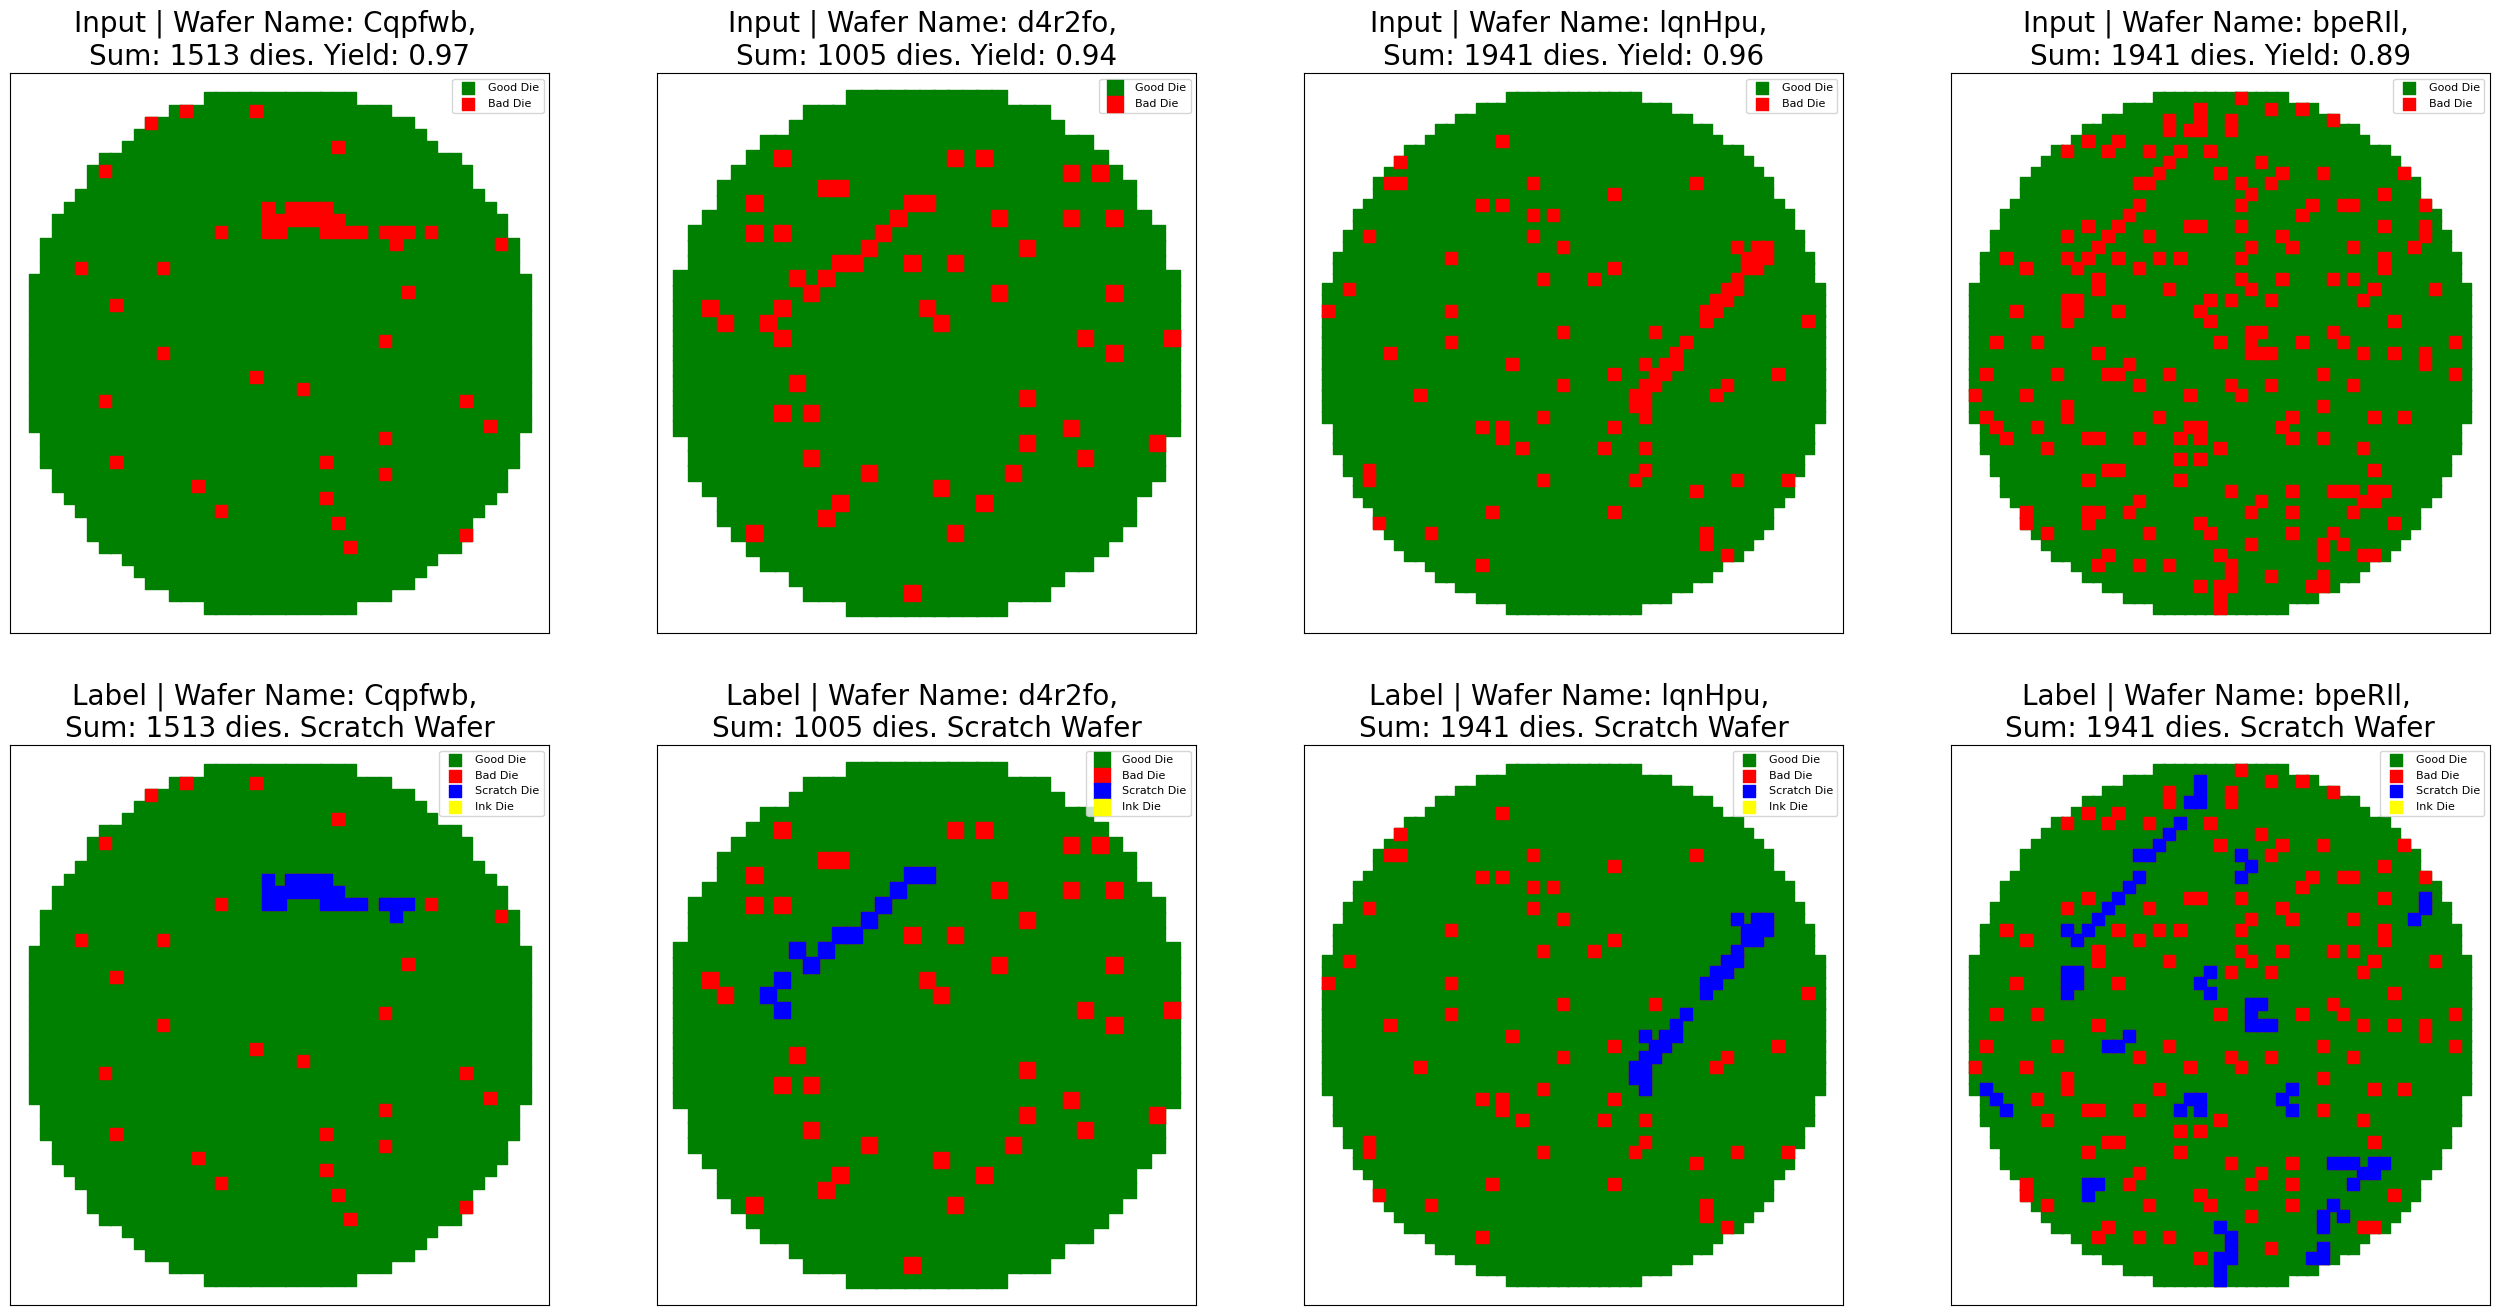

In [273]:
# plot 16 wafers from the test set 
df_wafers_sam = df_wafers_test[df_wafers_test['WaferName'].isin(predicted_level_wafers(df_wafers_test))]
list_sample_test = [df_wafers_sam.groupby('WaferName').get_group(group) for group in df_wafers_sam['WaferName'].value_counts().sample(4).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = True)


# NOTES TO MYSELF
- cinnecting between connected compunnets using bfs/a* 
- add explantions for each parts and the results 


In [10]:
#TODO build your solution

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [11]:
#TODO add your thoughts

# Submission

In [ ]:
#TODO

#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'FirstName LastName'
email = 'my_email@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)